# Exploratory Data Analysis on Lung Cancer Dataset & Prediction with Machine Learning

Dataset Description:

Lung cancer is one of the most prevalent and deadly forms of cancer worldwide, presenting significant challenges in early detection and effective treatment. To aid in the global effort to understand and combat this disease, we are excited to introduce our comprehensive Lung Cancer Dataset.

Objectives:
1. Understanding the Type and Structure Data
2. Exploratory Data Analysis (EDA)
3. Machine Learning Model Building, Training and Evaluation


Workflow:

The Workflow followed in this project is as follows:

1. Import Libraries: Required Libraries for Exploratory Data Analysis and Machine Learning are included.
2. Loading of Data: To perform this, firstly, the Dataset is uploaded and printed. Also, the top 10 records, the last 10 records and a random sample of 10 records have also been printed, just to check the consistency of the dataset.
3. Data Preprocessing: Check for Null values and Duplicated Values in the dataset and drop the Duplicated Values.
4. Statistical Summary of the Dataset: A statistical overview which displays the Column names; Data Types; Number of Entries; Memory Usage; Count, Maximum, Minimum Values of the Dataset; Mean, Median, First Quartile, Third Quartile and Standard Deviation of the Dataset, etc..
5. Data Visualization: Both Univariate and Bivariate Analysis have been done. Bar Graphs, Line Charts, Heatmaps, Catplot, Scatter Plots, Histograms, Distribution Plots, Pie Charts, Horizontal Bar Plots, are some of the Plot Types that has been used in this project for visualizing the required data.
6. Data Encoding: Data has been encoded for the Categorical Columns as well as correctly labelled for the Numerical Columns, so as to prepare the data for Machine Learning Model Training, Building and Evaluation purposes.
7. Principal Component Analysis: Before Model Training, PCA has been done, so as to reduce the dimensionality of the dataset.
8. Machine Learning: The Data has been split into Train and Test Sets and then Machine Learning Models have been built, trained and evaluated. In this project, 9 types of ML Models have been built, namely - Random Forest Classifier, Logistic Regression, Decision Tree Classifier, AdaBoost Classifier, Gradient Boosting Classifier, XGBoost Classifier, K Nearest Neighbor (KNN), Support Vector Classifier (SVC) and Gaussian Naive Bayes.
9. Comparison of Machine Learning Models: The ML Models have been built without Cross Validation as well as with Cross Validation and have been compared with a statistical perspective so as to select the best model. Hyperparameter Tuning has also been done to increase the efficiency of the models. Finally, 2 ML Models have been trained (1 selected from the comparative analysis and the another one is an Ensemble Model).
10. Feature Importance: Finally, this step has been performed so as to learn about the most important feature of the dataset, affecting the result.

# Import Libraries

In [32]:
# Import Libraries

# Libraries for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Library to maintain Clear Outputs
import warnings
warnings. filterwarnings ("ignore")

Cell 1 - Insights:
1. This cell imports various libraries for data manipulation, visualization, and machine learning model building.
2. Warnings library is also imported so as to suppress any warnings and maintain a clear output.

# Loading of Data

In [33]:
# Load the Dataset
df = pd.read_csv("Lung Cancer Dataset.csv")

# Printing the Dataset
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         M   65        1               1        1              2   
1         F   55        1               2        2              1   
2         F   78        2               2        1              1   
3         M   60        2               1        1              1   
4         F   80        1               1        2              1   
...     ...  ...      ...             ...      ...            ...   
2995      F   71        2               1        1              2   
2996      F   75        1               2        1              1   
2997      F   62        2               2        2              1   
2998      M   30        1               1        2              2   
2999      M   40        1               2        2              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   2        1        2         2                  2   
1                   1        2        2         2                  1   
2                   1        2        1         2                  1   
3                   2        1        2         1                  1   
4                   1        2        1         2                  1   
...               ...      ...      ...       ...                ...   
2995                2        1        1         1                  1   
2996                1        2        2         2                  2   
2997                2        2        2         2                  1   
2998                2        2        2         2                  2   
2999                1        1        2         2                  2   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
0            2                    2                      2           1   
1            1                    1                      2           2   
2            1                    2                      1           1   
3            2                    1                      2           2   
4            1                    1                      1           2   
...        ...                  ...                    ...         ...   
2995         2                    1                      1           2   
2996         1                    1                      2           1   
2997         1                    2                      2           2   
2998         1                    2                      1           2   
2999         1                    1                      1           1   

     LUNG_CANCER  
0             NO  
1             NO  
2            YES  
3            YES  
4             NO  
...          ...  
2995          NO  
2996          NO  
2997         YES  
2998         YES  
2999         YES  

[3000 rows x 16 columns]

Cell 2 - Insights:
1. The entire dataset is successfully loaded into a Pandas DataFrame and printed.
2. It is useful to visualize the structure and content of the dataset to understand its columns and values.

In [3]:
# Printing the 1st 10 Entries of the Dataset
df.head(10)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   
5      F   58        1               1        1              2   
6      F   70        1               1        1              2   
7      F   74        2               2        1              1   
8      M   77        1               2        1              2   
9      F   67        2               2        2              2   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   
5                2        2        2         1                  2         2   
6                2        1        2         2                  2         2   
7                1        1        2         1                  1         1   
8                1        1        1         1                  2         1   
9                1        2        2         1                  2         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           1          NO  
1                    1                      2           2          NO  
2                    2                      1           1         YES  
3                    1                      2           2         YES  
4                    1                      1           2          NO  
5                    1                      1           2         YES  
6                    2                      2           1         YES  
7                    1                      2           1          NO  
8                    1                      1           2          NO  
9                    2                      1           1          NO

Cell 3 - Insights:
1. The output displays the first 10 rows of the dataset.
2. Provides a quick overview of the initial entries in the dataset.
3. Useful to check the beginning part of the dataset for any anomalies or inconsistencies.

In [4]:
# Printing the LAst 10 Entries of the Dataset
df.tail(10)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
2990      F   57        2               1        2              2   
2991      F   42        1               2        2              2   
2992      F   46        2               2        2              2   
2993      F   80        2               1        1              1   
2994      F   45        1               2        1              2   
2995      F   71        2               1        1              2   
2996      F   75        1               2        1              1   
2997      F   62        2               2        2              1   
2998      M   30        1               1        2              2   
2999      M   40        1               2        2              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
2990                1        1        2         2                  1   
2991                2        2        1         1                  2   
2992                1        1        1         1                  1   
2993                1        2        2         1                  2   
2994                1        2        1         2                  2   
2995                2        1        1         1                  1   
2996                1        2        2         2                  2   
2997                2        2        2         2                  1   
2998                2        2        2         2                  2   
2999                1        1        2         2                  2   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
2990         2                    1                      1           2   
2991         2                    1                      1           1   
2992         1                    2                      1           2   
2993         2                    1                      2           2   
2994         1                    2                      1           2   
2995         2                    1                      1           2   
2996         1                    1                      2           1   
2997         1                    2                      2           2   
2998         1                    2                      1           2   
2999         1                    1                      1           1   

     LUNG_CANCER  
2990         YES  
2991          NO  
2992          NO  
2993          NO  
2994          NO  
2995          NO  
2996          NO  
2997         YES  
2998         YES  
2999         YES

Cell 4 - Insights:
1. The last 10 rows of the dataset is shown as an output.
2. Offers a look at the end of the dataset, ensuring it is loaded correctly and consistently.

In [5]:
# Printing any random 10 Entries of the Dataset
df.sample(10)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
2387      F   68        2               1        1              2   
2363      F   60        1               1        2              2   
1460      M   42        2               1        1              1   
1597      F   49        2               1        1              1   
293       M   64        2               1        2              1   
390       M   43        1               1        1              2   
76        M   67        1               2        2              1   
1472      F   56        2               2        1              1   
2975      F   44        1               1        1              1   
243       F   71        2               1        2              2   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
2387                2        1        1         2                  1   
2363                2        1        1         2                  2   
1460                2        1        1         2                  1   
1597                1        1        2         2                  2   
293                 2        1        1         2                  2   
390                 1        1        2         1                  1   
76                  2        1        2         2                  2   
1472                2        2        1         2                  2   
2975                2        2        2         1                  2   
243                 2        2        1         2                  1   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
2387         1                    2                      1           1   
2363         2                    1                      2           2   
1460         2                    2                      2           1   
1597         1                    2                      1           2   
293          2                    2                      2           2   
390          1                    1                      1           2   
76           1                    1                      2           1   
1472         2                    1                      2           1   
2975         2                    2                      2           2   
243          2                    2                      1           1   

     LUNG_CANCER  
2387         YES  
2363          NO  
1460          NO  
1597          NO  
293          YES  
390          YES  
76           YES  
1472         YES  
2975          NO  
243          YES

Cell 5 - Insights:
1. The output displays 10 random rows from the dataset.
2. Helps to get a random sample from the dataset to understand its variety and to spot-check data consistency.

# Data Preprocessing

In [6]:
# Columns of the Dataset
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

Cell 6 - Insights:
1. The output shows the names of columns present in the given dataset.
2. Provides a quick overview of the number of columns and data types of each column.

In [7]:
# Info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

Cell 7 - Insights:
1. The output shows information about the given dataset.
2. The information includes - the total number of entries, total number of columns, memory usage, column names and their corresponding data types and non-null count and also the total number of columns for each data type.
3. Such an analysis is really helpful for a quick overview of the dataset, before performing EDA.

In [8]:
# Description of the Dataset
df.describe()

AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min           1.000000     1.000000     1.000000     1.000000   
25%           1.000000     1.000000     1.000000     1.000000   
50%           2.000000     1.000000     2.000000     1.000000   
75%           2.000000     2.000000     2.000000     2.000000   
max           2.000000     2.000000     2.000000     2.000000   

       ALCOHOL_CONSUMING     COUGHING  SHORTNESS_OF_BREATH  \
count        3000.000000  3000.000000          3000.000000   
mean            1.491333     1.510667             1.488000   
std             0.500008     0.499970             0.499939   
min             1.000000     1.000000             1.000000   
25%             1.000000     1.000000             1.000000   
50%             1.000000     2.000000             1.000000   
75%             2.000000     2.000000             2.000000   
max             2.000000     2.000000             2.000000   

       SWALLOWING_DIFFICULTY   CHEST_PAIN  
count            3000.000000  3000.000000  
mean                1.489667     1.498667  
std                 0.499977     0.500082  
min                 1.000000     1.000000  
25%                 1.000000     1.000000  
50%                 1.000000     1.000000  
75%                 2.000000     2.000000  
max                 2.000000     2.000000

Cell 8 - Insights:
1. Provides a statistical description of the dataset.
2. The statistical description of the dataset includes - Count, Mean Value, Standard Deviation, 1st Qaurtile (25%), Median Value (50%), 3rd Quartile (75%) and Maximum Value.
3. This statistical description is provided only for the Numerical Columns of the Dataset and not for the Categorical Columns.
4. Really helpful for understanding the dataset.

In [9]:
# Transposing the above Output
df.describe().T

count       mean        std   min   25%   50%   75%  \
AGE                    3000.0  55.169000  14.723746  30.0  42.0  55.0  68.0   
SMOKING                3000.0   1.491000   0.500002   1.0   1.0   1.0   2.0   
YELLOW_FINGERS         3000.0   1.514000   0.499887   1.0   1.0   2.0   2.0   
ANXIETY                3000.0   1.494000   0.500047   1.0   1.0   1.0   2.0   
PEER_PRESSURE          3000.0   1.499000   0.500082   1.0   1.0   1.0   2.0   
CHRONIC_DISEASE        3000.0   1.509667   0.499990   1.0   1.0   2.0   2.0   
FATIGUE                3000.0   1.489667   0.499977   1.0   1.0   1.0   2.0   
ALLERGY                3000.0   1.506667   0.500039   1.0   1.0   2.0   2.0   
WHEEZING               3000.0   1.497333   0.500076   1.0   1.0   1.0   2.0   
ALCOHOL_CONSUMING      3000.0   1.491333   0.500008   1.0   1.0   1.0   2.0   
COUGHING               3000.0   1.510667   0.499970   1.0   1.0   2.0   2.0   
SHORTNESS_OF_BREATH    3000.0   1.488000   0.499939   1.0   1.0   1.0   2.0   
SWALLOWING_DIFFICULTY  3000.0   1.489667   0.499977   1.0   1.0   1.0   2.0   
CHEST_PAIN             3000.0   1.498667   0.500082   1.0   1.0   1.0   2.0   

                        max  
AGE                    80.0  
SMOKING                 2.0  
YELLOW_FINGERS          2.0  
ANXIETY                 2.0  
PEER_PRESSURE           2.0  
CHRONIC_DISEASE         2.0  
FATIGUE                 2.0  
ALLERGY                 2.0  
WHEEZING                2.0  
ALCOHOL_CONSUMING       2.0  
COUGHING                2.0  
SHORTNESS_OF_BREATH     2.0  
SWALLOWING_DIFFICULTY   2.0  
CHEST_PAIN              2.0

Cell 9 - Insights:
1. The statistical analysis has been displayed in a Transposed manner, as compared to the previous output, just to provide a clear and concise view.
2. Basically, there is no difference between the outputs of Cell 8 and Cell 9.

In [165]:
# Checking the Columns of the Dataset in the form of a List
col_list = df.columns.tolist()
col_list

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC_DISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING_DIFFICULTY',
 'CHEST_PAIN',
 'LUNG_CANCER']

Cell 10 - Insights:
1. The output provides the Column Names of the Dataset, in the form of a List.
2. Similar to the output of Cell 6.
3. But, this form of the output might be useful for any sort of analysis in the future.

In [11]:
# Shape of the Dataset
df.shape

(3000, 16)

Cell 11 - Insights:
1. The output shows the configuration of the given dataset, in the form of number of rows and number of columns present in the dataset.
2. Helpful for knowing the total number of entries in the dataset.

In [12]:
# Checking the Data Types of every Columns of the Dataset
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

Cell 12 - Insights:
1. The output shows the data type for each column, present in the dataset.
2. Useful for quick overview of the data types and the knowing which data types are required for data encoding for ML purpose.
3. Provides a concise result, as compared to the output of Cell 7.

In [13]:
# Checking for Column Type

# Creating Separate List for Categorical as well as Numerical Columns
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Printing the Output
print(f"The Categorical Columns in the Dataset are:\n{cat_cols}\n")
print(f"The Numerical Columns in the Dataset are:\n{num_cols}")

The Categorical Columns in the Dataset are:
Index(['GENDER', 'LUNG_CANCER'], dtype='object')

The Numerical Columns in the Dataset are:
Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'],
      dtype='object')


Cell 13 - Insights:
1. The output provides 2 separate lists - ! for Numerical Columns and the other for Categorical Columns.
2. Helps in the separation of Numerical and Categorical Columns of the Dataset.
3. Useful for Data Visualization.

In [4]:
# Value Counts for each Column in the given Dataset
for col in df.columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print("---")

Value counts for column GENDER:
GENDER
M    1514
F    1486
Name: count, dtype: int64
---
Value counts for column AGE:
AGE
54    73
67    71
75    71
47    70
69    70
78    69
55    69
79    68
53    66
32    66
39    65
37    65
77    64
46    64
63    63
50    63
33    62
70    61
68    61
35    60
48    60
36    60
71    59
76    59
31    59
56    58
62    58
57    58
52    57
80    57
61    57
60    57
34    57
42    56
41    56
49    56
64    56
59    55
51    55
43    55
44    54
38    53
40    51
58    51
74    50
65    49
66    48
45    47
72    46
73    43
30    42
Name: count, dtype: int64
---
Value counts for column SMOKING:
SMOKING
1    1527
2    1473
Name: count, dtype: int64
---
Value counts for column YELLOW_FINGERS:
YELLOW_FINGERS
2    1542
1    1458
Name: count, dtype: int64
---
Value counts for column ANXIETY:
ANXIETY
1    1518
2    1482
Name: count, dtype: int64
---
Value counts for column PEER_PRESSURE:
PEER_PRESSURE
1    1503
2    1497
Name: count, dtype: int64
---

Cell 14 - Insights:
1. The output shows the Value Counts, i.e, the frequency of a record for each column in the dataset.
2. This can be helpful for understanding the distribution of data.

In [14]:
# Print the Unique Values of each Column
print("The Unique Values for each Column is given below:\n")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

The Unique Values for each Column is given below:

GENDER: ['M' 'F']
AGE: [65 55 78 60 80 58 70 74 77 67 35 79 39 62 64 66 76 48 33 47 50 36 37 51
 53 72 71 54 41 46 59 32 34 44 38 69 45 40 63 75 52 31 57 73 42 56 68 61
 30 49 43]
SMOKING: [1 2]
YELLOW_FINGERS: [1 2]
ANXIETY: [1 2]
PEER_PRESSURE: [2 1]
CHRONIC_DISEASE: [2 1]
FATIGUE: [1 2]
ALLERGY: [2 1]
WHEEZING: [2 1]
ALCOHOL_CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS_OF_BREATH: [2 1]
SWALLOWING_DIFFICULTY: [2 1]
CHEST_PAIN: [1 2]
LUNG_CANCER: ['NO' 'YES']


Cell 15 - Insights:
1. The output shows the unique values for each column of the dataset.
2. Useful for analyzing the type of data for each column.

In [34]:
# Check for Duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

Cell 16 - Insights:
1. Check for Duplicates, with respect to each entry of the dataset.
2. Important step, required to perform before proceeding to Data Analysis.

In [35]:
# Total Number of Duplicate Values in the Dataset
df.duplicated().sum()

2

Cell 17 - Insights:
1. The output shows the total number of duplicated values in the dataset.

In [36]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         M   65        1               1        1              2   
1         F   55        1               2        2              1   
2         F   78        2               2        1              1   
3         M   60        2               1        1              1   
4         F   80        1               1        2              1   
...     ...  ...      ...             ...      ...            ...   
2995      F   71        2               1        1              2   
2996      F   75        1               2        1              1   
2997      F   62        2               2        2              1   
2998      M   30        1               1        2              2   
2999      M   40        1               2        2              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   2        1        2         2                  2   
1                   1        2        2         2                  1   
2                   1        2        1         2                  1   
3                   2        1        2         1                  1   
4                   1        2        1         2                  1   
...               ...      ...      ...       ...                ...   
2995                2        1        1         1                  1   
2996                1        2        2         2                  2   
2997                2        2        2         2                  1   
2998                2        2        2         2                  2   
2999                1        1        2         2                  2   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
0            2                    2                      2           1   
1            1                    1                      2           2   
2            1                    2                      1           1   
3            2                    1                      2           2   
4            1                    1                      1           2   
...        ...                  ...                    ...         ...   
2995         2                    1                      1           2   
2996         1                    1                      2           1   
2997         1                    2                      2           2   
2998         1                    2                      1           2   
2999         1                    1                      1           1   

     LUNG_CANCER  
0             NO  
1             NO  
2            YES  
3            YES  
4             NO  
...          ...  
2995          NO  
2996          NO  
2997         YES  
2998         YES  
2999         YES  

[2998 rows x 16 columns]

Cell 18 - Insights:
1. The duplicate values have been dropped.
2. This means the dataset contains of only original values, devoid of any redundancy.
3. The dataset is printed again after dropping the duplicated values.

In [37]:
# Check for Duplicates
df.duplicated().sum()

0

Cell 19 - Insights:
1. The output shows the total number of null values in the given dataset.

In [19]:
# Check for Null Values
df.isnull()

GENDER    AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      False  False    False           False    False          False   
1      False  False    False           False    False          False   
2      False  False    False           False    False          False   
3      False  False    False           False    False          False   
4      False  False    False           False    False          False   
...      ...    ...      ...             ...      ...            ...   
2995   False  False    False           False    False          False   
2996   False  False    False           False    False          False   
2997   False  False    False           False    False          False   
2998   False  False    False           False    False          False   
2999   False  False    False           False    False          False   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0               False    False    False     False              False   
1               False    False    False     False              False   
2               False    False    False     False              False   
3               False    False    False     False              False   
4               False    False    False     False              False   
...               ...      ...      ...       ...                ...   
2995            False    False    False     False              False   
2996            False    False    False     False              False   
2997            False    False    False     False              False   
2998            False    False    False     False              False   
2999            False    False    False     False              False   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
0        False                False                  False       False   
1        False                False                  False       False   
2        False                False                  False       False   
3        False                False                  False       False   
4        False                False                  False       False   
...        ...                  ...                    ...         ...   
2995     False                False                  False       False   
2996     False                False                  False       False   
2997     False                False                  False       False   
2998     False                False                  False       False   
2999     False                False                  False       False   

      LUNG_CANCER  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
2995        False  
2996        False  
2997        False  
2998        False  
2999        False  

[2998 rows x 16 columns]

Cell 20 - Insights:
1. The output shows the presence of null value in the dataset, with respect to each entry.
2. The output for each entry is in the form of a Boolean Value - If a Null Value is present, it returns True, else False.

In [20]:
# Check for Number of Null Values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Cell 21 - Insights:
1. The output shows the number of null values present in each column of the dataset.
2. This step needs to be performed befor proceeding further to Data Analysis.

In [8]:
# Checking for the Configuration of the Dataset after Data Cleaning
df.shape

(2998, 16)

Cell 22 - Insights:
1. The Configuration of the Dataset is checked after Data Cleaning, i.e., after dropping the duplicated and null values; although, with respect to this dataset, only dropping of duplicated values are applicable, as there are no null values.
2. This cell's output is similar to the output of Cell 11.

In [9]:
# Statistical Summary of the Dataset after Data Cleaning
df.describe()

AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  2998.000000  2998.000000     2998.000000  2998.000000    2998.000000   
mean     55.171448     1.491328        1.514009     1.493996       1.498666   
std      14.728302     0.500008        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      2998.000000  2998.000000  2998.000000  2998.000000   
mean          1.509673     1.489660     1.507005     1.497332   
std           0.499990     0.499976     0.500034     0.500076   
min           1.000000     1.000000     1.000000     1.000000   
25%           1.000000     1.000000     1.000000     1.000000   
50%           2.000000     1.000000     2.000000     1.000000   
75%           2.000000     2.000000     2.000000     2.000000   
max           2.000000     2.000000     2.000000     2.000000   

       ALCOHOL_CONSUMING     COUGHING  SHORTNESS_OF_BREATH  \
count        2998.000000  2998.000000          2998.000000   
mean            1.491328     1.510340             1.487658   
std             0.500008     0.499976             0.499931   
min             1.000000     1.000000             1.000000   
25%             1.000000     1.000000             1.000000   
50%             1.000000     2.000000             1.000000   
75%             2.000000     2.000000             2.000000   
max             2.000000     2.000000             2.000000   

       SWALLOWING_DIFFICULTY   CHEST_PAIN  
count            2998.000000  2998.000000  
mean                1.489993     1.498332  
std                 0.499983     0.500081  
min                 1.000000     1.000000  
25%                 1.000000     1.000000  
50%                 1.000000     1.000000  
75%                 2.000000     2.000000  
max                 2.000000     2.000000

Cell 23 - Insights:
1. Statistical Analysis of the Dataset, after Data Cleaning, with respect to the Numerical Columns present in the Dataset.
2. Similar to the output of Cell 8.

In [10]:
# Transposing the above Output
df.describe().T

count       mean        std   min   25%   50%   75%  \
AGE                    2998.0  55.171448  14.728302  30.0  42.0  55.0  68.0   
SMOKING                2998.0   1.491328   0.500008   1.0   1.0   1.0   2.0   
YELLOW_FINGERS         2998.0   1.514009   0.499887   1.0   1.0   2.0   2.0   
ANXIETY                2998.0   1.493996   0.500047   1.0   1.0   1.0   2.0   
PEER_PRESSURE          2998.0   1.498666   0.500082   1.0   1.0   1.0   2.0   
CHRONIC_DISEASE        2998.0   1.509673   0.499990   1.0   1.0   2.0   2.0   
FATIGUE                2998.0   1.489660   0.499976   1.0   1.0   1.0   2.0   
ALLERGY                2998.0   1.507005   0.500034   1.0   1.0   2.0   2.0   
WHEEZING               2998.0   1.497332   0.500076   1.0   1.0   1.0   2.0   
ALCOHOL_CONSUMING      2998.0   1.491328   0.500008   1.0   1.0   1.0   2.0   
COUGHING               2998.0   1.510340   0.499976   1.0   1.0   2.0   2.0   
SHORTNESS_OF_BREATH    2998.0   1.487658   0.499931   1.0   1.0   1.0   2.0   
SWALLOWING_DIFFICULTY  2998.0   1.489993   0.499983   1.0   1.0   1.0   2.0   
CHEST_PAIN             2998.0   1.498332   0.500081   1.0   1.0   1.0   2.0   

                        max  
AGE                    80.0  
SMOKING                 2.0  
YELLOW_FINGERS          2.0  
ANXIETY                 2.0  
PEER_PRESSURE           2.0  
CHRONIC_DISEASE         2.0  
FATIGUE                 2.0  
ALLERGY                 2.0  
WHEEZING                2.0  
ALCOHOL_CONSUMING       2.0  
COUGHING                2.0  
SHORTNESS_OF_BREATH     2.0  
SWALLOWING_DIFFICULTY   2.0  
CHEST_PAIN              2.0

Cell 24 - Insights:
1. The above output has been transposed, for better and concise view.
2. Similar to the output of Cell 9.

In [11]:
# Value Counts for each Column in the given Dataset after Data Cleaning
for col in df.columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print("---")

Value counts for column GENDER:
GENDER
M    1512
F    1486
Name: count, dtype: int64
---
Value counts for column AGE:
AGE
54    73
75    71
67    71
47    70
69    70
78    69
55    69
79    68
32    66
39    65
37    65
53    65
77    64
46    64
63    63
33    62
50    62
70    61
68    61
35    60
48    60
36    60
71    59
76    59
31    59
56    58
62    58
57    58
52    57
80    57
61    57
60    57
34    57
42    56
41    56
49    56
64    56
59    55
51    55
43    55
44    54
38    53
40    51
58    51
74    50
65    49
66    48
45    47
72    46
73    43
30    42
Name: count, dtype: int64
---
Value counts for column SMOKING:
SMOKING
1    1525
2    1473
Name: count, dtype: int64
---
Value counts for column YELLOW_FINGERS:
YELLOW_FINGERS
2    1541
1    1457
Name: count, dtype: int64
---
Value counts for column ANXIETY:
ANXIETY
1    1517
2    1481
Name: count, dtype: int64
---
Value counts for column PEER_PRESSURE:
PEER_PRESSURE
1    1503
2    1495
Name: count, dtype: int64
---

Cell 25 - Insights:
1. Value Counts, i.e., frequency of each data with respect to each column of the dataset, after data cleaning, has been displayed.
2. Similar to the output of Cell 14.

In [12]:
# Print the Unique Values of each Column after Data Cleaning
print("The Unique Values for each Column is given below:\n")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

The Unique Values for each Column is given below:

GENDER: ['M' 'F']
AGE: [65 55 78 60 80 58 70 74 77 67 35 79 39 62 64 66 76 48 33 47 50 36 37 51
 53 72 71 54 41 46 59 32 34 44 38 69 45 40 63 75 52 31 57 73 42 56 68 61
 30 49 43]
SMOKING: [1 2]
YELLOW_FINGERS: [1 2]
ANXIETY: [1 2]
PEER_PRESSURE: [2 1]
CHRONIC_DISEASE: [2 1]
FATIGUE: [1 2]
ALLERGY: [2 1]
WHEEZING: [2 1]
ALCOHOL_CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS_OF_BREATH: [2 1]
SWALLOWING_DIFFICULTY: [2 1]
CHEST_PAIN: [1 2]
LUNG_CANCER: ['NO' 'YES']


Cell 26 - Insights:
1. The unique values present in each column of the dataset is displayed as output, after data cleaning.
2. Similar to the output of Cell 15

# Data Visualization (Part - 1)

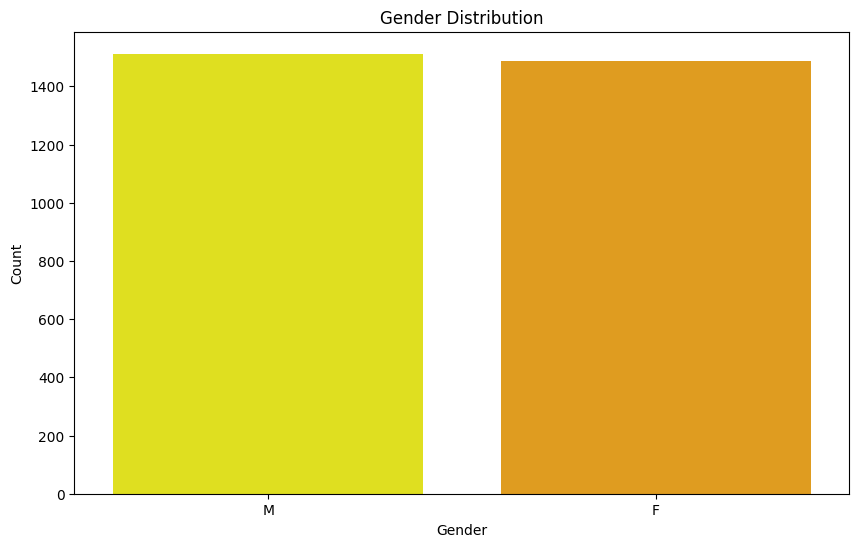

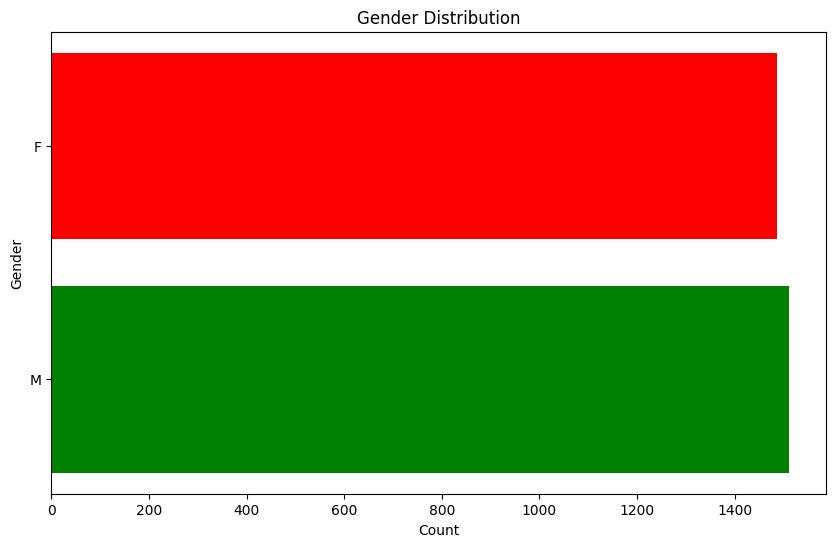

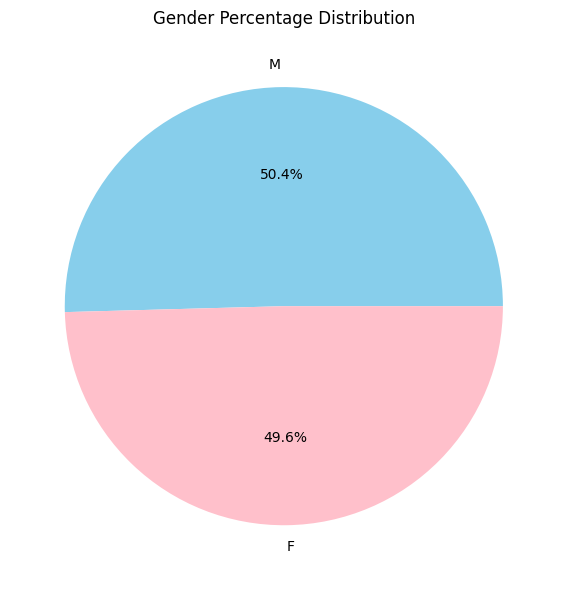

In [21]:
# Data Visualization - 1
# Bar Plots for visualizing the Gender Distribution

# For CountPlot
plt.figure(figsize=(10,6))
sns.countplot(x="GENDER", data=df, palette=["Yellow", "Orange"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

# For Horizontal Bar Plot
plt.figure(figsize=(10,6))
counts = df["GENDER"].value_counts()
plt.barh(counts.index, counts, color=["Green", "Red"])
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Gender Distribution")

# For Pie Chart
plt.figure(figsize=(10,6))
counts = df["GENDER"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["Skyblue", "Pink"])
plt.title("Gender Percentage Distribution")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 27 - Insights:
1. 3 Graphs have been displayed as output - 1 Bar Graph (Countplot), 1 Horizontal Bar Plot and 1 Pie Chart.
2. Gender Distribution has been displayed.
3. From the output, it is evident that the data is almost equally distributed, between Males and Females, with Males forming a slight majority (50.4%), as compared to the Females (49.6%).

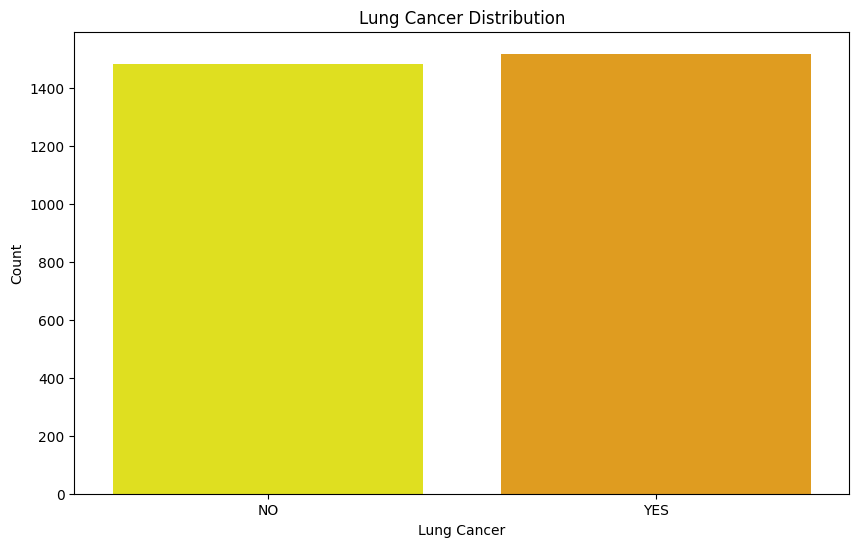

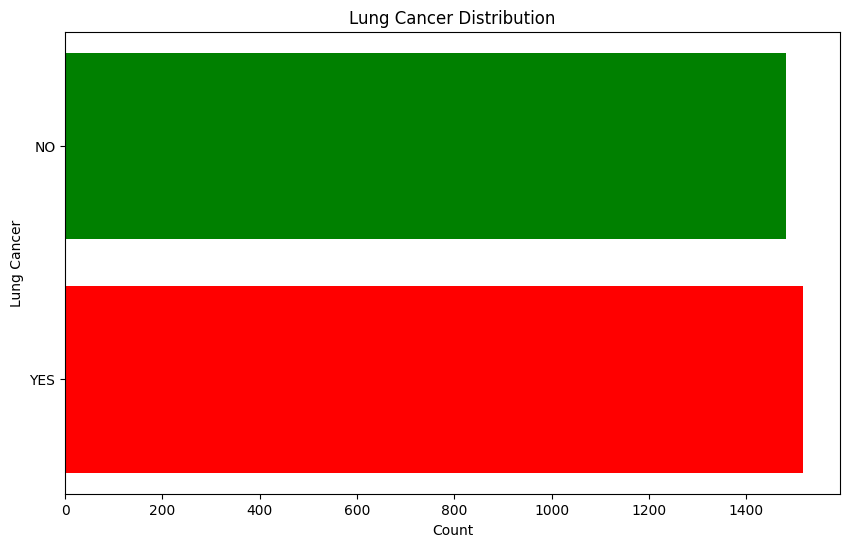

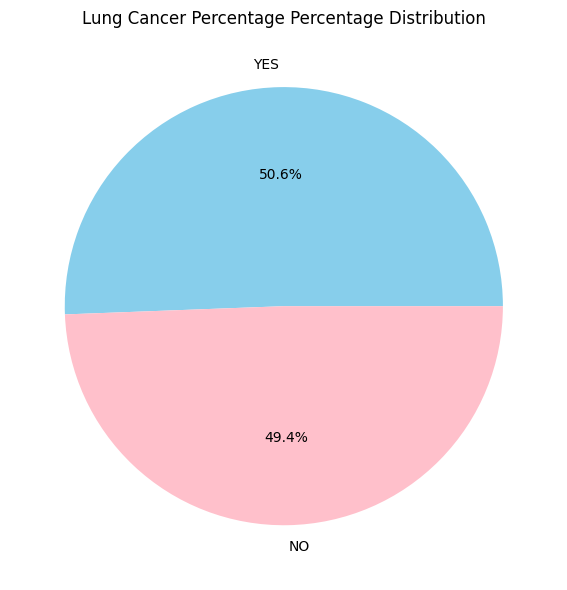

In [22]:
# Data Visualization - 2
# Bar Plots for visualizing the Lung Cancer Distribution

# For CountPlot
plt.figure(figsize=(10,6))
sns.countplot(x="LUNG_CANCER", data=df, palette=["Yellow", "Orange"])
plt.xlabel("Lung Cancer")
plt.ylabel("Count")
plt.title("Lung Cancer Distribution")

# For Horizontal Bar Plot
plt.figure(figsize=(10,6))
counts = df["LUNG_CANCER"].value_counts()
plt.barh(counts.index, counts, color=["Red", "Green"])
plt.xlabel("Count")
plt.ylabel("Lung Cancer")
plt.title("Lung Cancer Distribution")

# For Pie Chart
plt.figure(figsize=(10,6))
counts = df["LUNG_CANCER"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["Skyblue", "Pink"])
plt.title("Lung Cancer Percentage Percentage Distribution")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 28 - Insights:
1. Just like the previous cell's output, here also 3 Graphs of similar type has been displayed.
2. But, here the distribution is done on the basis of the presence of Lung Cancer.
3. As it is evident from the output, the ones suffering from Lung Cancer forms a slight majority (50.6%), as compared to the ones who are not suffering from Lung Cancer (49.4%).

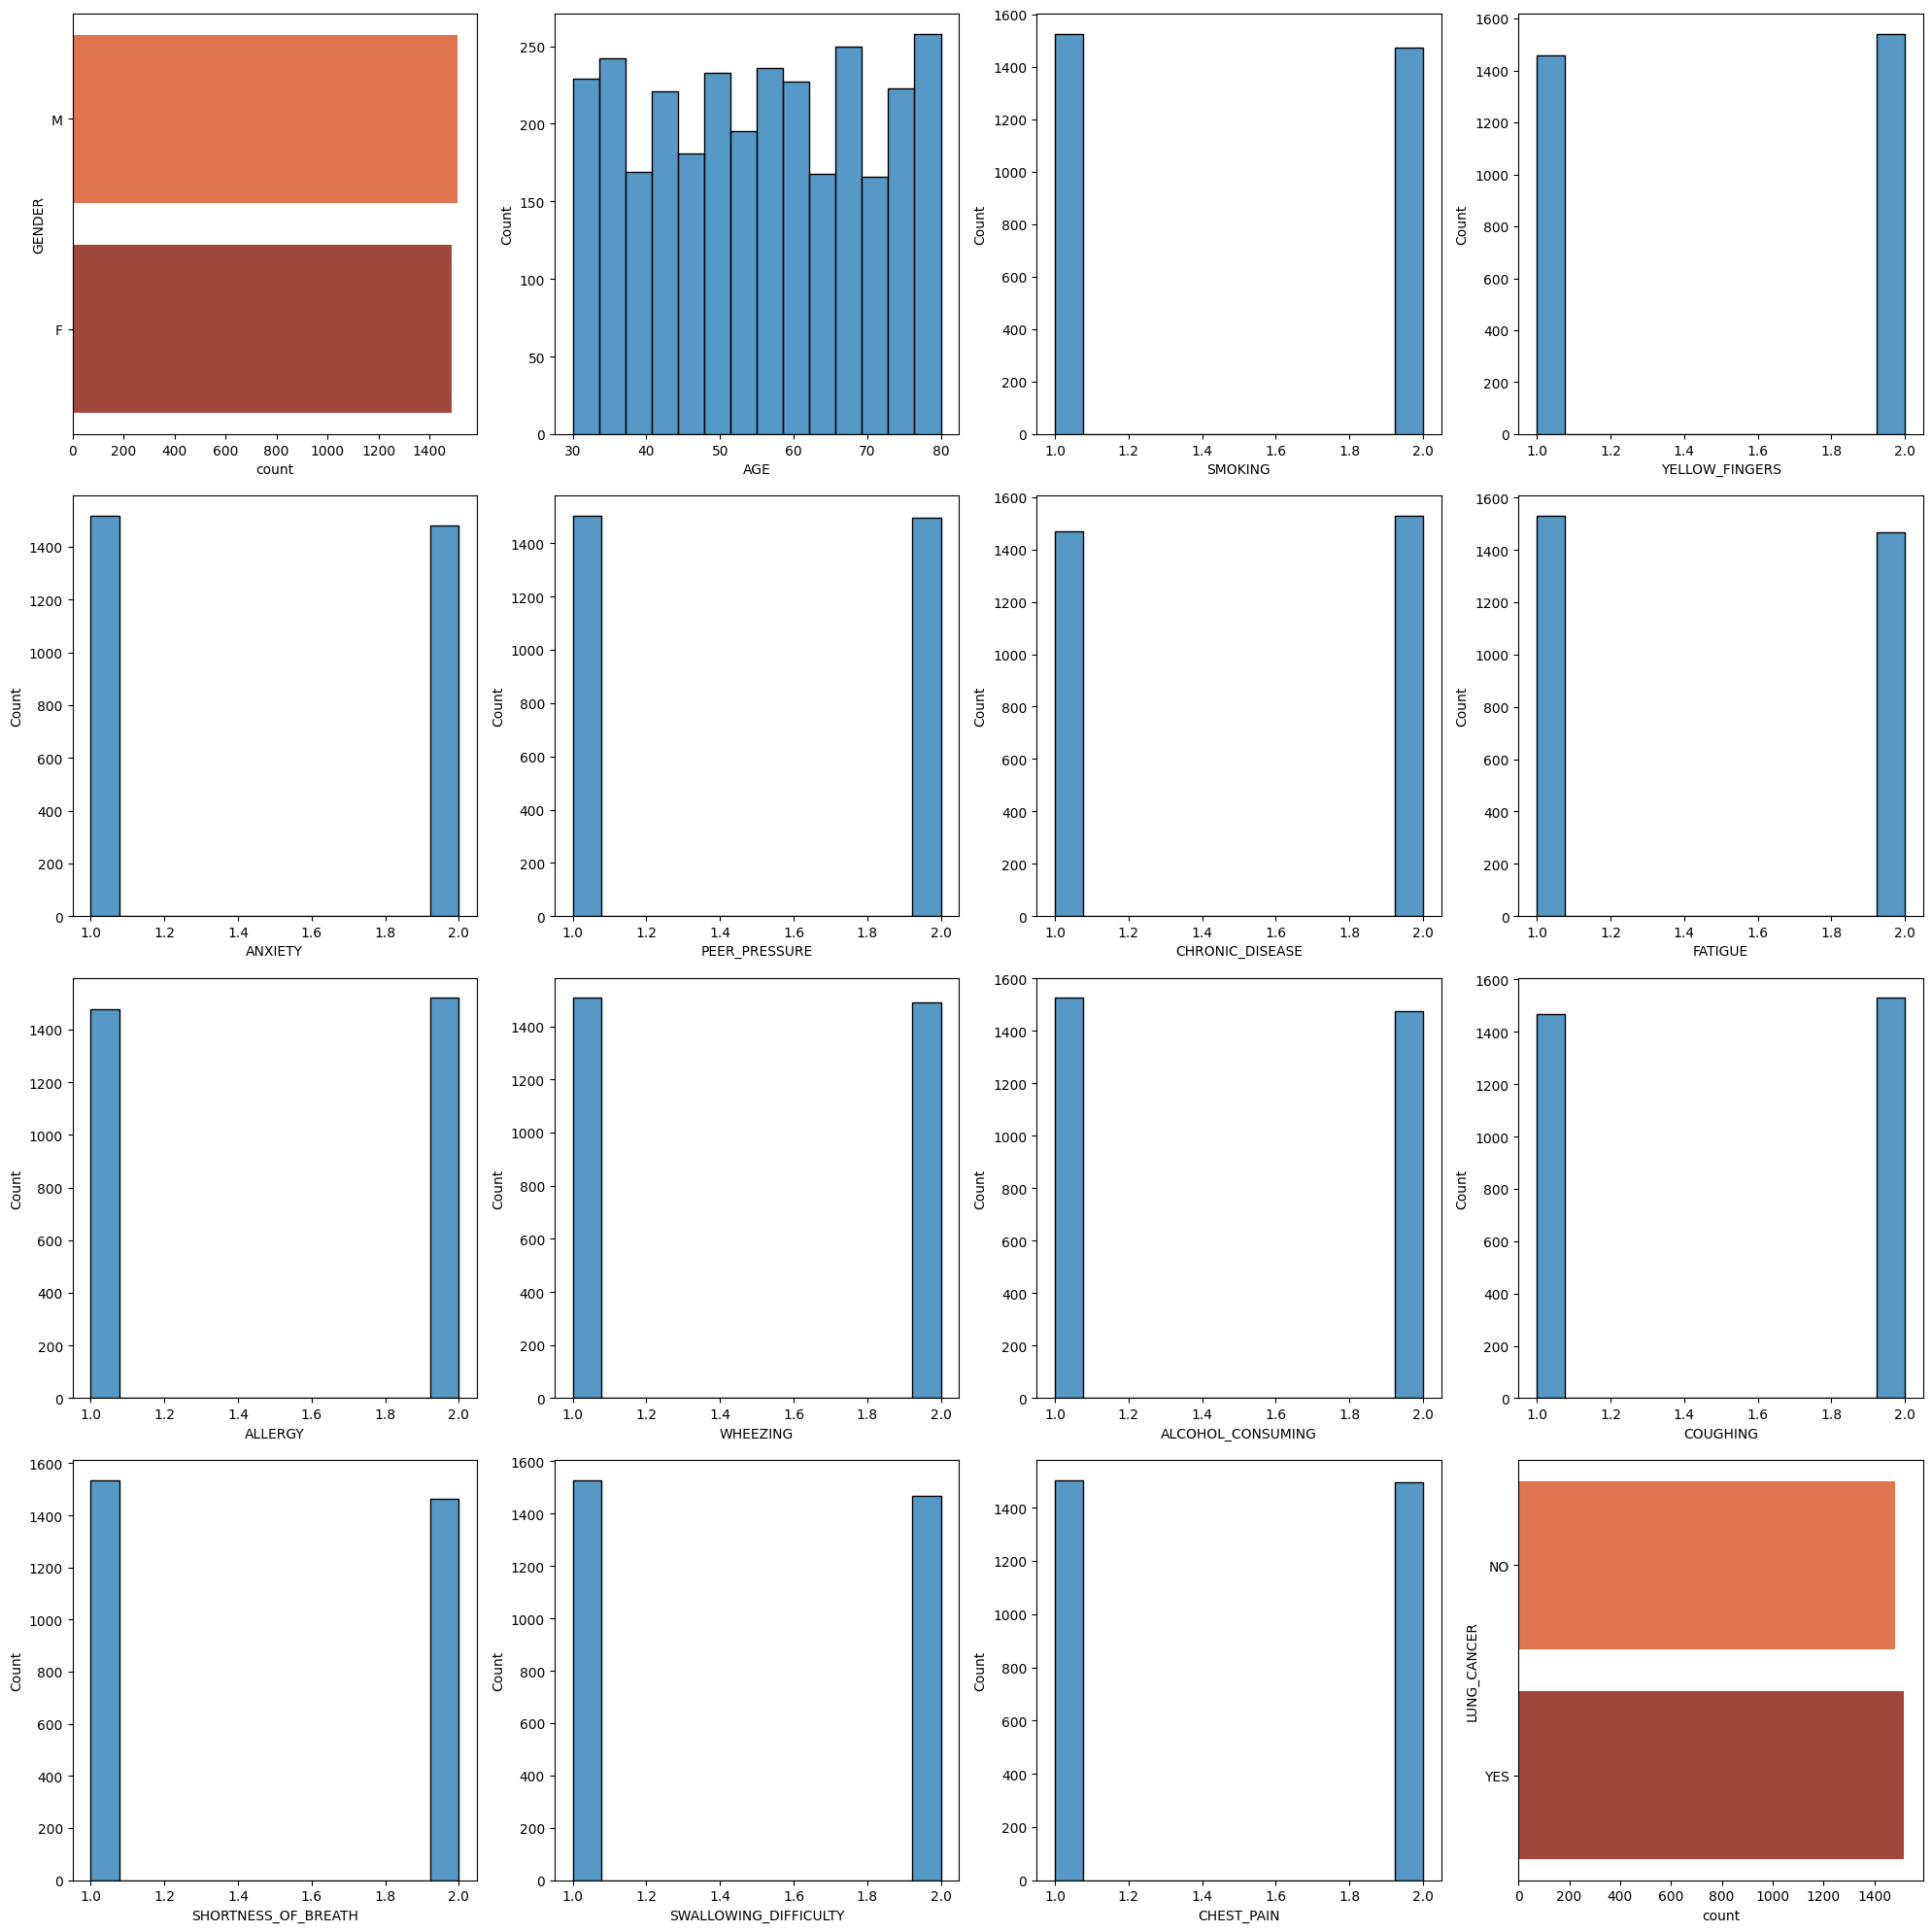

In [9]:
# Data Visualization - 3
# Combined Visualization

plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    if df[column].dtype == 'object':
        sns.countplot(y=df[column], palette="YlOrRd_d")
    else:
        sns.histplot(df[column], palette="pastel")

# Display Graphs
plt.show()

Cell 29 - Insights:
1. The output shows 16 Graphs as subplots, of a single plot.
2. The output consist of 2 Countplots and 14 Histplots.
3. The Categorical Variables are represented in form of Countplots, while the Numerical Columns have been represented in form of Histplots.
4. The 1st Graph and the Last Graph are Countplots as they represent data from Categorical Columns.
5. In case of Countplots, the Graphs show the frequency of each category, which can help in identifying the most common category in each column and also the distribution of data.
6. Rest of the Graphs are in the form of Histogram.
7. Apart from Age Graph, the others have a binary form of data, either 1 or 2, as it is evident from the graphs.
8. The Histograms also shows the distribution of values.
9. By visualizing all the columns together, in the form of a graph, the relationships between them can be identified.

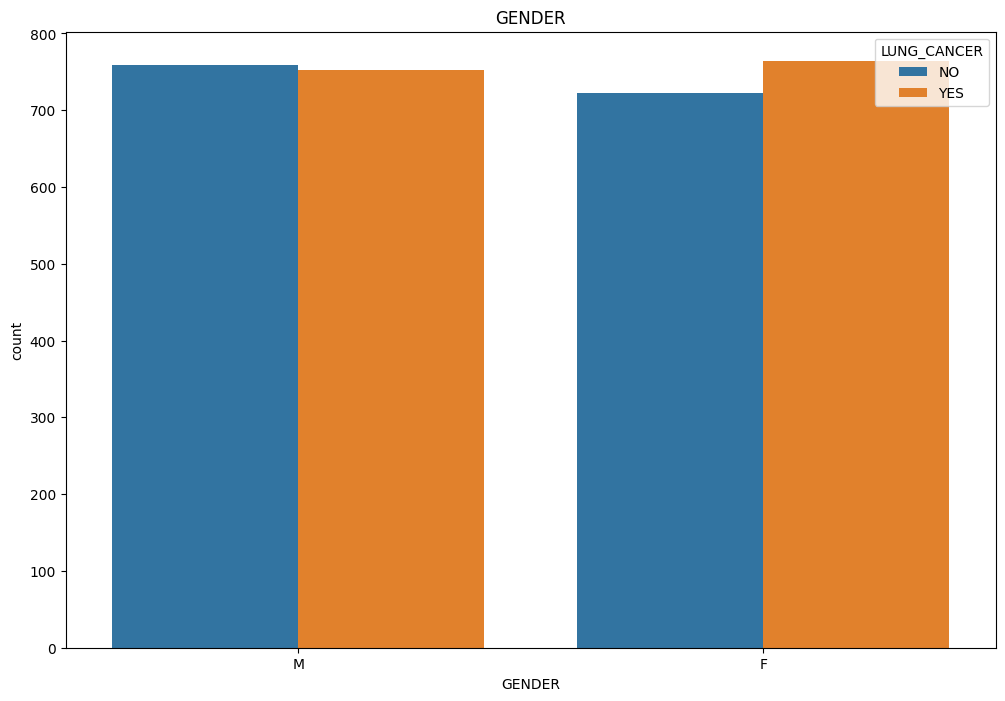

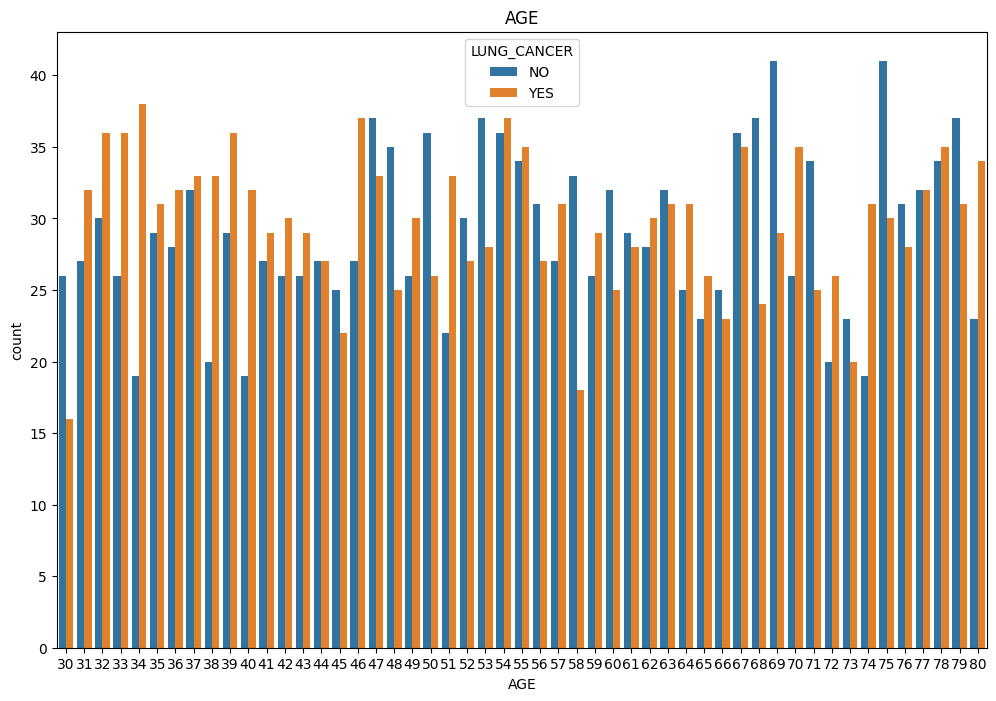

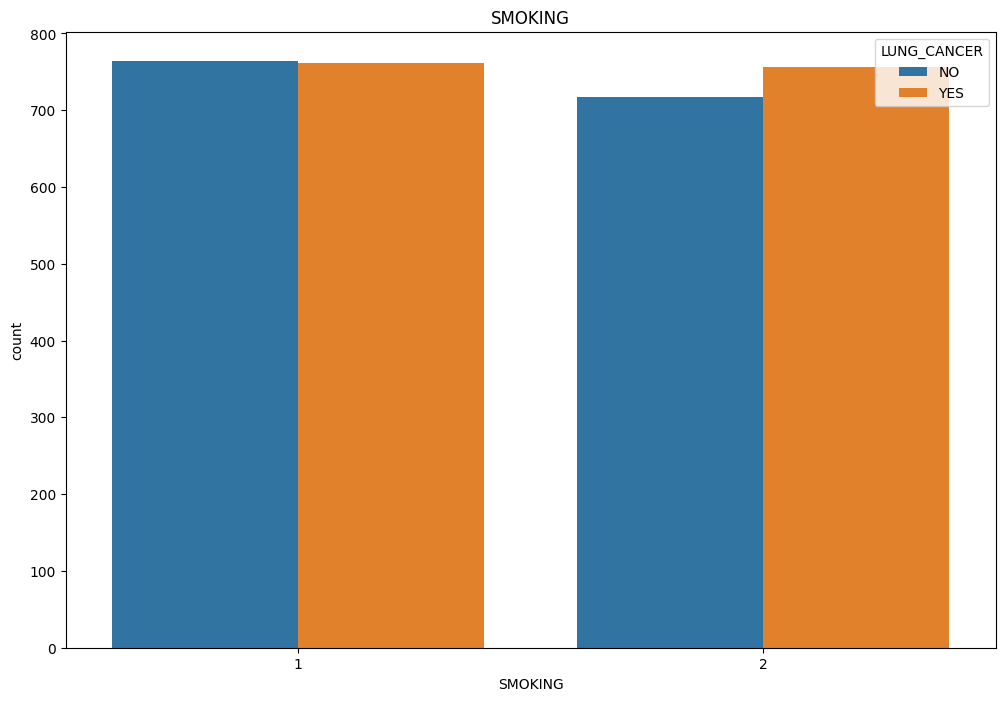

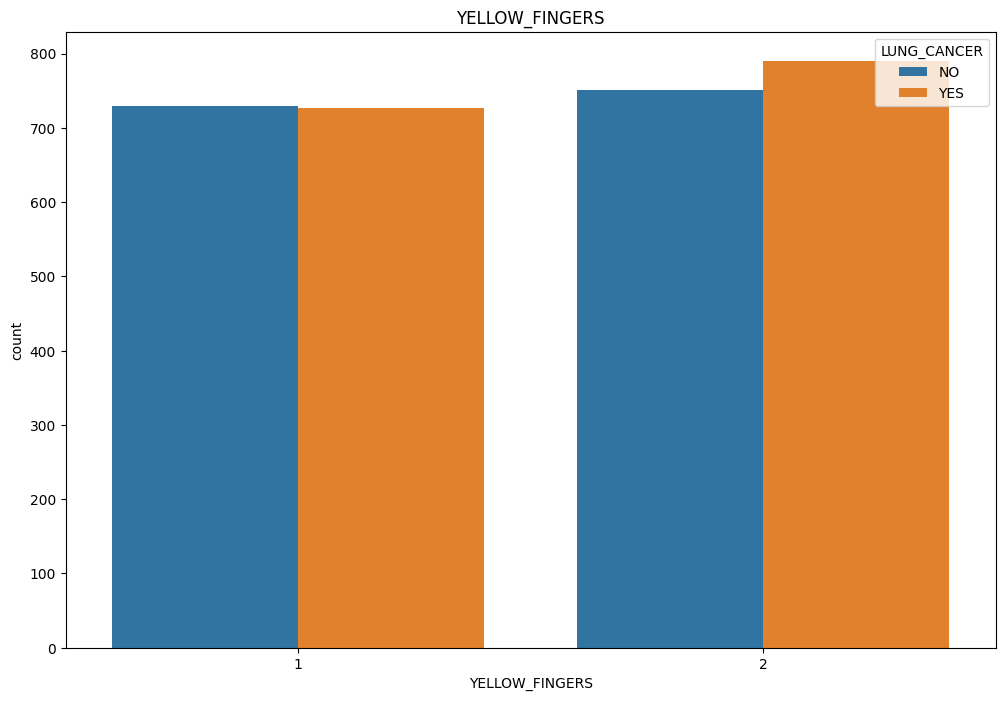

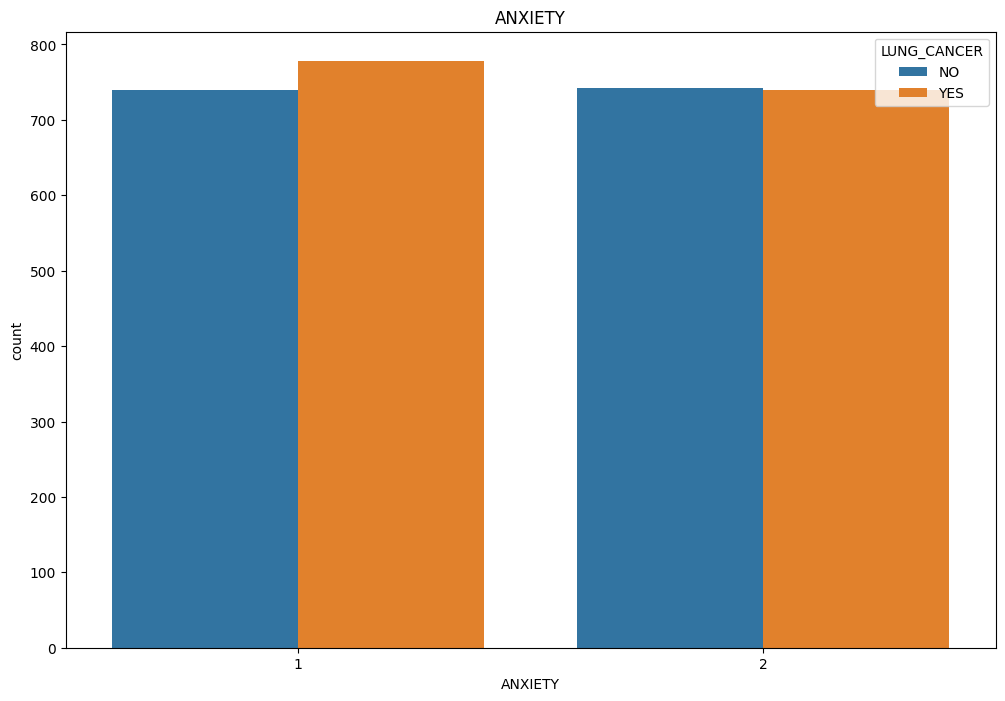

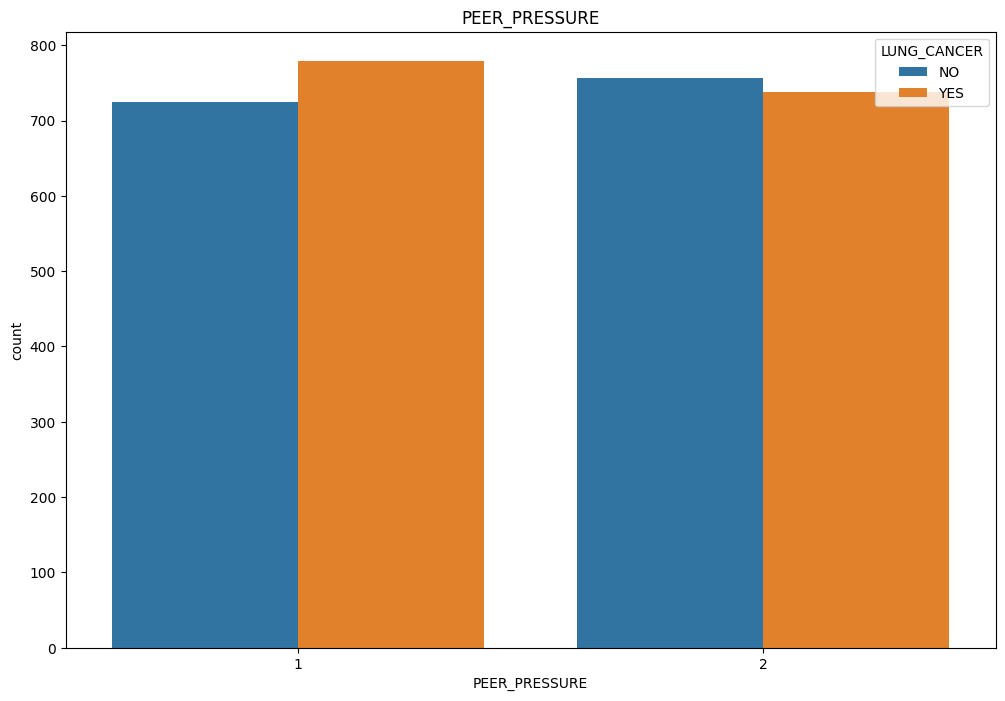

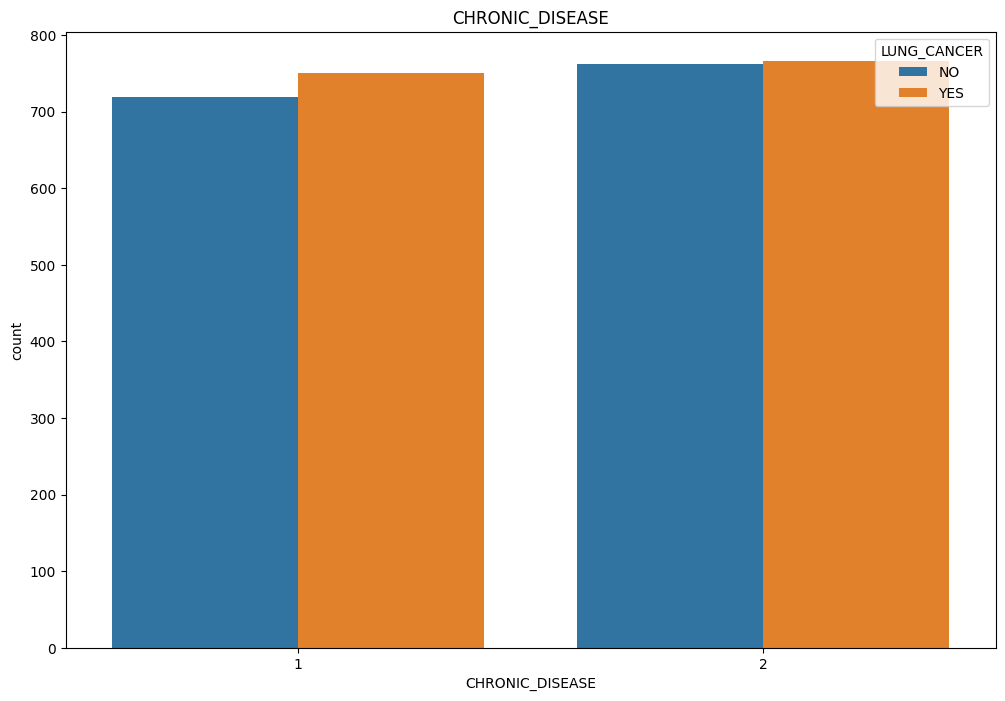

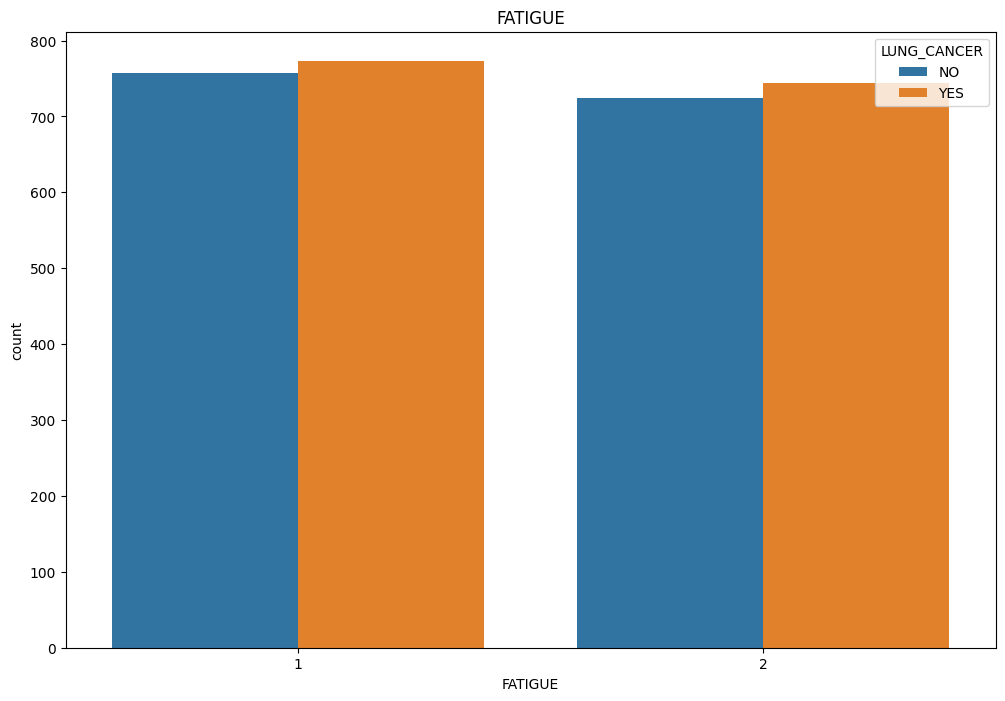

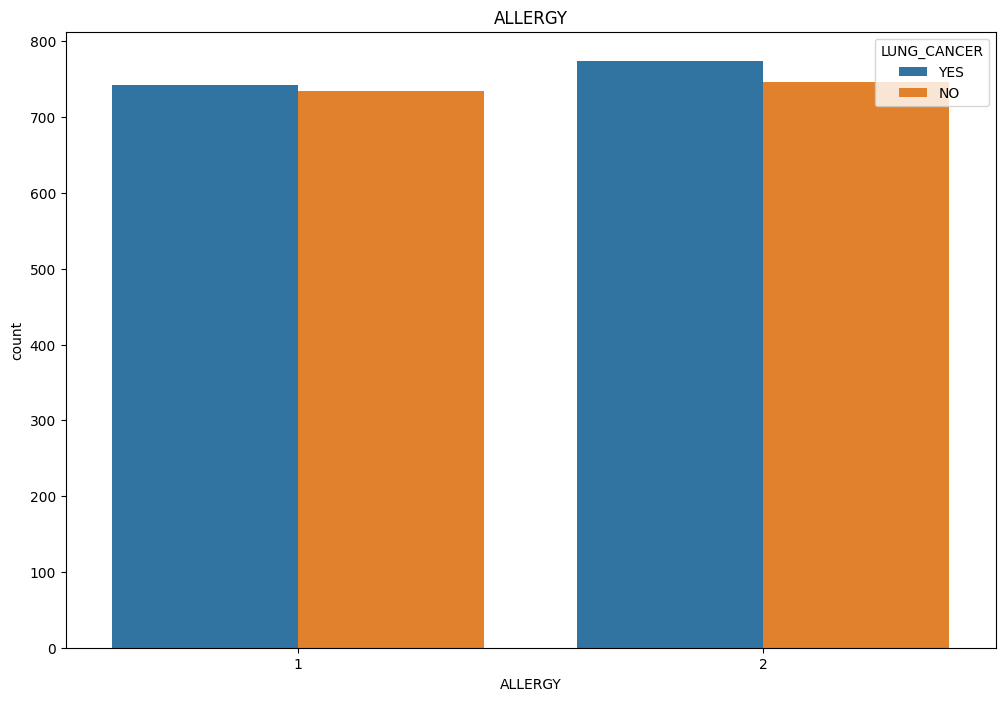

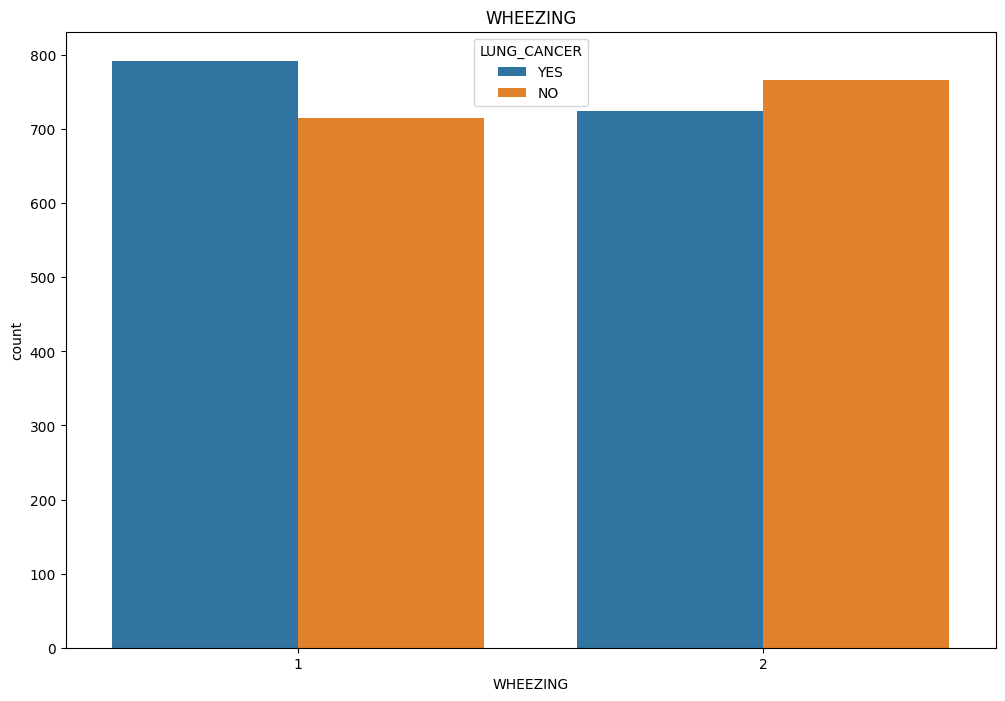

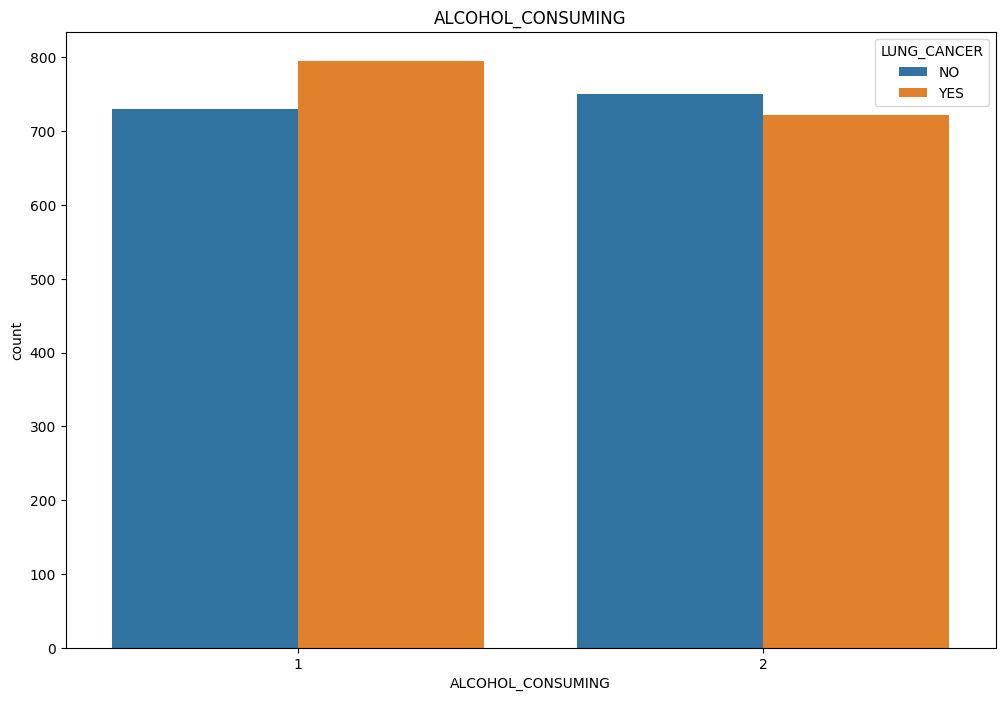

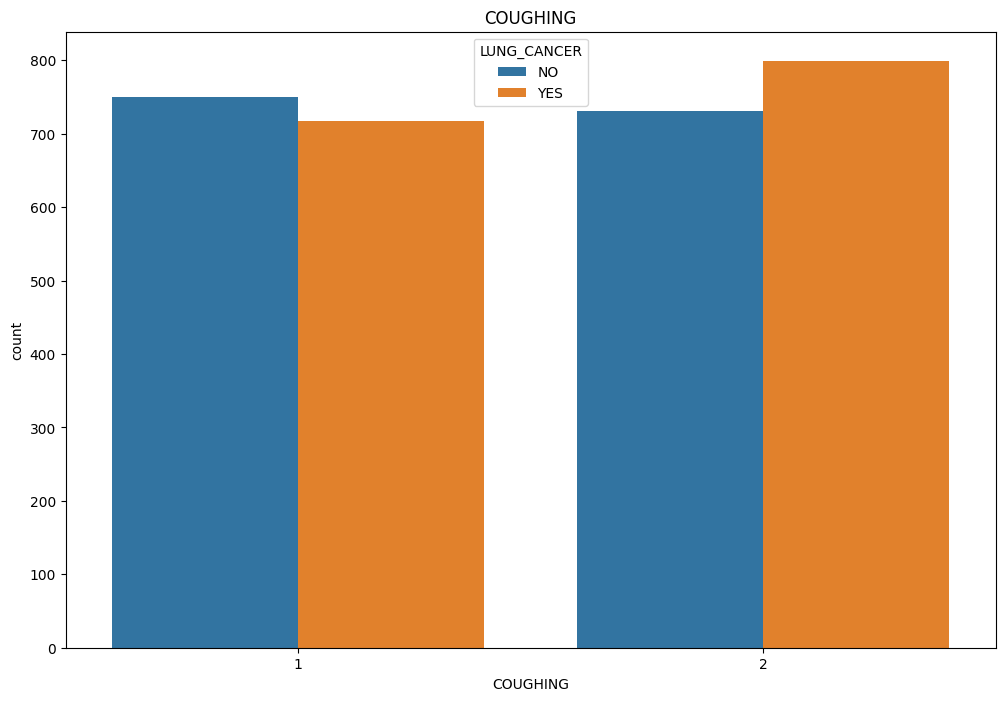

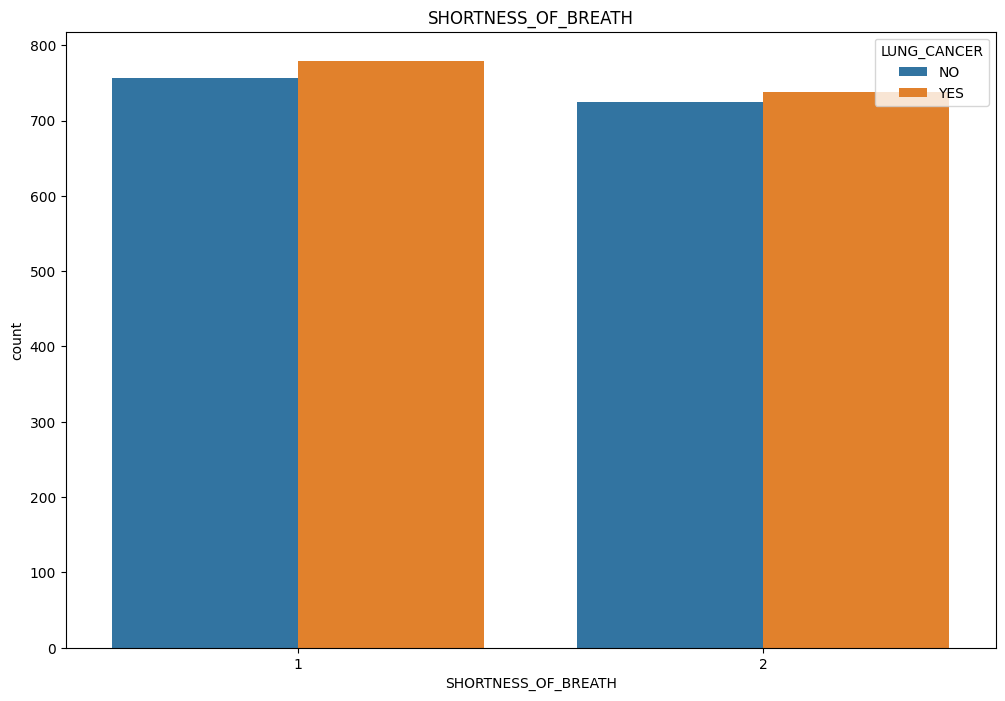

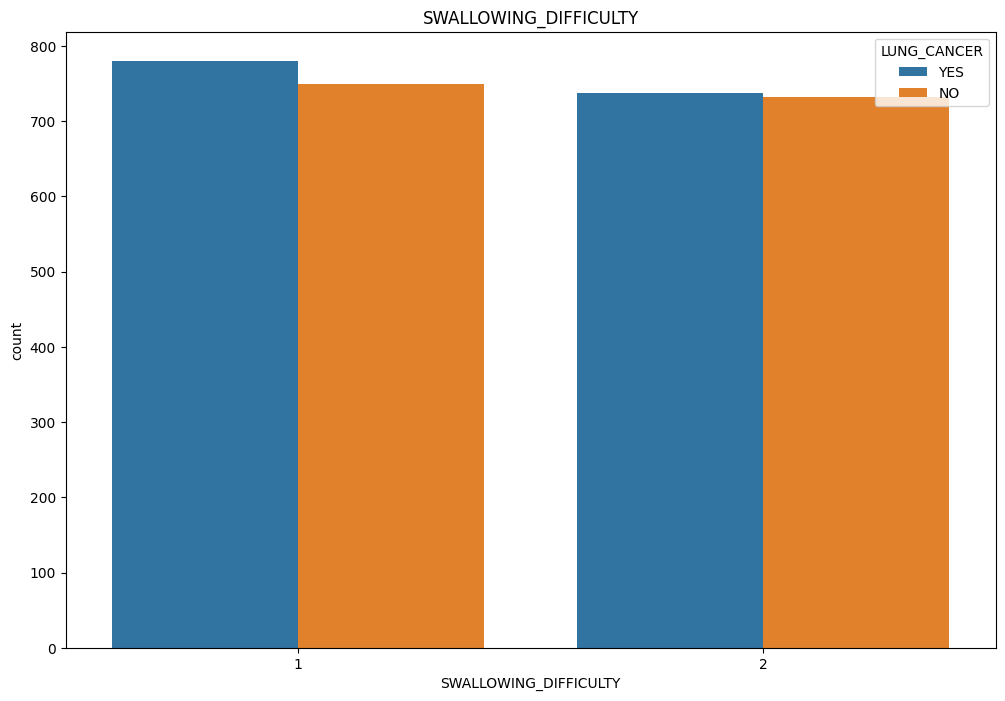

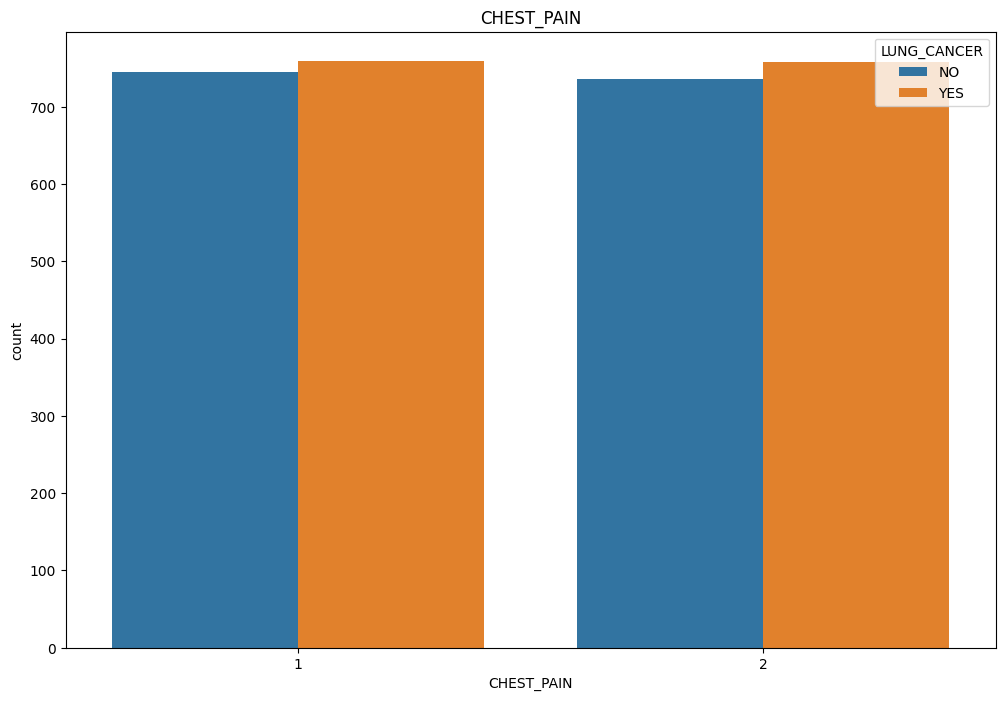

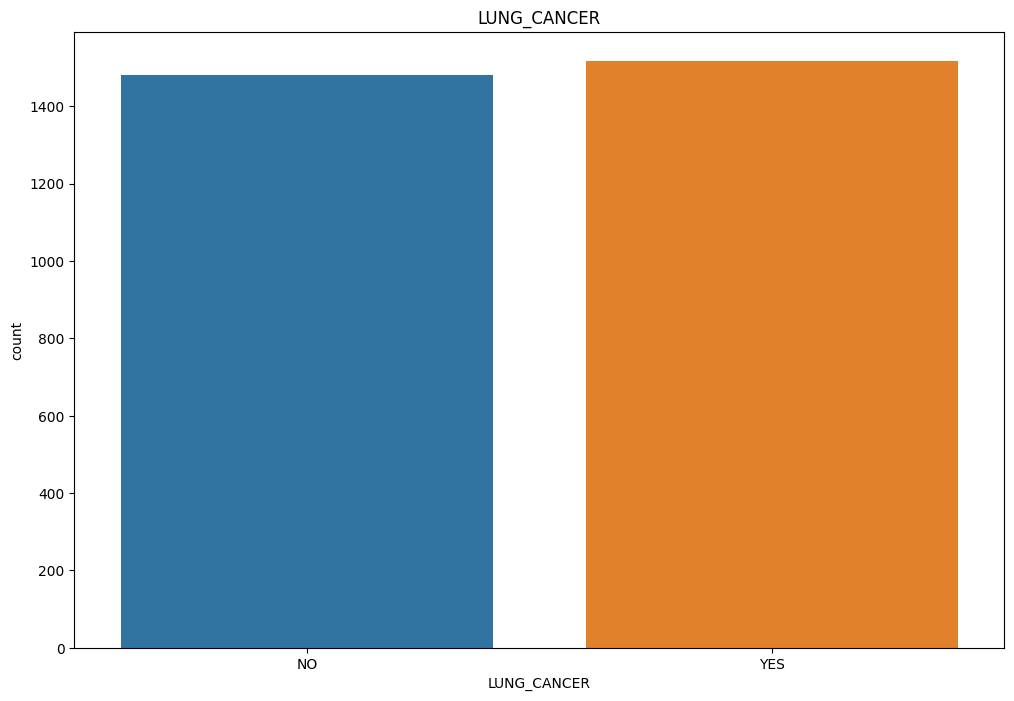

In [24]:
# Data Visualization - 4
# Grouped by Lung Cancer

import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis
for col in df.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=col, data=df, hue="LUNG_CANCER")
    plt.title(col)

# Displaying the Plots
plt.show()

Cell 30 - Insights:

1. The output provides a bivariate analysis, where each column is analyzed by the factor of Having Cancer.
2. The graphs are in the form of Bars.
3. There are 16 Graphs, 15 Bivariate Analysis and the last one is a Univariate Analysis.
4. The 1st Graph is about Gender, from which it can be inferred, that in the given dataset, Males suffering from Lung Cancer are less in number that the ones not suffering from Lung Cancer, while this is just the reverse for Females.
5. In the Age Graph: The younger ones are tend to suffer from Lung Cancer more, as compared to the old ones.
6. Smoking has a nominal effect on the occurrence of Lung Cancer, surprisingly, although the number of patients suffering from Lung Cancer while smoking is the highest!
7. The same can be inferred for Yellow Fingers and the difference is also more between the number of patients who are suffering from Lung Cancer and the ones who are not suffering, in case of presence of Yellow Fingers.
8. Anxiety also does not affect the occurrence of Lung Cancer, very much.
9. The same pattern can be observed for Peer Pressure.
10. Chronic Disease presence also does not directly affect the occurrence of Lung Cancer, although the number of patients suffering from Lung Cancer, while they're also suffering from Chronic Disease is the highest!
11. The contribution of Fatigue also seems to be very much nominal, as the number of patients suffering from Lung Cancer are almost similar, irrespective of the presence of Fatigue!
12. There's not a clear pattern for Allergy, as well!
13. Wheezing seems to have a direct effect, as it's evident from the graph that the ones having this condition are also suffering from Lung Cancer more as compared to the ones not having it!
14. Interestingly, Alcohol Consumption is also not linked directly to the occurrence of Lung Cancer!
15. Coughing, also follows the same pattern as that of Wheezing.
16. Shortness of Breath does not have a direct connection to the presence of Lung Cancer, as the number of patients affected with Lung Cancer is more than the ones who are not affected, with respect to Shortness of Breath, as evident from the Graph!
17. Swallowing difficulty also does not impact the occurrence of Lung Cancer, directly, as irrespective of Swallowing difficulty, the number of patients suffering from Lung Cancer is less than the ones who are not suffering.
18. The connection of Chest Pain with the occurrence of Lung Cancer is somewhat similar to the connection of Smoking and the occurrence of Lung Cancer, as per the data of this Dataset. Both of them follows the same pattern, although the number of patients suffering from Lung Cancer, while they also have Chest Pain is the highest, but the difference is not that much significant!
19. The Last Graph is not a Bivariate Analysis, as it only shows the Yes & No Data of all the entries suffering from Lung Cancer or not!

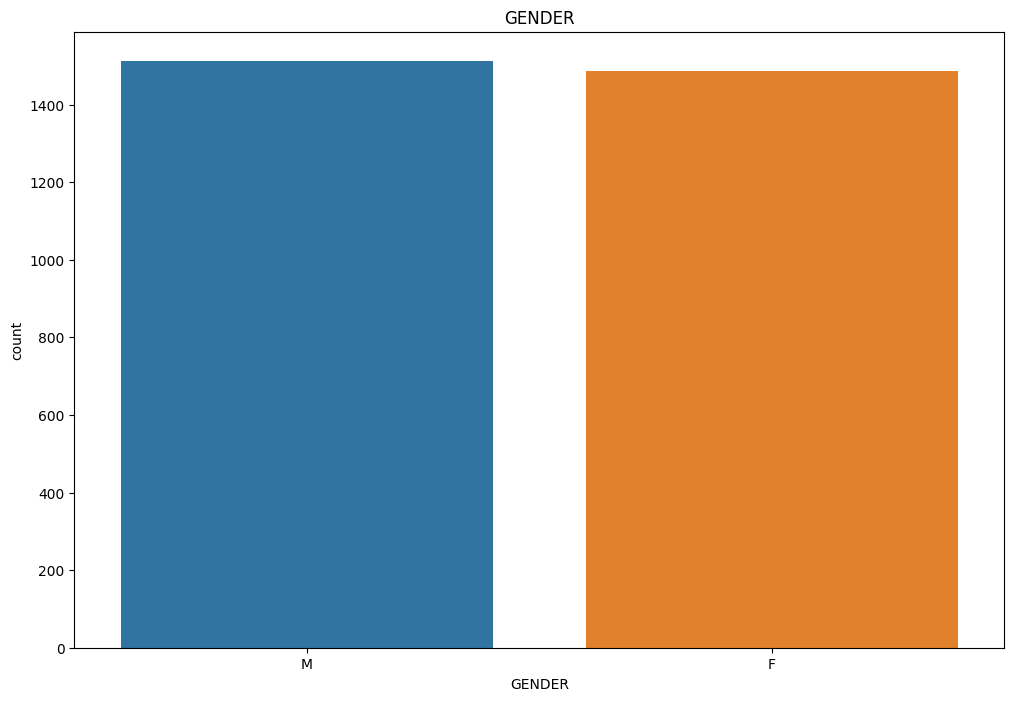

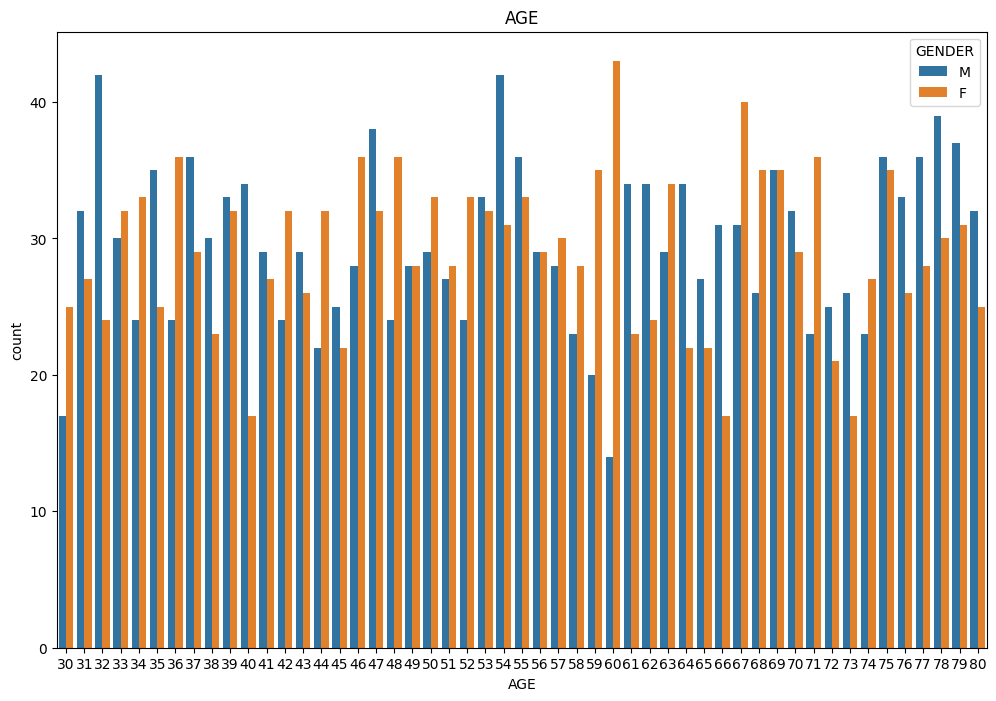

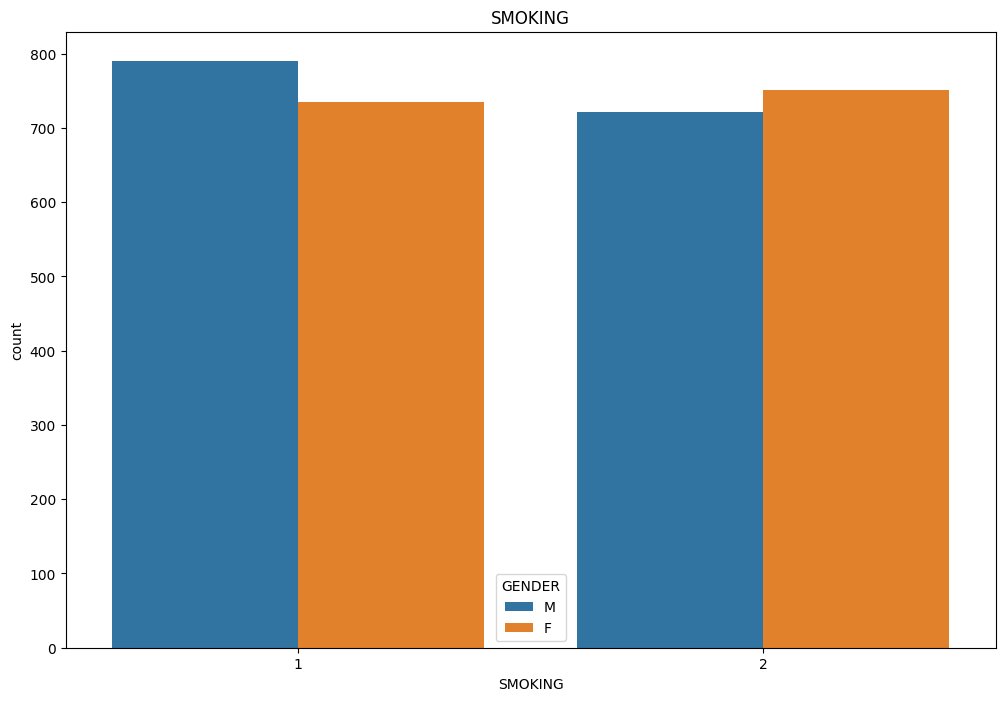

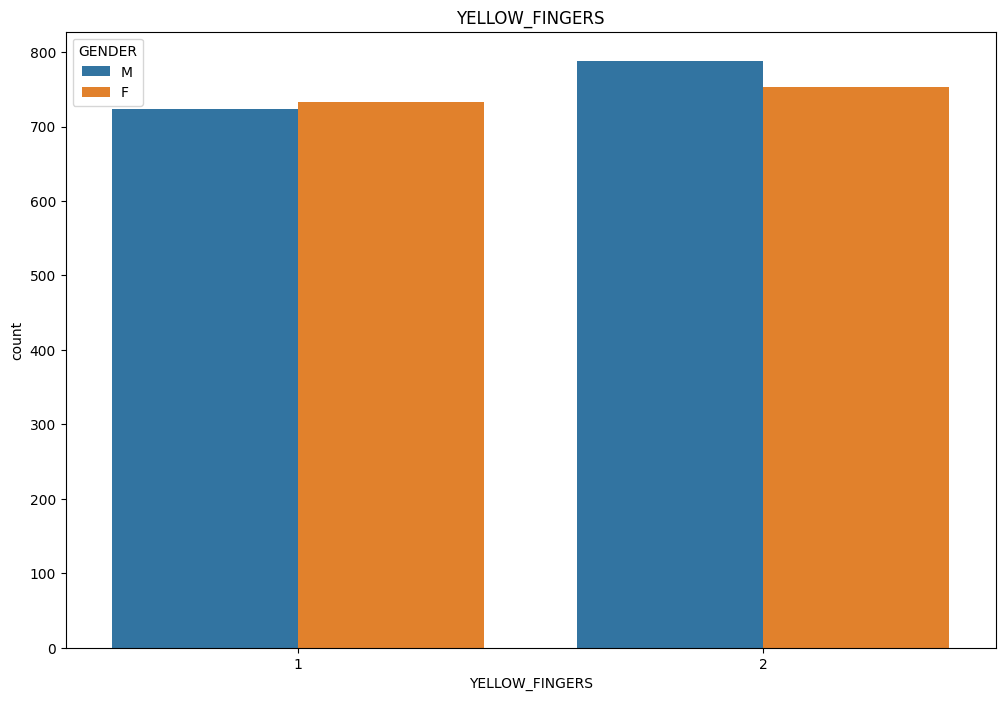

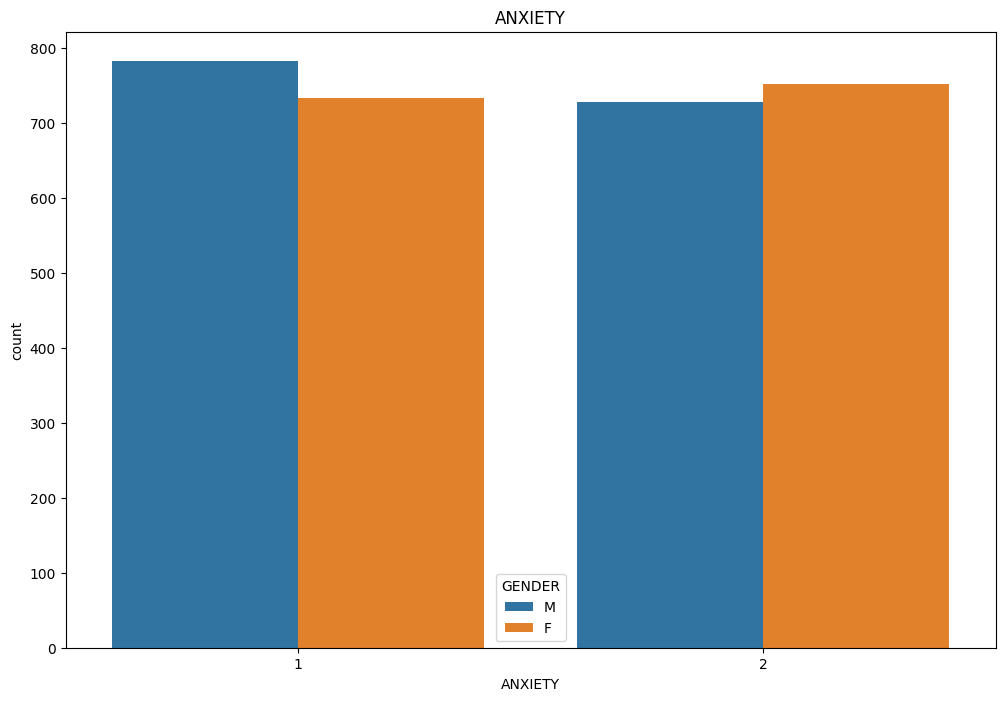

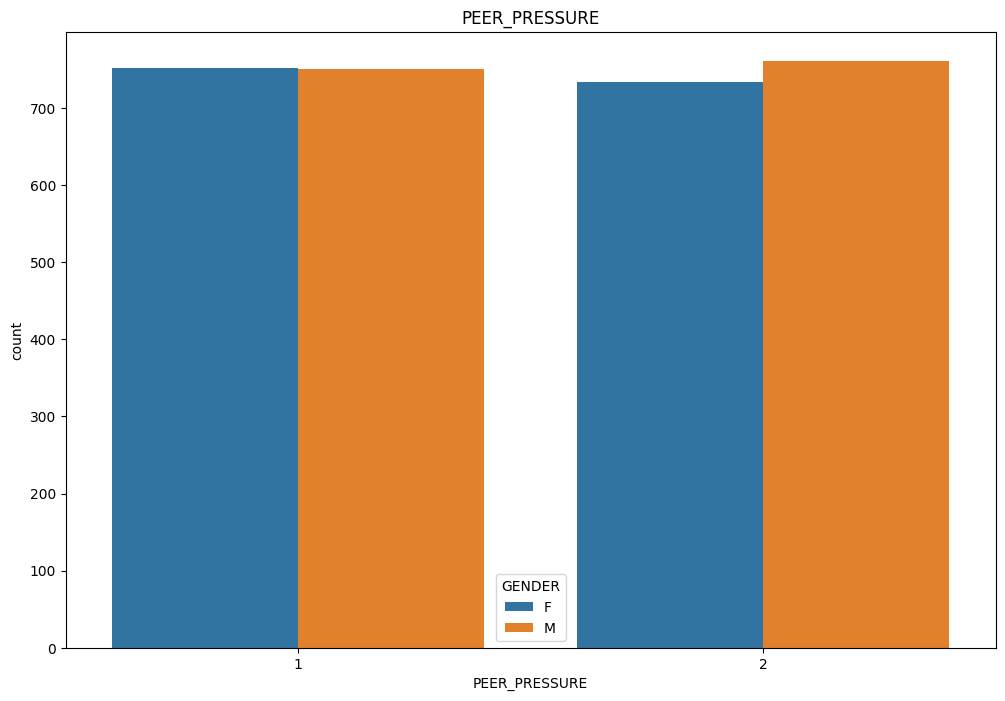

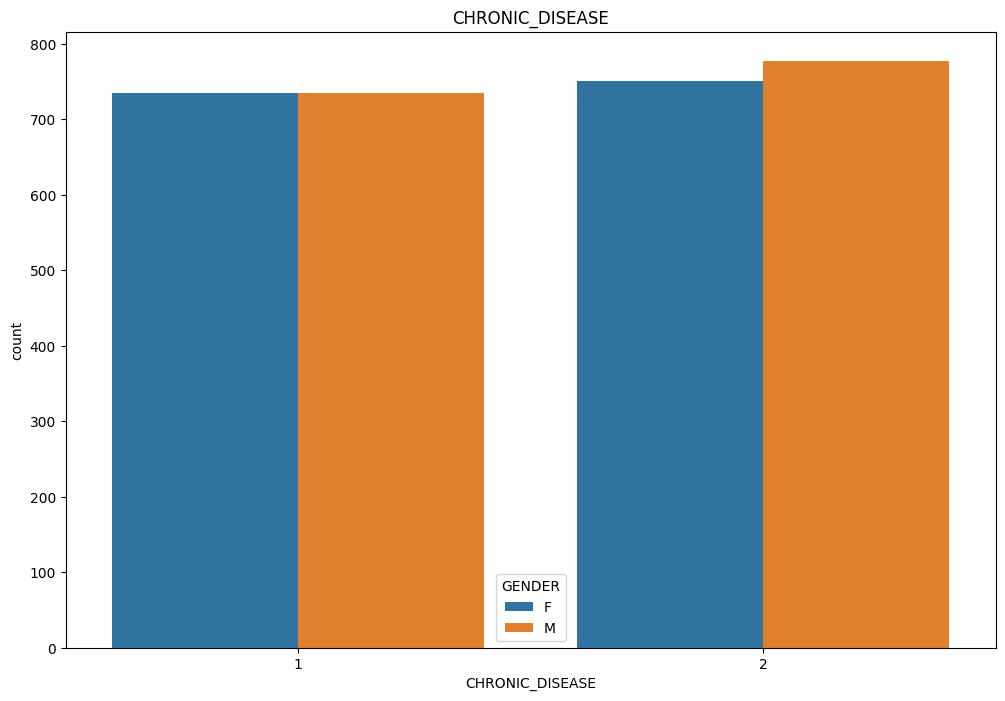

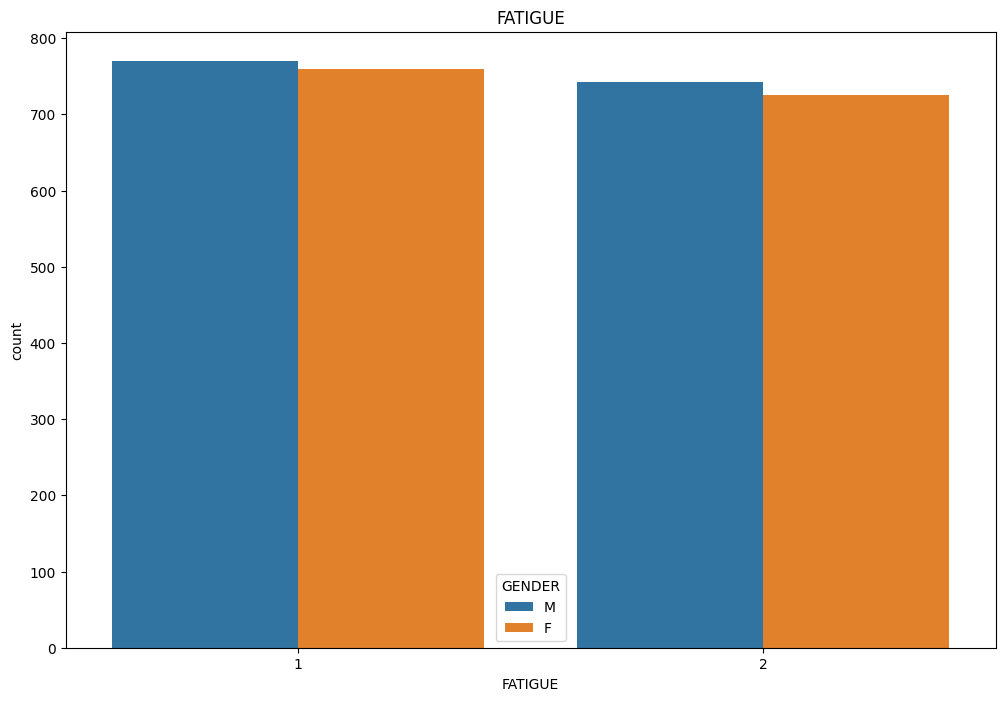

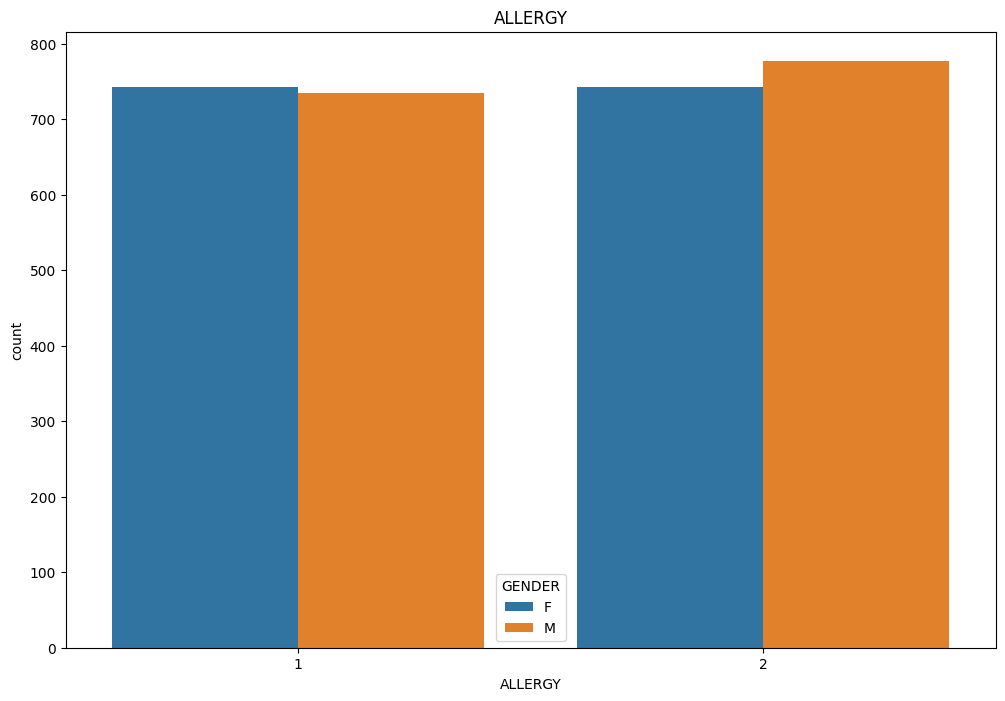

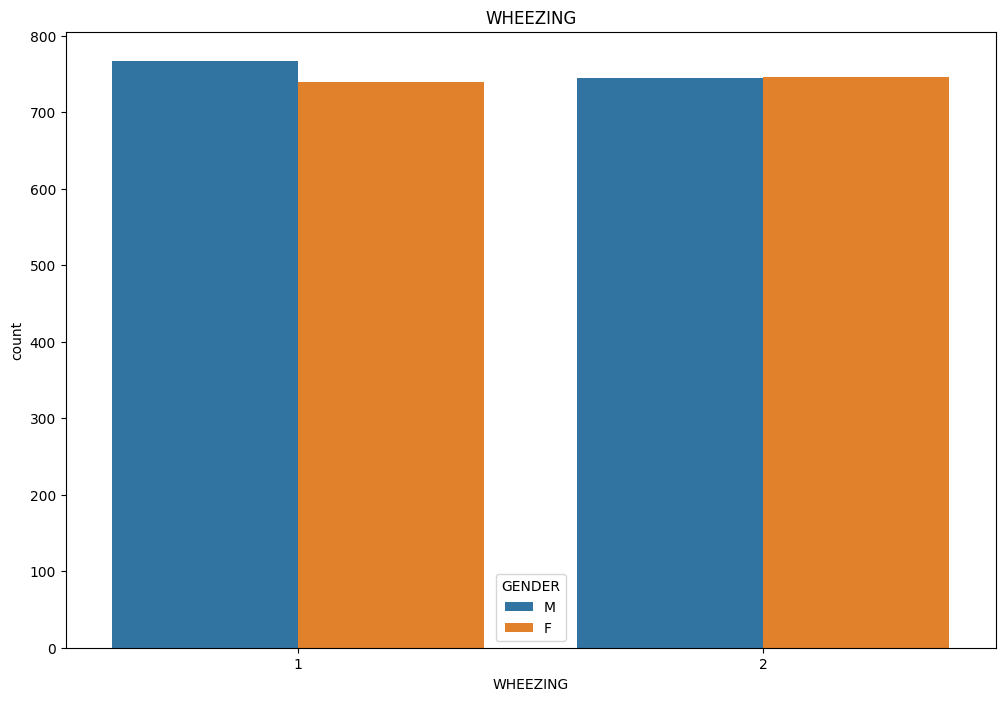

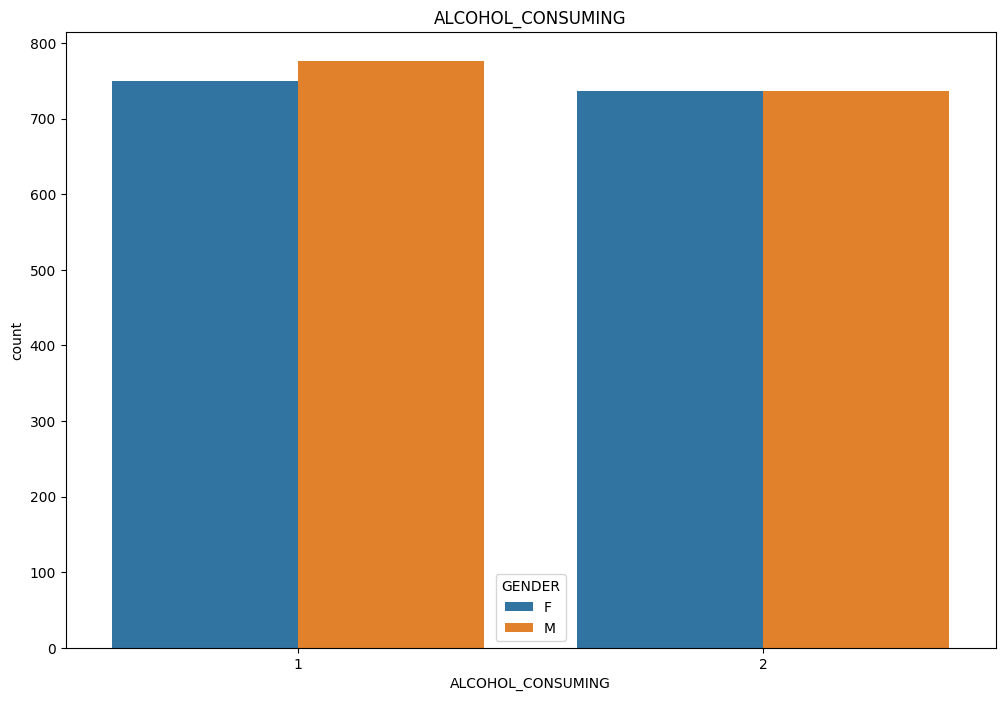

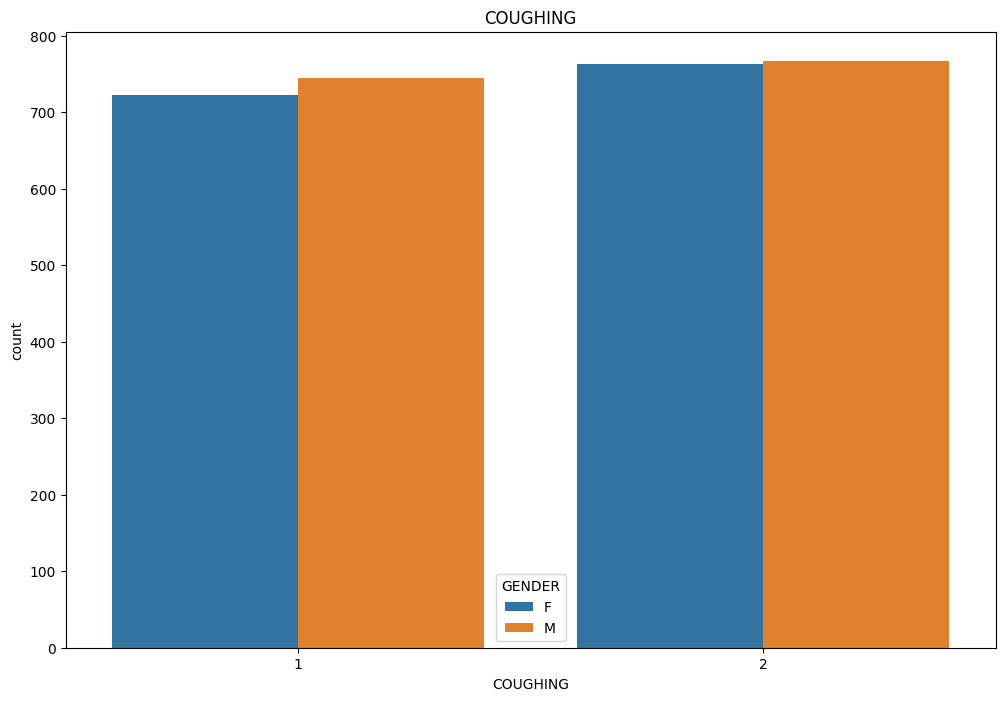

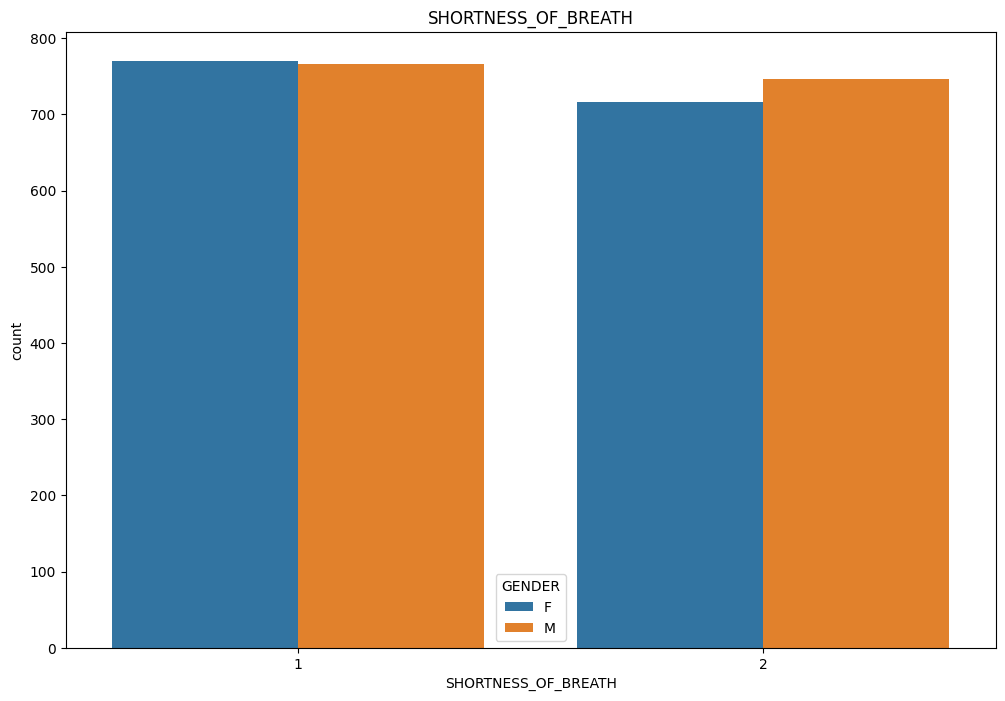

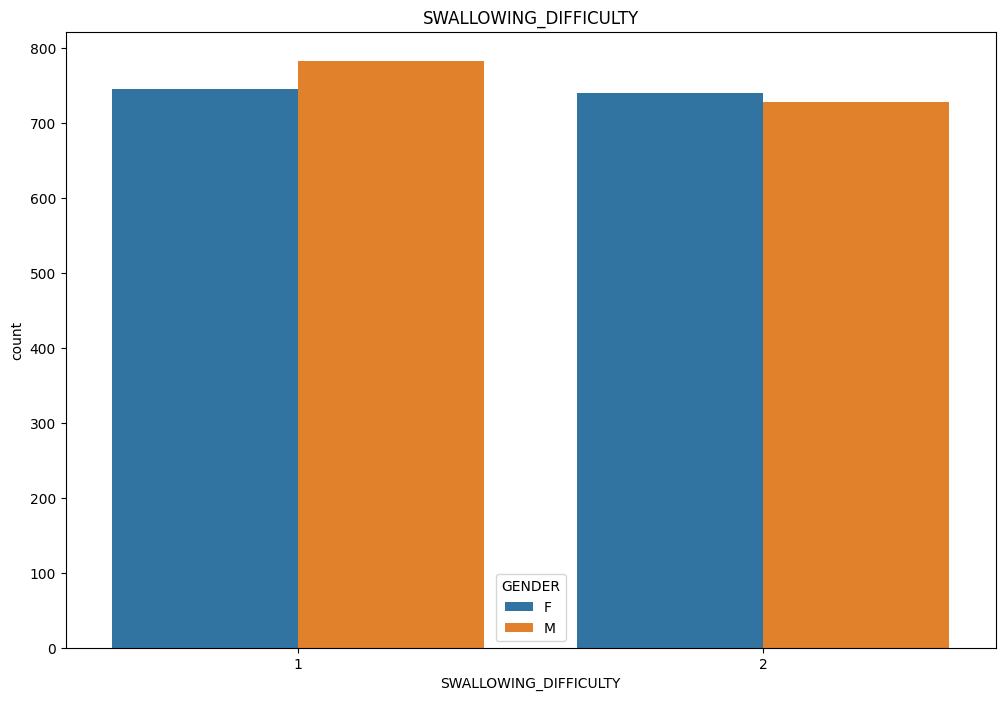

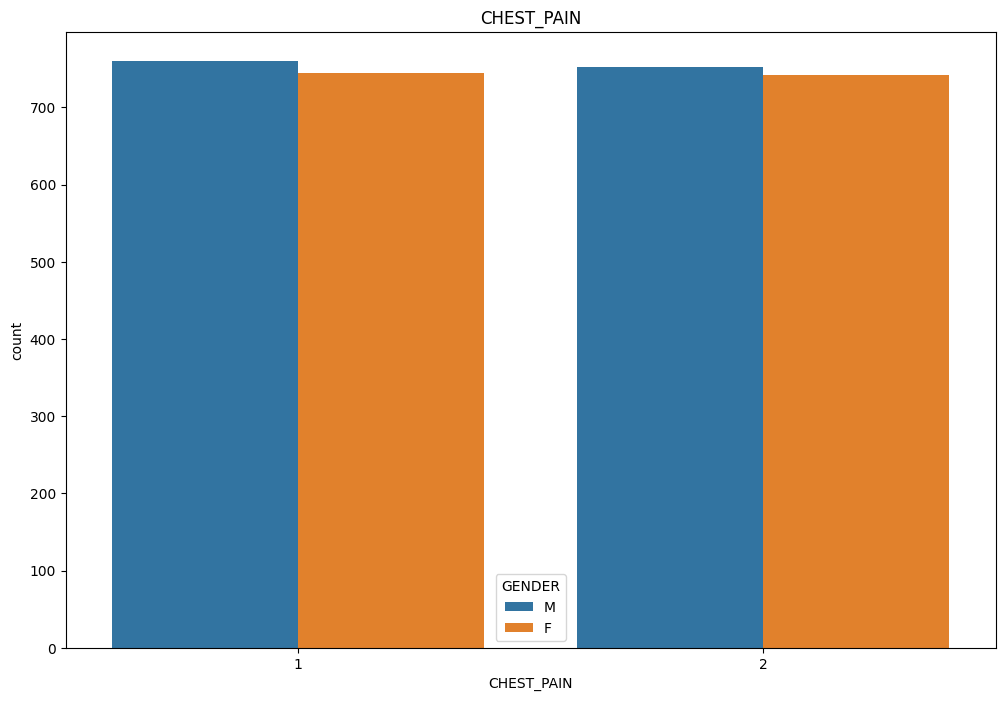

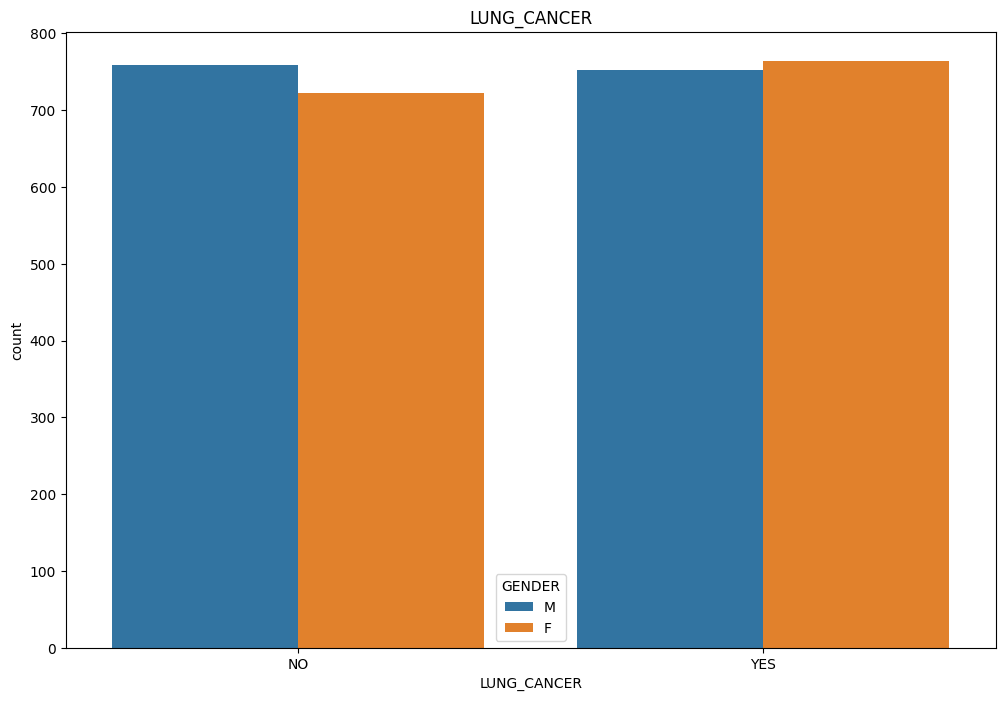

In [25]:
# Data Visualization - 5
# Grouped by Gender

import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis
for col in df.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=col, data=df, hue="GENDER")
    plt.title(col)

# Displaying the Plots
plt.show()

Cell 31 - Insights:
1. The fundamentals of the output remains the same, as compared to the previous output. The only exception being that, here the analysis is being done on the basis of Gender. 
2. The 1st graph is about Gender, already discussed in above cell's output.
3. The distribution of Males and Females across ages. Overall, the distribution is scattered and the numbers are almost equal.
4. Males who do not smoke are more than Females who do not smoke & the reverse is true for those who smoke!
5. Males are prone to have Yellow Fingers more than Females.
6. Females are slightly ahead in having anxiety, as per this dataset.
7. Females are prone to be in Peer Pressure, as compared to Males.
8. Females are prone to suffer more than Males in Chronic Disease.
9. Males suffer more from Fatigue.
10. Females are more prone to suffer from Allergy, as compared to Males.
11. Both Males and Females have the condition of Wheezing, equally.
12. Alcohol consumption also follows the same pattern as that of Wheezing.
13. Coughing is also not based on Gender.
14. Females are tend to suffer from Shortness of Breath 
15. Males suffer from Chest Pain, more than Females.
16. Females suffer from Lung Cancer more than Males.

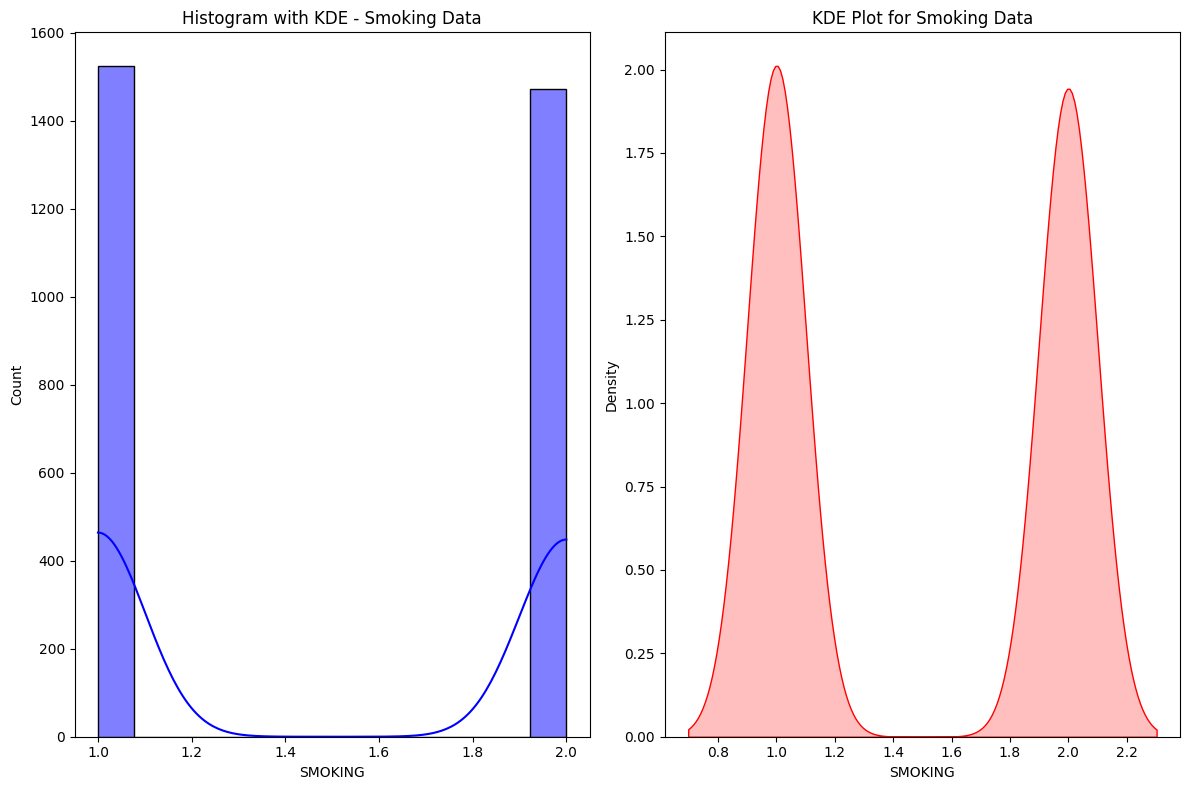

In [26]:
# Data Visualization - 6
# Influence of Smoking

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["SMOKING"], kde=True, color="blue")
plt.title("Histogram with KDE - Smoking Data")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["SMOKING"], shade=True, color="red")
plt.title("KDE Plot for Smoking Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 32 - Insights:
1. The output shows 2 Graphs - 1 Histogram with KDE (on the Left side) and another one is KDE Plot (on the Right side).
2. The histogram shows two distinct bars, indicating that the "SMOKING" variable has two main categories.
3. The KDE plot shows the density distribution of the "SMOKING" variable.
4. Binary Nature: The "SMOKING" variable is clearly binary, with values 1 and 2 representing two categories (Non - Smokers and Smokers) and there is no overlap between the two categories, as indicated by the distinct peaks in the KDE plot.
5. Data Distribution: The distinct peaks in the KDE plots highlight the separation between the categories, indicating that there are no overlapping or ambiguous values.

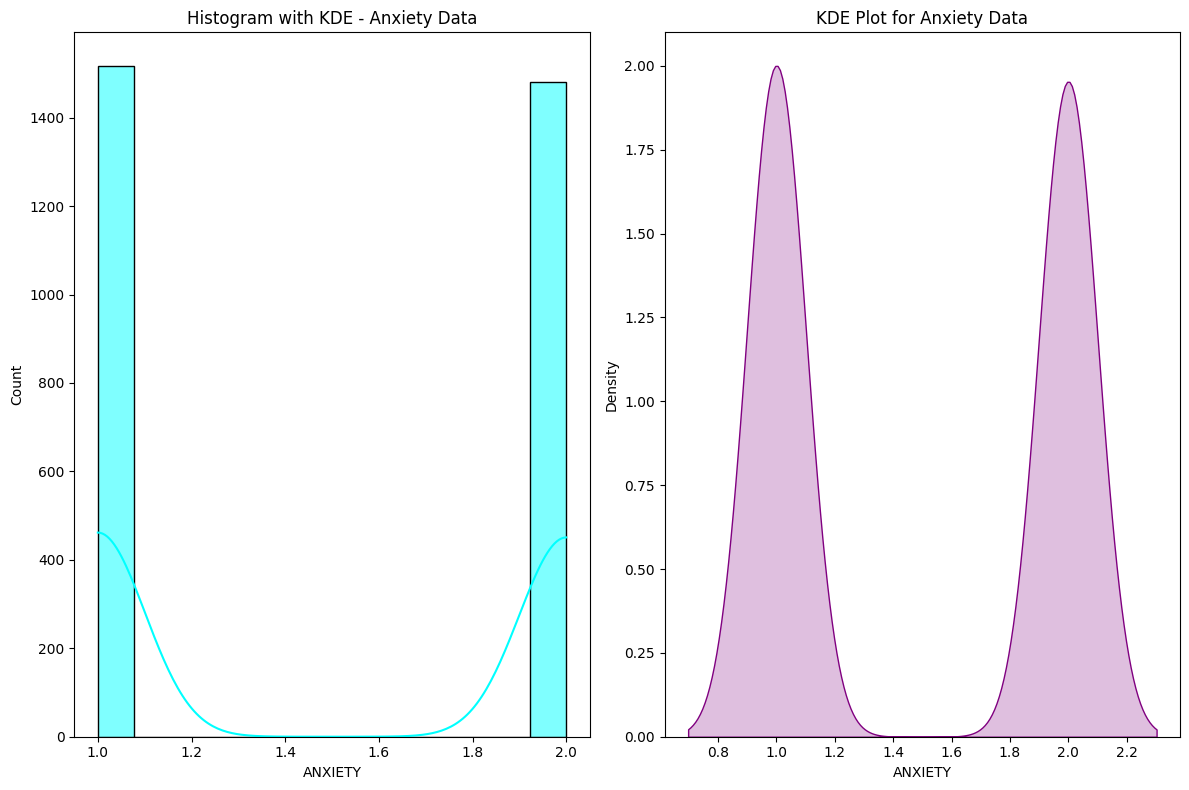

In [27]:
# Data Visualization - 7
# Influence of Anxiety

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["ANXIETY"], kde=True, color="cyan")
plt.title("Histogram with KDE - Anxiety Data")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["ANXIETY"], shade=True, color="purple")
plt.title("KDE Plot for Anxiety Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 33 - Insights:
1. The output is similar to the previous cell's output.
2. The only difference is the Data Column represented here. In this case, it is "ANXIETY", whereas, earlier it was "SMOKING".
3. The outputs show the distribution of people with either the presence or absence of Anxiety in the dataset, in the form of both a Histogram with a KDE Plot as well as a Standalone KDE Plot.
4. The histogram shows two distinct bars, indicating that the "ANXIETY" variable has two main categories, thereby indicating the Binary Nature of this variable.
5. The standalone KDE plot shows the density distribution of the "ANXIETY" variable and has two peaks at values 1 and 2, which confirms the discrete nature of the variable, with no intermediate values.

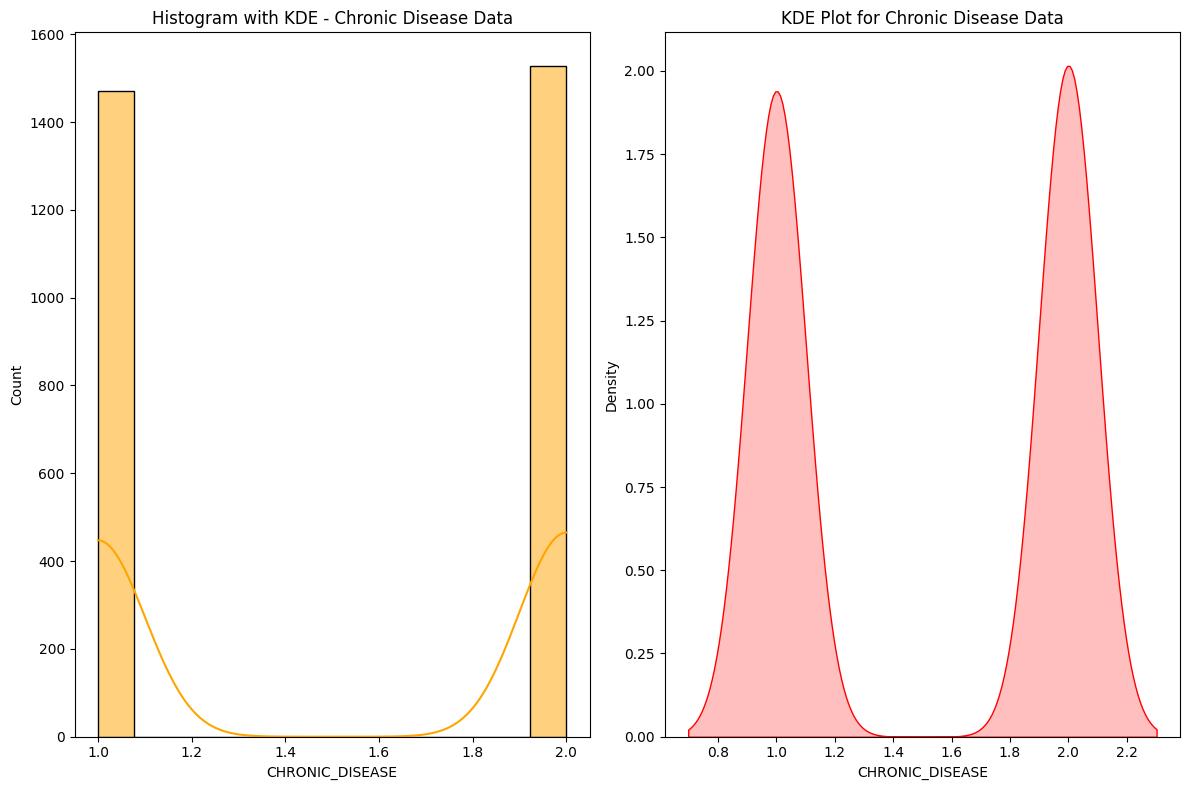

In [28]:
# Data Visualization - 8
# Influence of Chronic Disease

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["CHRONIC_DISEASE"], kde=True, color="orange")
plt.title("Histogram with KDE - Chronic Disease Data")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["CHRONIC_DISEASE"], shade=True, color="red")
plt.title("KDE Plot for Chronic Disease Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 34 - Insights:
1. Just like the couple of previous cell's outputs, this cell also displays 2 Graphs (1 Histogram with a KDE Plot and a Standalone KDE Plot).
2. This time, the Variable is "CHRONIC DISEASE".
3. The outputs show the distribution of people with either the presence or absence of CHRONIC DISEASE in the dataset, in the form of both a Histogram with a KDE Plot as well as a Standalone KDE Plot.
4. As it is evident from the both the graphs, the variable in nature.
5. The two peaks in the graphs represents that the data is distinct in nature, without any intermediate values.

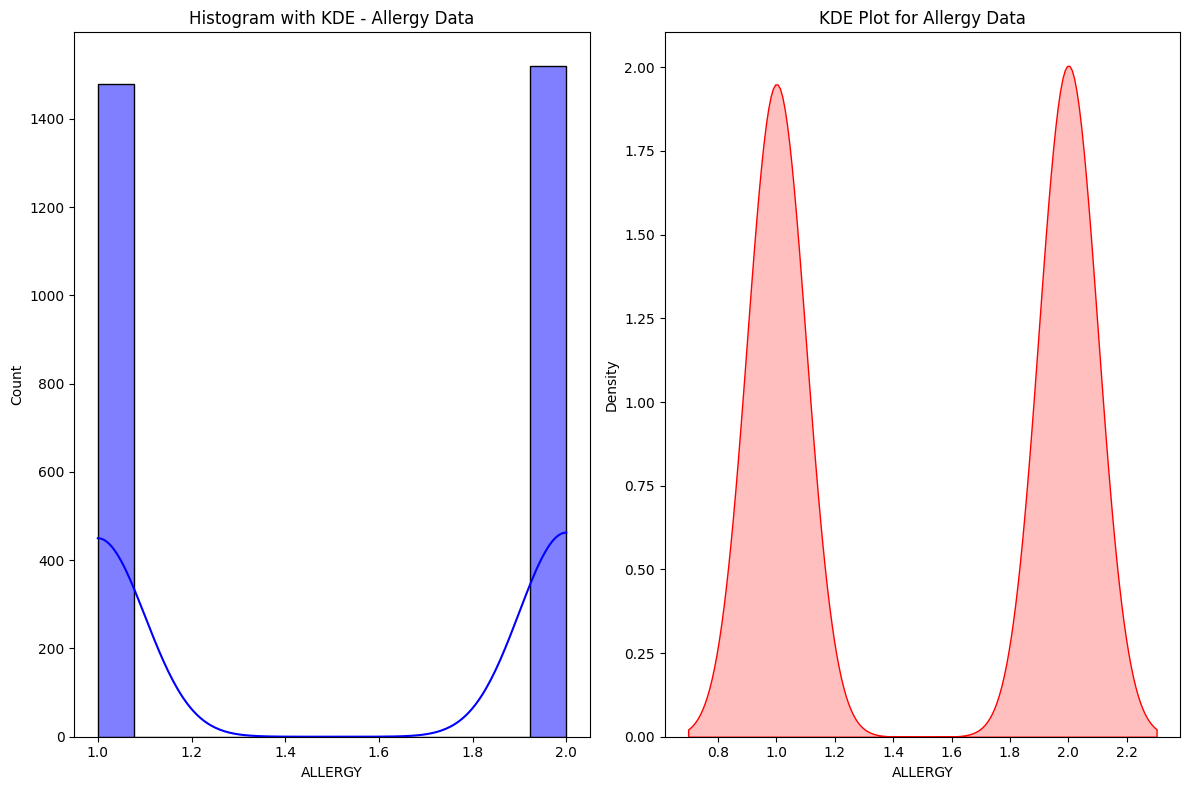

In [29]:
# Data Visualization - 9
# Influence of Allergy

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["ALLERGY"], kde=True, color="blue")
plt.title("Histogram with KDE - Allergy Data")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["ALLERGY"], shade=True, color="red")
plt.title("KDE Plot for Allergy Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 35 - Insights:
1. The output follows the same trend, just like its above cells.
2. Here, the variable is "ALLERGY".
3. The graphs has two peaks, showing either the absence or presence of ALLERGY.
4. Hence, it can be deduced that the data is distinct in nature and the variable ALLERGY is also binary in nature.
5. The distribution of data, in this case, is more uniform, as compared to the previously studied variables, as the difference between both the groups, is very minimum, as is evident from the graph.

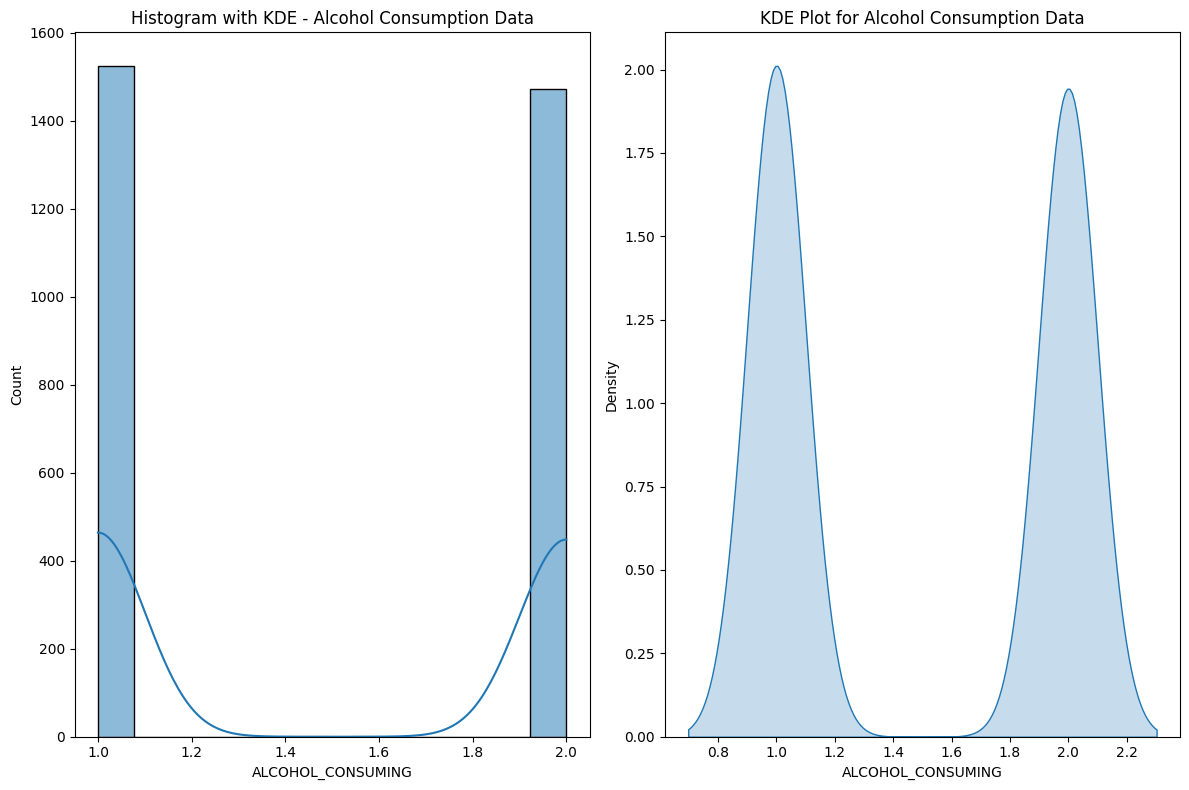

In [30]:
# Data Visualization - 10
# Influence of Alcohol Consumption

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["ALCOHOL_CONSUMING"], kde=True, palette="ylOrRd_d")
plt.title("Histogram with KDE - Alcohol Consumption Data")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["ALCOHOL_CONSUMING"], shade=True, palette="pastel")
plt.title("KDE Plot for Alcohol Consumption Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 36 - Insights:
1. The ongoing trend of 2 Graphs is continued.
2. Here, the variable is "ALCOHOL CONSUMPTION".
3. Whether the population, mentioned in the given dataset, consumes alcohol or not, has been shown by 2 Graphs, namely - a Histogram with KDE Plot (in the Left side) and a Standalone KDE Plot (in the Right side).
4. The two peaks in both the graphs, shows the binary nature of the variable as well as the distinct nature of the data.
5. Just like the previous cell's output, in case of "CHRONIC DISEASE", where the data was very much uniformly distributed (almost equally), the same pattern is observed here, as well.

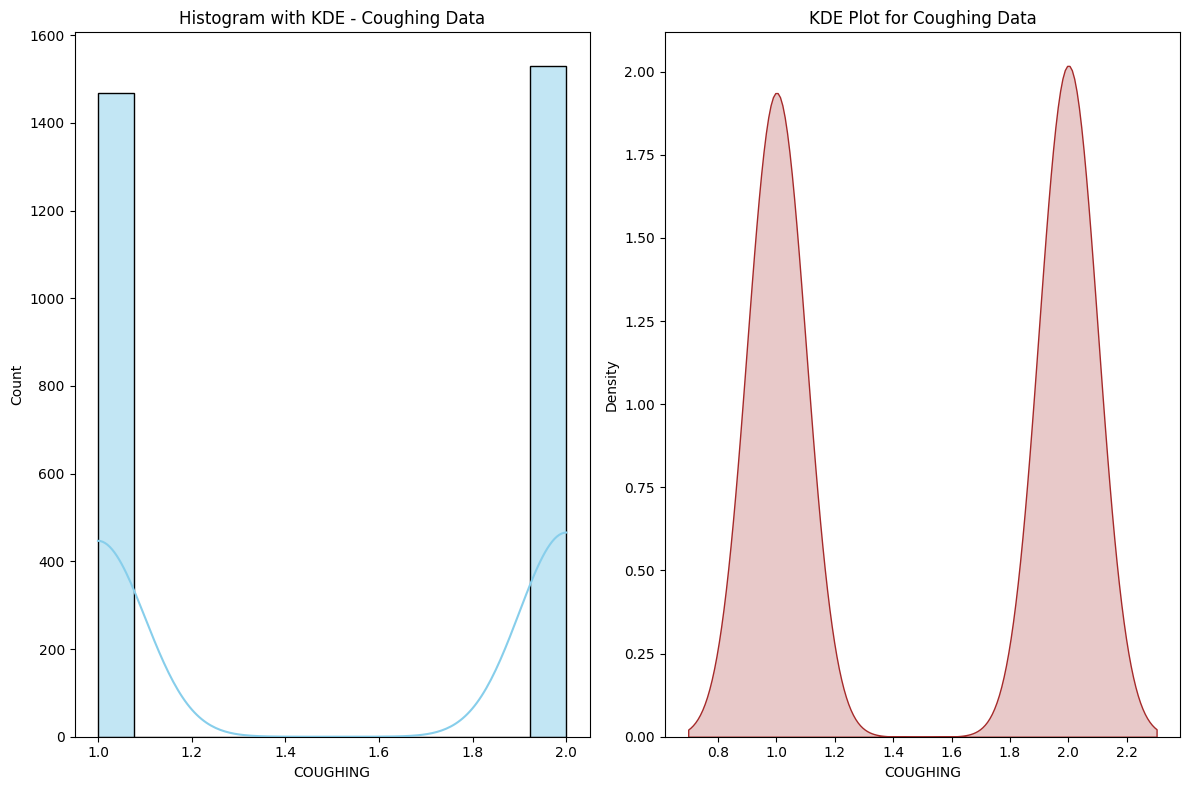

In [31]:
# Data Visualization - 11
# Influence of Coughing

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["COUGHING"], kde=True, color="skyblue")
plt.title("Histogram with KDE - Coughing Data")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["COUGHING"], shade=True, color="brown")
plt.title("KDE Plot for Coughing Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 37 - Insights:
1. The trend of 2 Graphs, continues.
2. The variable is "COUGHING".
3. Two peaks are observed, signifying the presence or absence of COUGHING, among the population, studied in the given dataset.
4. Data is distinct in nature.
5. The variable is binary in nature.

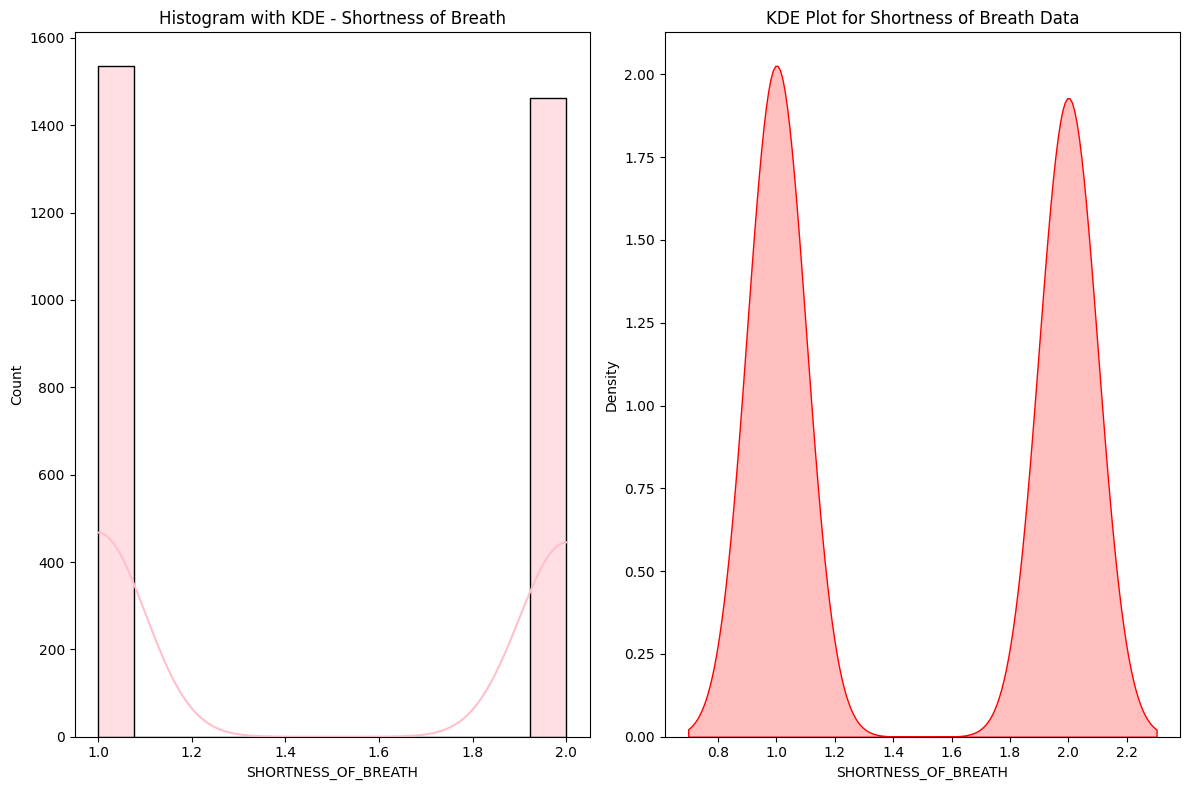

In [32]:
# Data Visualization - 12
# Influence of Shortness of Breath

# Creating an Output with 4 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["SHORTNESS_OF_BREATH"], kde=True, color="Pink")
plt.title("Histogram with KDE - Shortness of Breath")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["SHORTNESS_OF_BREATH"], shade=True, color="Red")
plt.title("KDE Plot for Shortness of Breath Data")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 38 - Insights:
1. Two graphs are displayed as output.
2. Both the graphs show two peaks.
3. Distinct nature of data can be observed.
4. Binary nature of the variable can also be observed,
5. Here, the variable is "SHORTNESS OF BREATH".

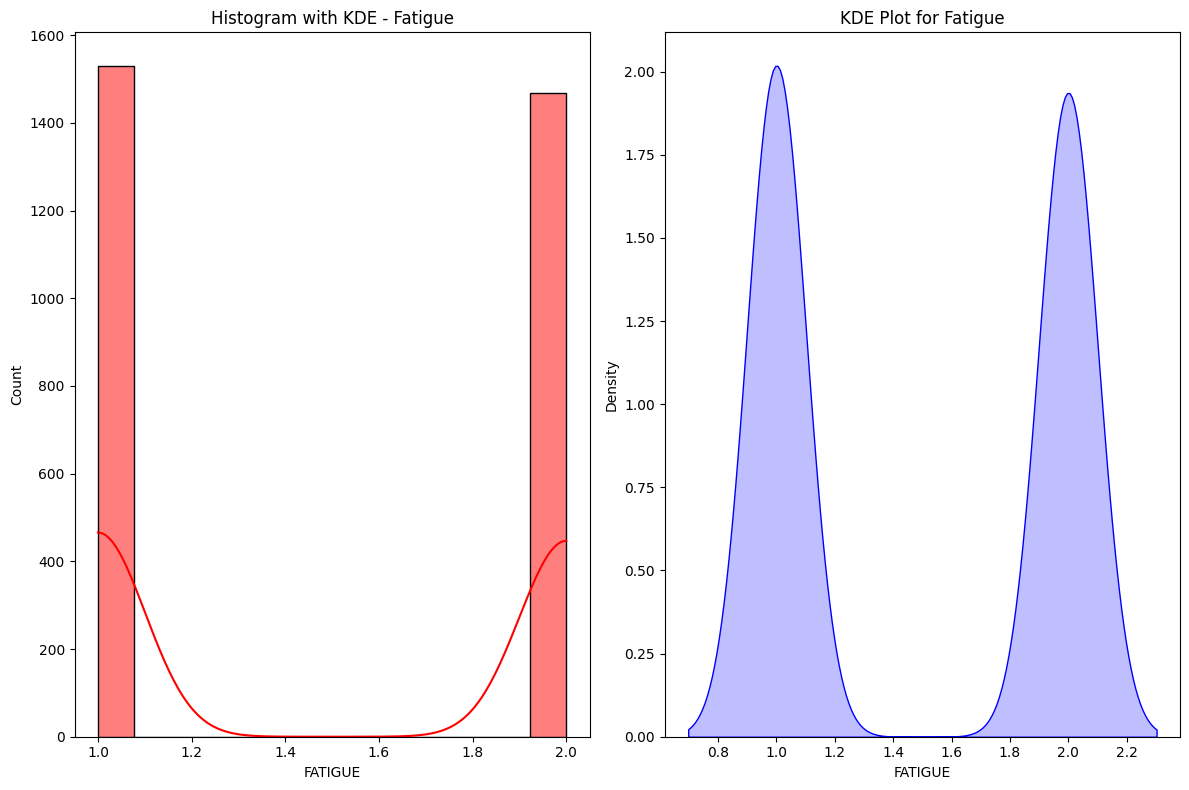

In [33]:
# Data Visualization - 13
# Influence of Fatigue

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["FATIGUE"], kde=True, color="red")
plt.title("Histogram with KDE - Fatigue")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["FATIGUE"], shade=True, color="blue")
plt.title("KDE Plot for Fatigue")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 39 - Insights:
1. The output shows 2 Graphs - 1 Histogram with KDE (on the Left side) and another one is KDE Plot (on the Right side), just like its previous counterparts.
2. The histogram shows two distinct bars, indicating that the "FATIGUE" variable has two main categories.
3. The KDE plot shows the density distribution of the "FATIGUE" variable.
4. Binary Nature: The "FATIGUE" variable is clearly binary, with values 1 and 2 representing two categories and there is no overlap between the two categories, as indicated by the distinct peaks in the KDE plot.
5. Data Distribution: The distinct peaks in the KDE plots highlight the separation between the categories, indicating that there are no overlapping or ambiguous values.

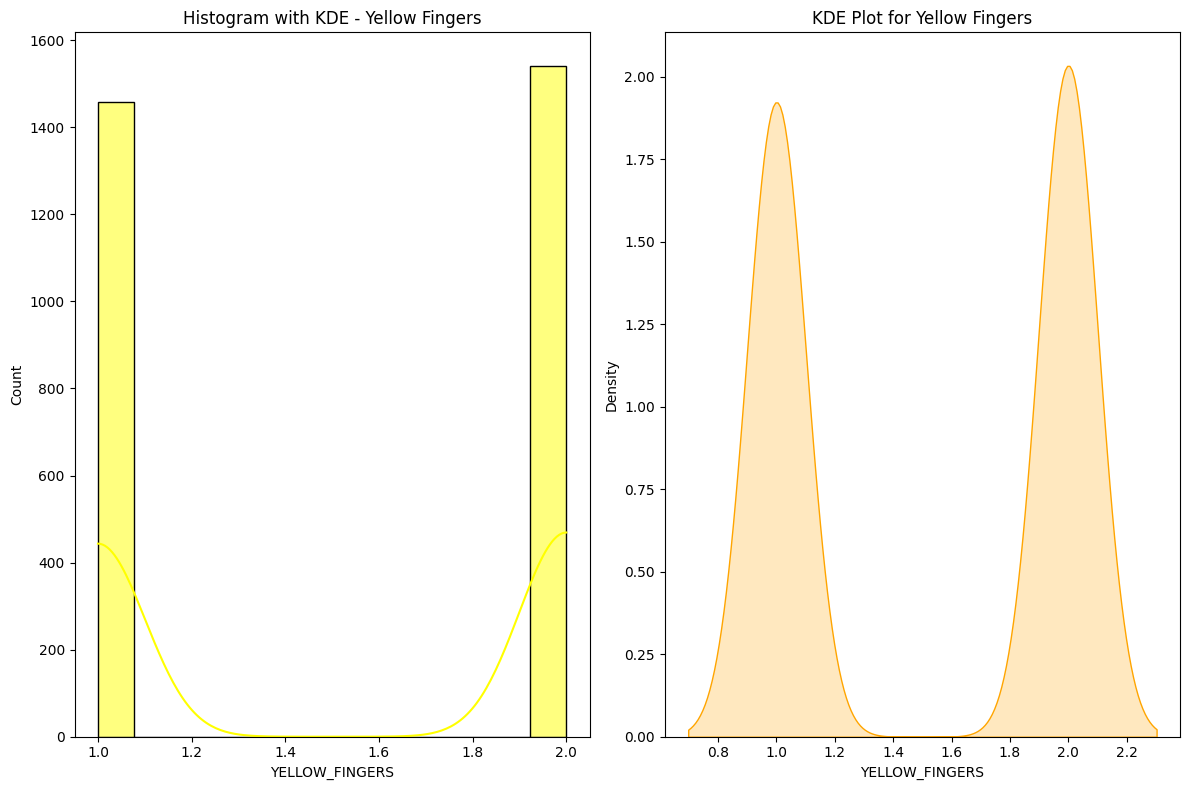

In [34]:
# Data Visualization - 14
# Influence of Yellow Fingers

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["YELLOW_FINGERS"], kde=True, color="yellow")
plt.title("Histogram with KDE - Yellow Fingers")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["YELLOW_FINGERS"], shade=True, color="orange")
plt.title("KDE Plot for Yellow Fingers")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 40 - Insights:
1. Two graphs are displayed as output.
2. Both the graphs show two peaks.
3. Distinct nature of data can be observed.
4. Binary nature of the variable can also be observed,
5. Here, the variable is "YELLOW FINGERS".

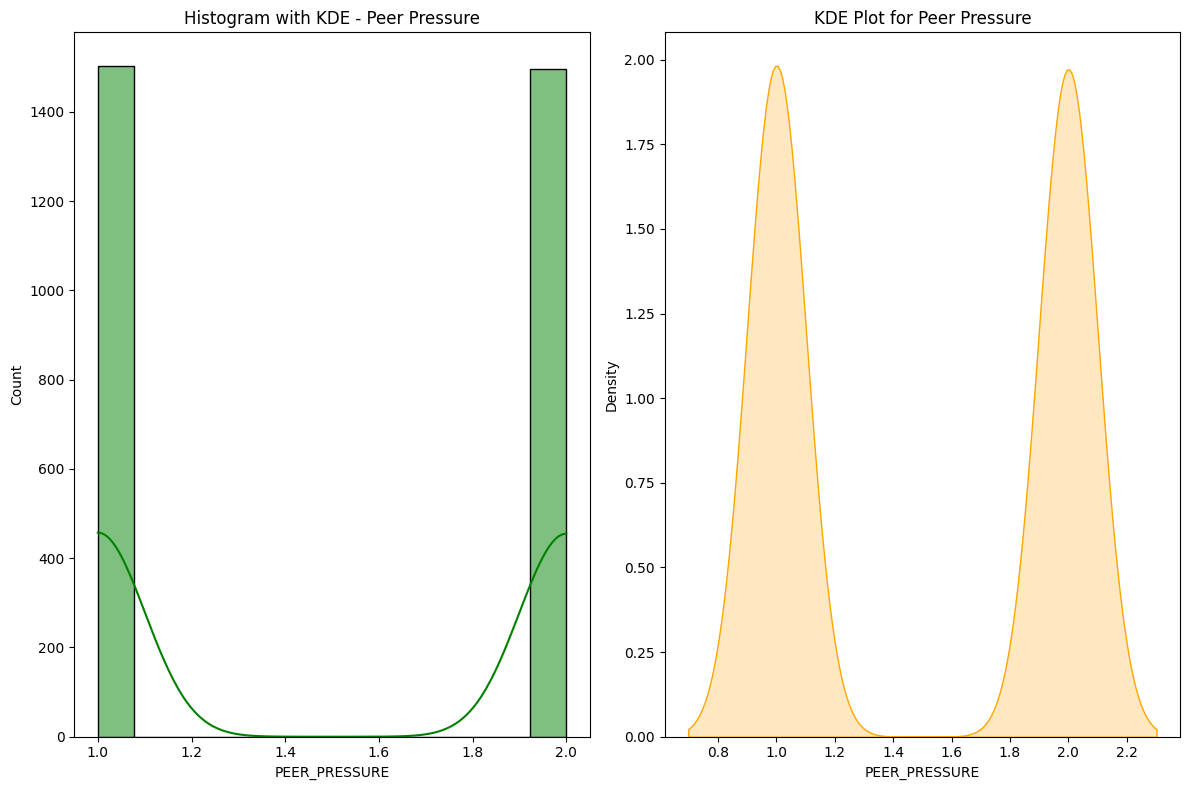

In [35]:
# Data Visualization - 15
# Influence of Peer Pressure

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["PEER_PRESSURE"], kde=True, color="green")
plt.title("Histogram with KDE - Peer Pressure")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["PEER_PRESSURE"], shade=True, color="orange")
plt.title("KDE Plot for Peer Pressure")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 41 - Insights:
1. The output follows the same trend, just like its above cells.
2. Here, the variable is "PEER PRESSURE".
3. The graphs has two peaks, showing either the absence or presence of PEER PRESSURE.
4. Hence, it can be deduced that the data is distinct in nature and the variable PEER PRESSURE is also binary in nature.
5. The distribution of data, in this case, is more very much uniform, as is evident from the graph.

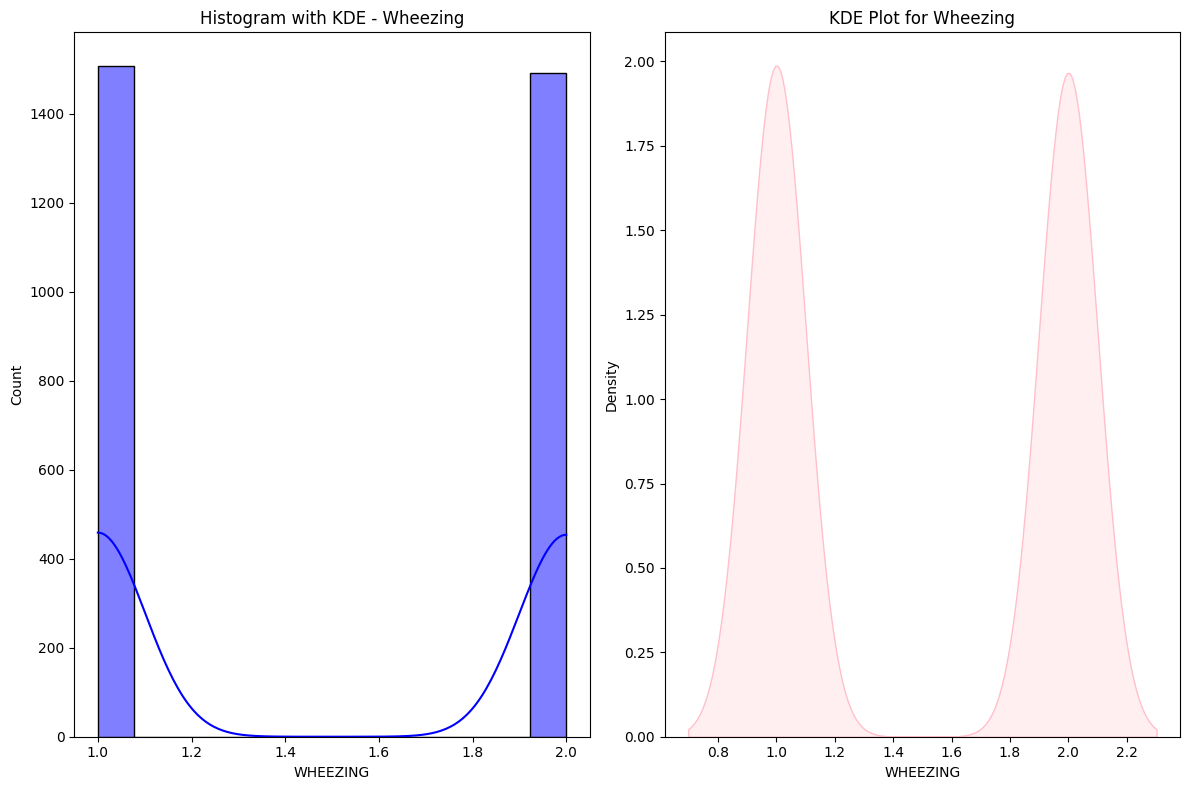

In [36]:
# Data Visualization - 16
# Influence of Wheezing

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["WHEEZING"], kde=True, color="blue")
plt.title("Histogram with KDE - Wheezing")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["WHEEZING"], shade=True, color="pink")
plt.title("KDE Plot for Wheezing")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 42 - Insights:
1. The output follows the same trend, just like its previous counterparts.
2. Here, the variable is "WHEEZING".
3. The graphs has two peaks, showing either the absence or presence of WHEEZING.
4. Hence, it can be deduced that the data is distinct in nature and the variable WHEEZING is also binary in nature.
5. The distribution of data, in this case, is more very much uniform, as is evident from the graph.

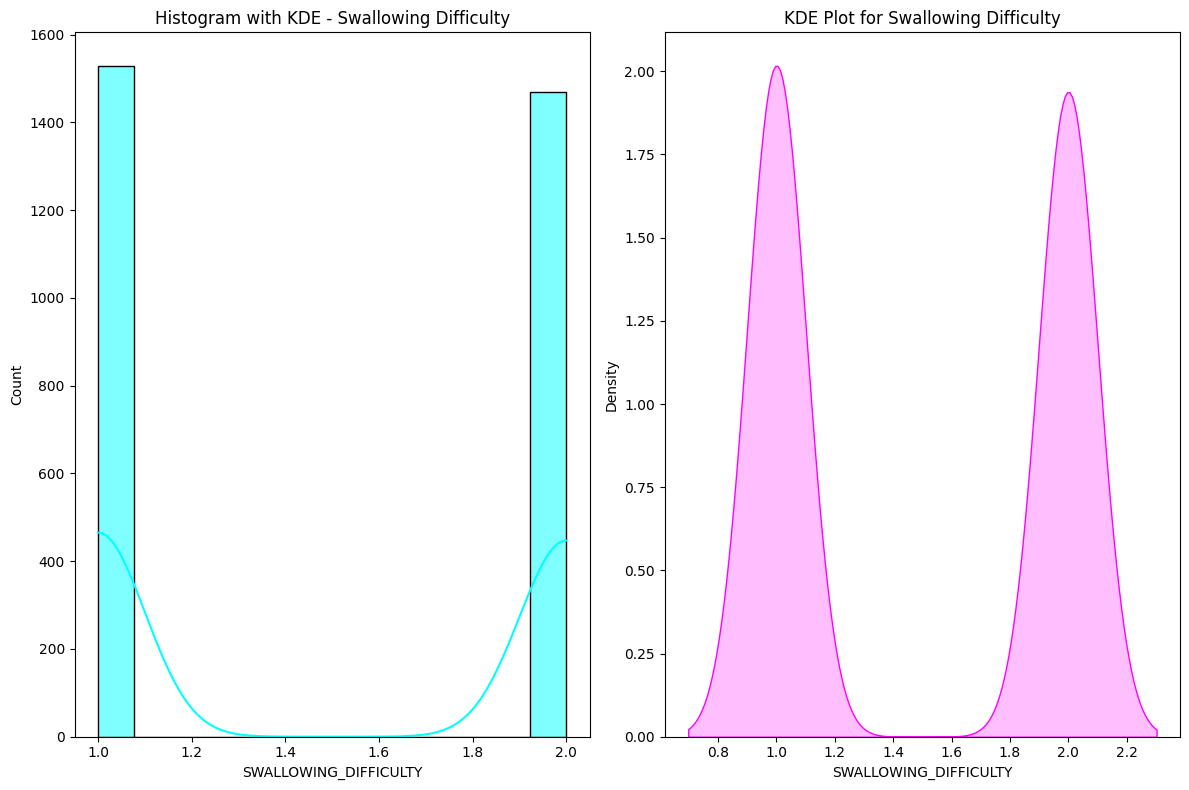

In [37]:
# Data Visualization - 17
# Influence of Swallowing Difficulty

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["SWALLOWING_DIFFICULTY"], kde=True, color="cyan")
plt.title("Histogram with KDE - Swallowing Difficulty")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["SWALLOWING_DIFFICULTY"], shade=True, color="magenta")
plt.title("KDE Plot for Swallowing Difficulty")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 43 - Insights:
1. Two graphs are displayed as output.
2. Both the graphs show two peaks.
3. Distinct nature of data can be observed.
4. Binary nature of the variable can also be observed,
5. Here, the variable is "SWALLOWING DIFFICULTY".

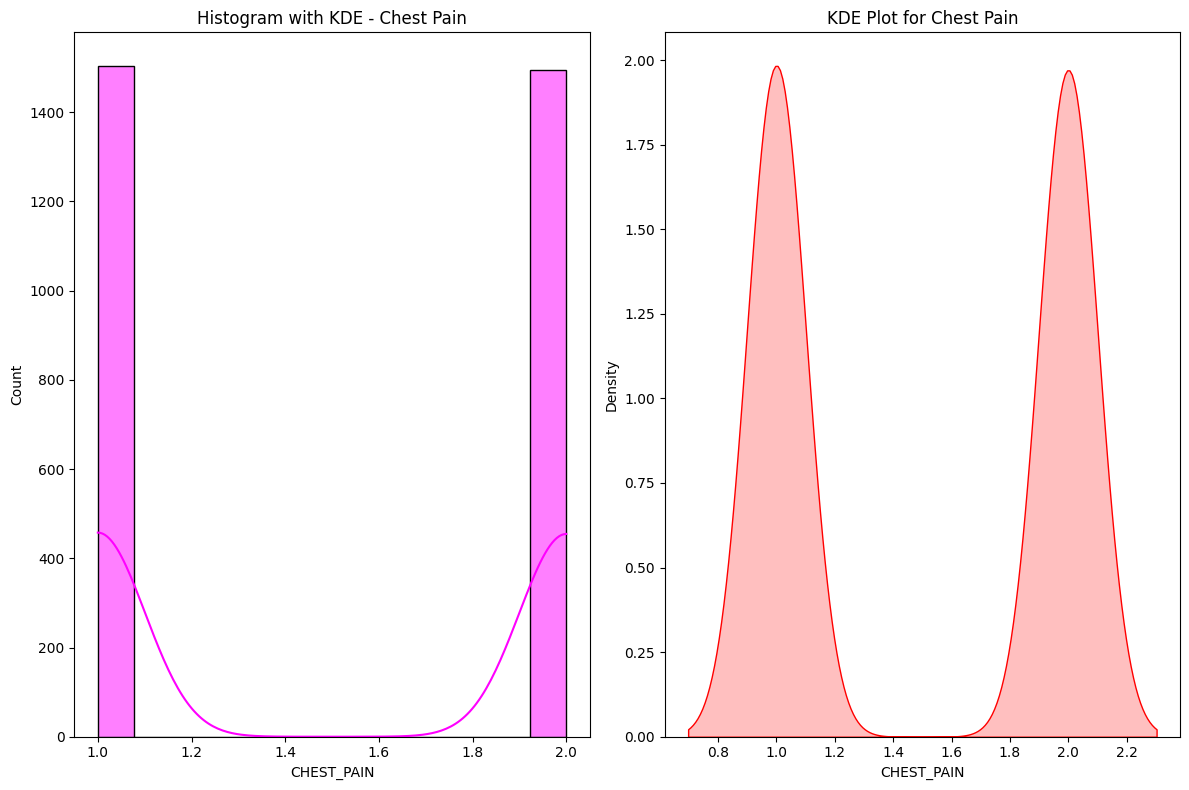

In [38]:
# Data Visualization - 18
# Influence of Chest Pain

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["CHEST_PAIN"], kde=True, color="magenta")
plt.title("Histogram with KDE - Chest Pain")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["CHEST_PAIN"], shade=True, color="red")
plt.title("KDE Plot for Chest Pain")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 44 - Insights:
1. The output follows the same trend, just like its previous counterparts.
2. Here, the variable is "CHEST PAIN".
3. The graphs has two peaks, showing either the absence or presence of CHEST PAIN.
4. Hence, it can be deduced that the data is distinct in nature and the variable CHEST PAIN is also binary in nature.
5. The distribution of data, in this case, is more very much uniform, as is evident from the graph.

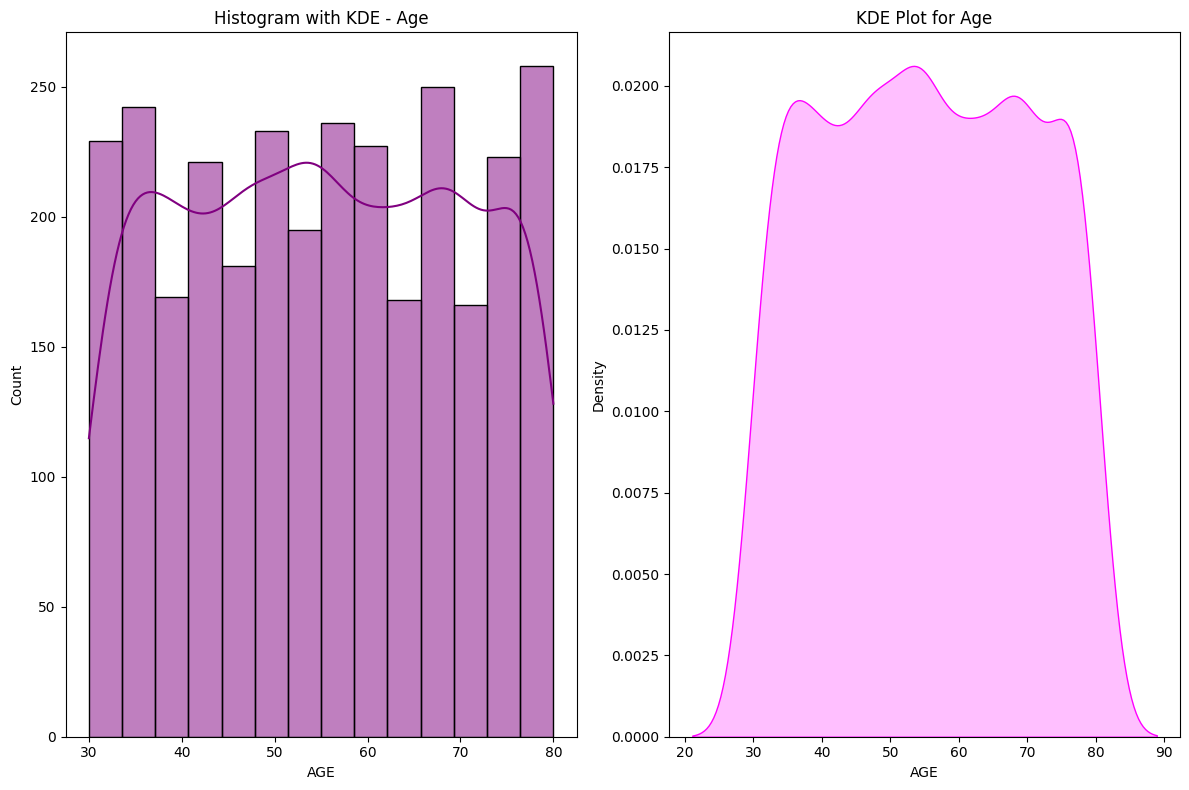

In [39]:
# Data Visualization - 19
# Influence of Age

# Creating an Output with 2 Plots
fig, axes = plt.subplots(1,2, figsize=(12,8))

# For Histplot with KDE
plt.subplot(1,2,1)
sns.histplot(df["AGE"], kde=True, color="purple")
plt.title("Histogram with KDE - Age")

# For KDE Plot
plt.subplot(1,2,2)
sns.kdeplot(df["AGE"], shade=True, color="magenta")
plt.title("KDE Plot for Age")

# Displaying the Output
plt.tight_layout()
plt.show()

Cell 45 - Insights:
1. Just like the previous counterparts, this cell also displays 2 Graphs as its output - 1 Histogram (on the Left side) abd one KDE Plot (on the Right side).
2. The variable here studied is "AGE".
3. The histogram shows the distribution of the "AGE" variable with bars representing different age groups and the age distribution appears fairly uniform, with counts for different age groups ranging from 30 to 80, with some minor variations.
4. The KDE plot overlay shows a smooth curve representing the density of the age distribution.
5. The smoothness of the graph indicates that the data is distributed uniformly, without any significant skewness and the data is consistent, although there are some minor fluctuations, suggesting some variability in the age distribution.

# Data Encoding

In [38]:
# Data Encoding
# Label Encoder

# Creating an object of Label Encoder
lable_encoder = LabelEncoder()

# Converting Object Data to Integer Data
df['GENDER']=lable_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER']=lable_encoder.fit_transform(df['LUNG_CANCER'])

# Correctly labelling the Binary Columns
df['SMOKING']=lable_encoder.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=lable_encoder.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=lable_encoder.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=lable_encoder.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC_DISEASE']=lable_encoder.fit_transform(df['CHRONIC_DISEASE'])
df['FATIGUE']=lable_encoder.fit_transform(df['FATIGUE'])
df['ALLERGY']=lable_encoder.fit_transform(df['ALLERGY'])
df['WHEEZING']=lable_encoder.fit_transform(df['WHEEZING'])
df['ALCOHOL_CONSUMING']=lable_encoder.fit_transform(df['ALCOHOL_CONSUMING'])
df['COUGHING']=lable_encoder.fit_transform(df['COUGHING'])
df['SHORTNESS_OF_BREATH']=lable_encoder.fit_transform(df['SHORTNESS_OF_BREATH'])
df['SWALLOWING_DIFFICULTY']=lable_encoder.fit_transform(df['SWALLOWING_DIFFICULTY'])
df['CHEST_PAIN']=lable_encoder.fit_transform(df['CHEST_PAIN'])

Cell 46 - Insights:
1. An object of LabelEncoder is created.
2. The "fit_transform" method is called on the object to the Categorical Data to Numerical Data and also correctly label the the Numerical Columns containing Binary Data.
3. Previously, the Dataset was labelled incorrectly (True / False as 1 / 0), but now it has been labelled with respect to the convention 0 / 1, in case of Numerical Columns for Binary Data.
4. For Calegorical Columns: In case of GENDER, 0 refers to Female and 1 refers to Male, while for Lung Cancer, 0 means Absence of Lung Cancer and 1 means Presence of Lung Cancer.
5. The above mentioned changes will be visible from the outputs of next cell onwards.


In [39]:
# Visualizing the Dataset after Data Encoding
df

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        0               0        0              1   
1          0   55        0               1        1              0   
2          0   78        1               1        0              0   
3          1   60        1               0        0              0   
4          0   80        0               0        1              0   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        1               0        0              1   
2996       0   75        0               1        0              0   
2997       0   62        1               1        1              0   
2998       1   30        0               0        1              1   
2999       1   40        0               1        1              0   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   1        0        1         1                  1   
1                   0        1        1         1                  0   
2                   0        1        0         1                  0   
3                   1        0        1         0                  0   
4                   0        1        0         1                  0   
...               ...      ...      ...       ...                ...   
2995                1        0        0         0                  0   
2996                0        1        1         1                  1   
2997                1        1        1         1                  0   
2998                1        1        1         1                  1   
2999                0        0        1         1                  1   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
0            1                    1                      1           0   
1            0                    0                      1           1   
2            0                    1                      0           0   
3            1                    0                      1           1   
4            0                    0                      0           1   
...        ...                  ...                    ...         ...   
2995         1                    0                      0           1   
2996         0                    0                      1           0   
2997         0                    1                      1           1   
2998         0                    1                      0           1   
2999         0                    0                      0           0   

      LUNG_CANCER  
0               0  
1               0  
2               1  
3               1  
4               0  
...           ...  
2995            0  
2996            0  
2997            1  
2998            1  
2999            1  

[2998 rows x 16 columns]

Cell 46 - Insights:
1. After Data Encoding, the dataset is printed.
2. The Encoding has been successful.
3. The output is similar to Cell 2 and Cell 18

In [40]:
# Checking the Data Type
df.dtypes

GENDER                   int32
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC_DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL_CONSUMING        int64
COUGHING                 int64
SHORTNESS_OF_BREATH      int64
SWALLOWING_DIFFICULTY    int64
CHEST_PAIN               int64
LUNG_CANCER              int32
dtype: object

Cell 47 - Insights:
1. The Data type of each column present in the dataset has been checked, after Data Encoding.
2. Similar to the output of cell 12

In [14]:
# Value Counts for each Column in the given Dataset after Data Encoding
for col in df.columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print("---")

Value counts for column GENDER:
GENDER
1    1512
0    1486
Name: count, dtype: int64
---
Value counts for column AGE:
AGE
54    73
75    71
67    71
47    70
69    70
78    69
55    69
79    68
32    66
39    65
37    65
53    65
77    64
46    64
63    63
33    62
50    62
70    61
68    61
35    60
48    60
36    60
71    59
76    59
31    59
56    58
62    58
57    58
52    57
80    57
61    57
60    57
34    57
42    56
41    56
49    56
64    56
59    55
51    55
43    55
44    54
38    53
40    51
58    51
74    50
65    49
66    48
45    47
72    46
73    43
30    42
Name: count, dtype: int64
---
Value counts for column SMOKING:
SMOKING
0    1525
1    1473
Name: count, dtype: int64
---
Value counts for column YELLOW_FINGERS:
YELLOW_FINGERS
1    1541
0    1457
Name: count, dtype: int64
---
Value counts for column ANXIETY:
ANXIETY
0    1517
1    1481
Name: count, dtype: int64
---
Value counts for column PEER_PRESSURE:
PEER_PRESSURE
0    1503
1    1495
Name: count, dtype: int64
---

Cell 48 - Insights:
1. Value counts, i.e., frequency of each entry in each column of the dataset, has been presented in the form of output.
2. Similar to the outputs of Cells 14 and 25.

In [16]:
# Print the Unique Values of each Column after Data Encoding
print("The Unique Values for each Column is given below:\n")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

The Unique Values for each Column is given below:

GENDER: [1 0]
AGE: [65 55 78 60 80 58 70 74 77 67 35 79 39 62 64 66 76 48 33 47 50 36 37 51
 53 72 71 54 41 46 59 32 34 44 38 69 45 40 63 75 52 31 57 73 42 56 68 61
 30 49 43]
SMOKING: [0 1]
YELLOW_FINGERS: [0 1]
ANXIETY: [0 1]
PEER_PRESSURE: [1 0]
CHRONIC_DISEASE: [1 0]
FATIGUE: [0 1]
ALLERGY: [1 0]
WHEEZING: [1 0]
ALCOHOL_CONSUMING: [1 0]
COUGHING: [1 0]
SHORTNESS_OF_BREATH: [1 0]
SWALLOWING_DIFFICULTY: [1 0]
CHEST_PAIN: [0 1]
LUNG_CANCER: [0 1]


Cell 49 - Insights:
1. Provide unique values for each column.
2. Similar to the outputs of Cells 15 and 26.

In [17]:
# Description of the Dataset after Data Encoding
df.describe()

GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  2998.000000  2998.000000  2998.000000     2998.000000  2998.000000   
mean      0.504336    55.171448     0.491328        0.514009     0.493996   
std       0.500065    14.728302     0.500008        0.499887     0.500047   
min       0.000000    30.000000     0.000000        0.000000     0.000000   
25%       0.000000    42.000000     0.000000        0.000000     0.000000   
50%       1.000000    55.000000     0.000000        1.000000     0.000000   
75%       1.000000    68.000000     1.000000        1.000000     1.000000   
max       1.000000    80.000000     1.000000        1.000000     1.000000   

       PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count    2998.000000      2998.000000  2998.000000  2998.000000  2998.000000   
mean        0.498666         0.509673     0.489660     0.507005     0.497332   
std         0.500082         0.499990     0.499976     0.500034     0.500076   
min         0.000000         0.000000     0.000000     0.000000     0.000000   
25%         0.000000         0.000000     0.000000     0.000000     0.000000   
50%         0.000000         1.000000     0.000000     1.000000     0.000000   
75%         1.000000         1.000000     1.000000     1.000000     1.000000   
max         1.000000         1.000000     1.000000     1.000000     1.000000   

       ALCOHOL_CONSUMING     COUGHING  SHORTNESS_OF_BREATH  \
count        2998.000000  2998.000000          2998.000000   
mean            0.491328     0.510340             0.487658   
std             0.500008     0.499976             0.499931   
min             0.000000     0.000000             0.000000   
25%             0.000000     0.000000             0.000000   
50%             0.000000     1.000000             0.000000   
75%             1.000000     1.000000             1.000000   
max             1.000000     1.000000             1.000000   

       SWALLOWING_DIFFICULTY   CHEST_PAIN  LUNG_CANCER  
count            2998.000000  2998.000000  2998.000000  
mean                0.489993     0.498332     0.506004  
std                 0.499983     0.500081     0.500047  
min                 0.000000     0.000000     0.000000  
25%                 0.000000     0.000000     0.000000  
50%                 0.000000     0.000000     1.000000  
75%                 1.000000     1.000000     1.000000  
max                 1.000000     1.000000     1.000000

Cell 50 - Insights:
1. Provide statistical summary of the dataset.
2. This output is similar to the outputs of Cells 8 and 23.
3. But, here Categorical Columns like GENDER and LUNG_CANCER are also presented as they have been transfirmed into Numerical Data by LabelEncoder.

In [18]:
# Transposing the above Output after Data Encoding
df.describe().T

count       mean        std   min   25%   50%   75%  \
GENDER                 2998.0   0.504336   0.500065   0.0   0.0   1.0   1.0   
AGE                    2998.0  55.171448  14.728302  30.0  42.0  55.0  68.0   
SMOKING                2998.0   0.491328   0.500008   0.0   0.0   0.0   1.0   
YELLOW_FINGERS         2998.0   0.514009   0.499887   0.0   0.0   1.0   1.0   
ANXIETY                2998.0   0.493996   0.500047   0.0   0.0   0.0   1.0   
PEER_PRESSURE          2998.0   0.498666   0.500082   0.0   0.0   0.0   1.0   
CHRONIC_DISEASE        2998.0   0.509673   0.499990   0.0   0.0   1.0   1.0   
FATIGUE                2998.0   0.489660   0.499976   0.0   0.0   0.0   1.0   
ALLERGY                2998.0   0.507005   0.500034   0.0   0.0   1.0   1.0   
WHEEZING               2998.0   0.497332   0.500076   0.0   0.0   0.0   1.0   
ALCOHOL_CONSUMING      2998.0   0.491328   0.500008   0.0   0.0   0.0   1.0   
COUGHING               2998.0   0.510340   0.499976   0.0   0.0   1.0   1.0   
SHORTNESS_OF_BREATH    2998.0   0.487658   0.499931   0.0   0.0   0.0   1.0   
SWALLOWING_DIFFICULTY  2998.0   0.489993   0.499983   0.0   0.0   0.0   1.0   
CHEST_PAIN             2998.0   0.498332   0.500081   0.0   0.0   0.0   1.0   
LUNG_CANCER            2998.0   0.506004   0.500047   0.0   0.0   1.0   1.0   

                        max  
GENDER                  1.0  
AGE                    80.0  
SMOKING                 1.0  
YELLOW_FINGERS          1.0  
ANXIETY                 1.0  
PEER_PRESSURE           1.0  
CHRONIC_DISEASE         1.0  
FATIGUE                 1.0  
ALLERGY                 1.0  
WHEEZING                1.0  
ALCOHOL_CONSUMING       1.0  
COUGHING                1.0  
SHORTNESS_OF_BREATH     1.0  
SWALLOWING_DIFFICULTY   1.0  
CHEST_PAIN              1.0  
LUNG_CANCER             1.0

Cell 51 - Insights:
1. Similar to the outputs of Cells 9 and 24.
2. Provides a transposed view of the output of Cell 50, for a better and concise view.

# Data Visualization (Part 2)

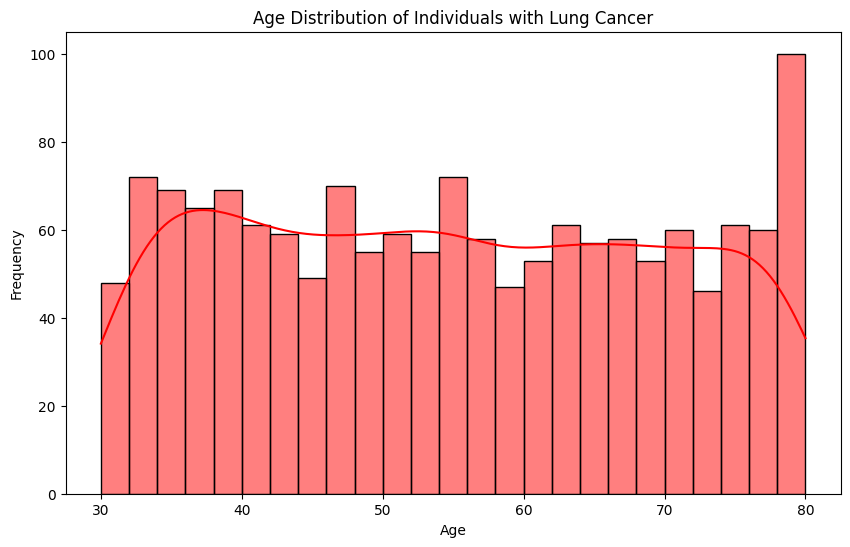

In [41]:
# Data Visualization - 20
# Age distribution for Lung Cancer Patient

lung_cancer_patients = df[df['LUNG_CANCER'] == 1]

# Plotting the Graph
plt.figure(figsize=(10, 6))
sns.histplot(lung_cancer_patients['AGE'], kde=True, bins=25, color='red')
plt.title('Age Distribution of Individuals with Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Cell 52 - Insights:
1. The histogram shows the distribution of ages for lung cancer patients.
2. There is a significant peak in frequency for individuals in their late 70s.
3. Although, the distribution of population in the dataset was uniform, from the previous outputs, but the distribution of occurence of cancer across different age groups, does not seem to be uniform.

                       LUNG_CANCER
GENDER                   -0.016117
AGE                      -0.035659
SMOKING                   0.014221
YELLOW_FINGERS            0.013679
ANXIETY                  -0.013867
PEER_PRESSURE            -0.024653
CHRONIC_DISEASE          -0.009574
FATIGUE                   0.001583
ALLERGY                   0.006504
WHEEZING                 -0.039299
ALCOHOL_CONSUMING        -0.031153
COUGHING                  0.033117
SHORTNESS_OF_BREATH      -0.002373
SWALLOWING_DIFFICULTY    -0.008434
CHEST_PAIN                0.002709
LUNG_CANCER               1.000000


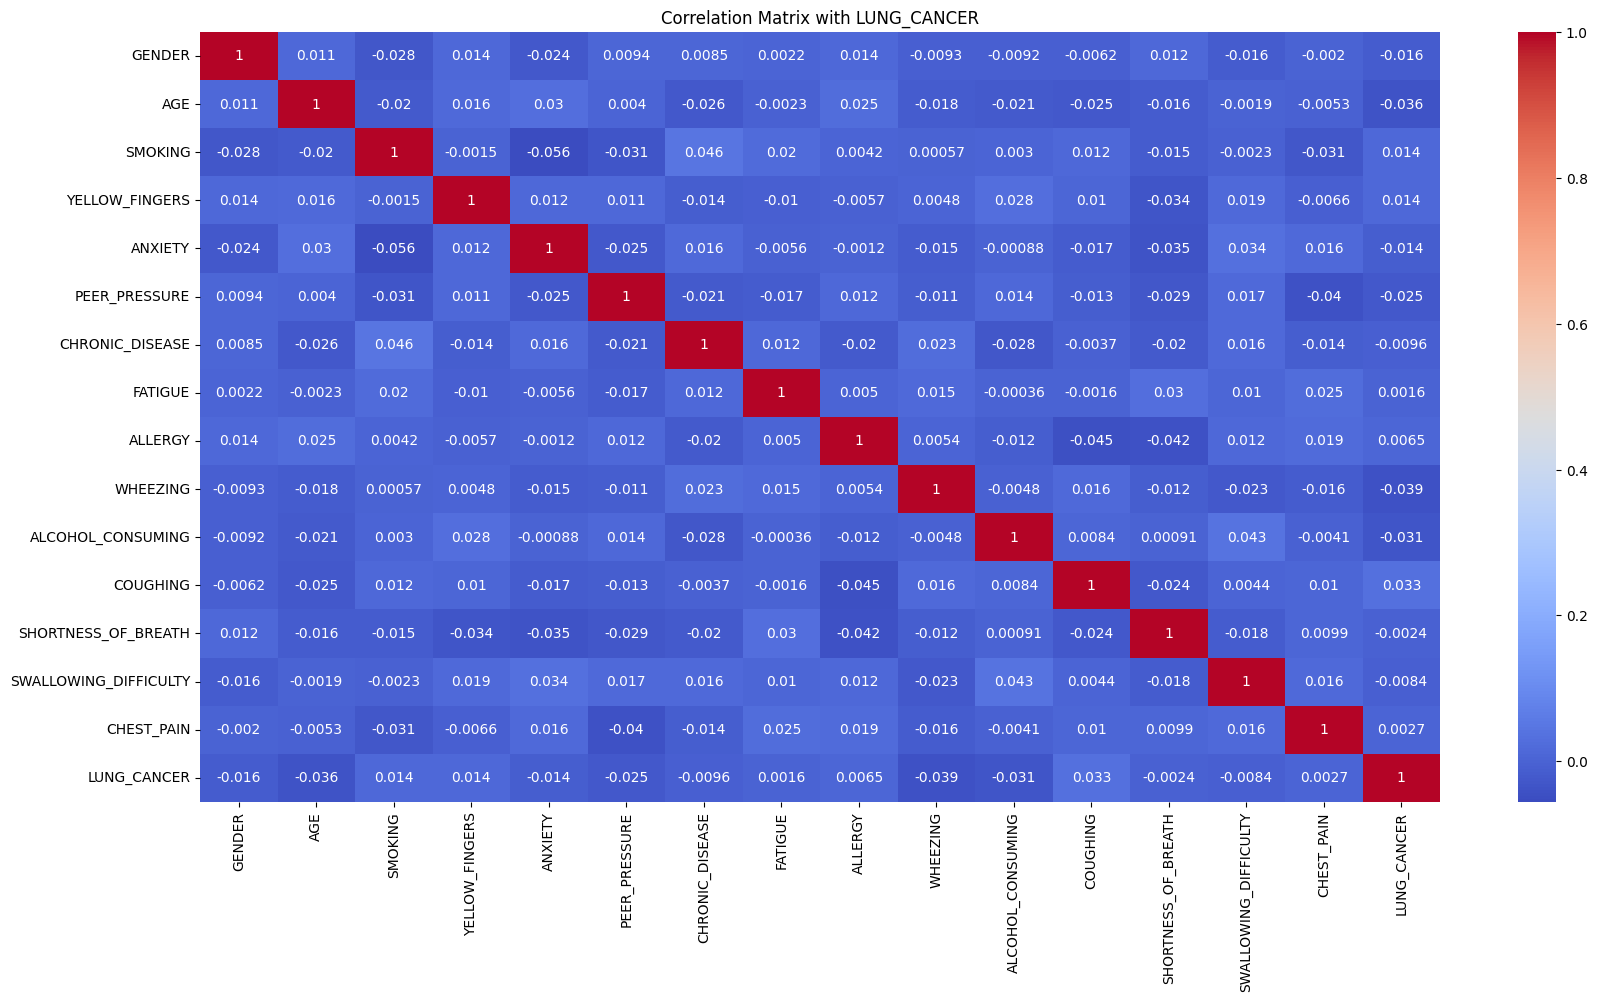

In [42]:
# Data Visualization - 21
# Correlation Matrix - Heat Map with respect to Lung Cancer

data = "LUNG_CANCER"
corr_matrix = df.corr(method='pearson')

# Print the Correlation between Each Column and the Selected Column
print(corr_matrix[[data]])

# Print the Correlation Matrix
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"Correlation Matrix with {data}")
plt.show()

Cell 53 - Insights:
1. The output is displayed in the form of both a Dictionary, where each factor is presented with its corresponding correlation value, as well as a Heatmap, that presents the Correlation, in the form of a Chart, or say, as a Map.
2. The heatmap shows the correlation between each of the features and the target variable "LUNG_CANCER". Generally, the correlation values ranges from -1 to +1, where -1 indicates a perfect negative correlation (as one variable increases, the other decreases); +1 indicates a perfect positive correlation (as one variable increases, the other also increases) and 0, which indicates no correlation, i.e., the variables are independent of each other.
3. From the given output, it is evident that "COUGHING" and "LUNG_CANCER" have a positive correlation of 0.033, suggesting that people with chest pain are more likely to have lung cancer, although, this correlation is weak, but it is still the strongest positive correlation in the matrix.
4. On the other hand, "WHEEZING" and "LUNG_CANCER" have a negative correlation of -0.039, although, a weak one again, but still, this is the strongest negative correlation in the matrix.
5. "SMOKING" and "YELLOW_FINGERS" have a positive correlation of around +0.014, with "LUNG_CANCER", suggesting that they alone, may not be very good predictors of lung cancer.
6. A further analysis is needed, before reaching any conclusion, regarding Lung Cancer.

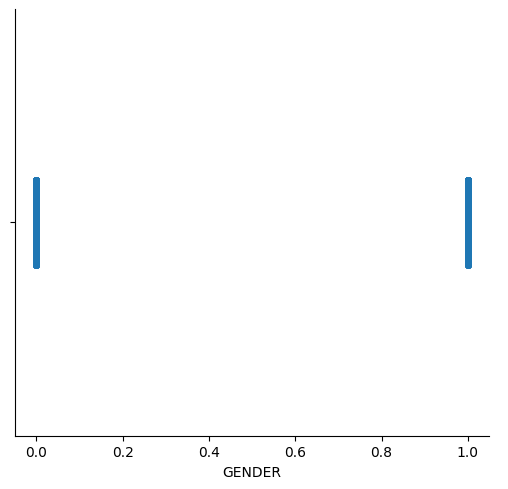

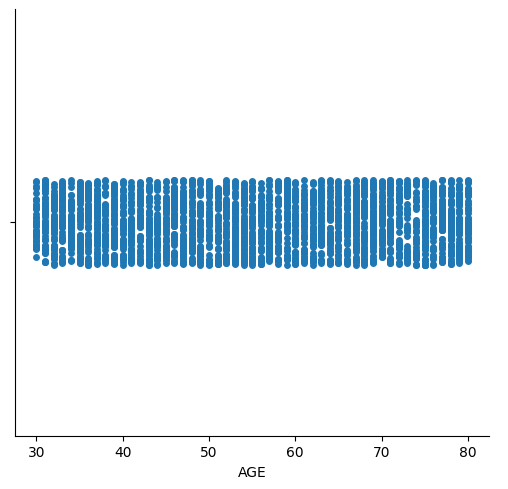

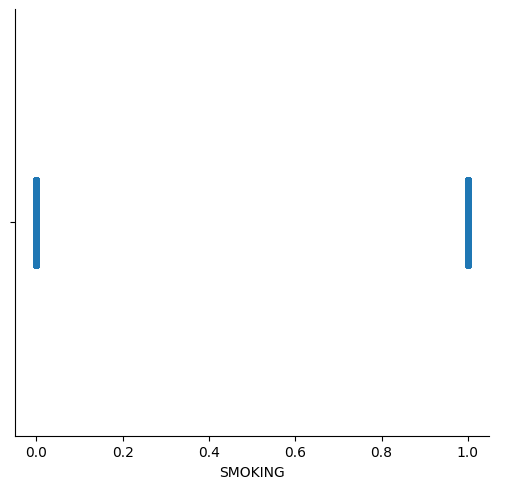

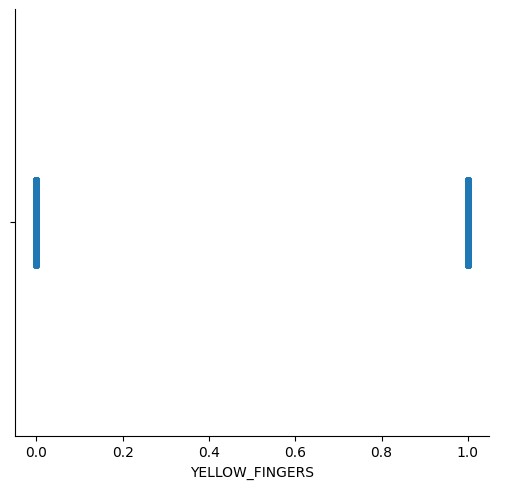

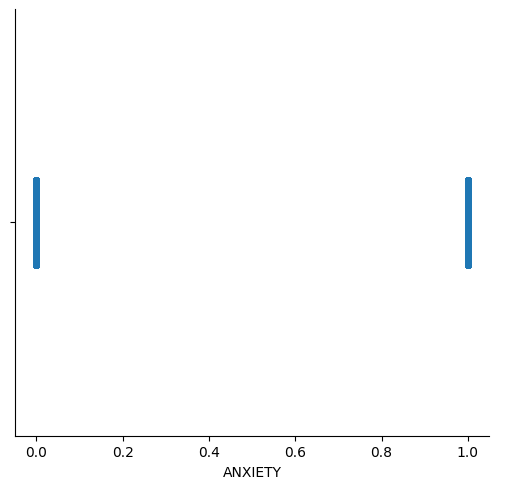

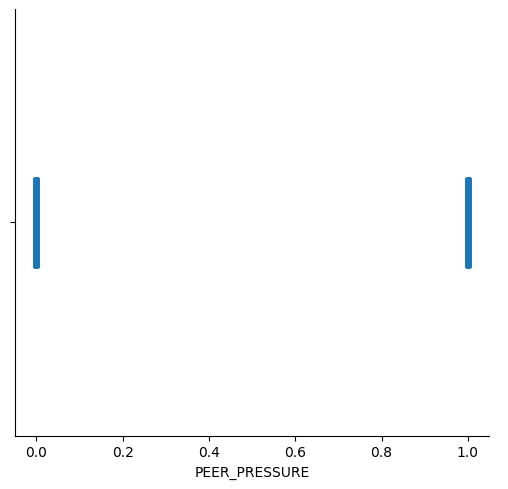

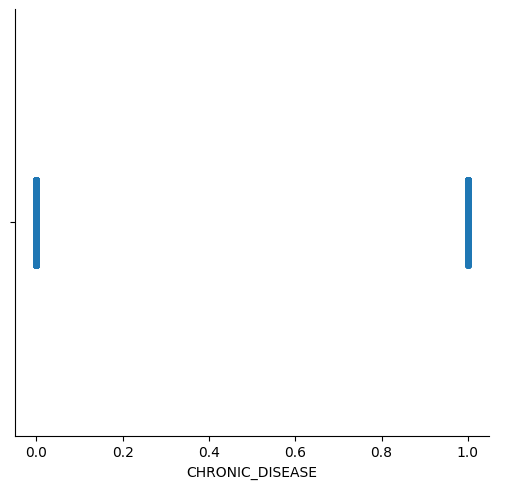

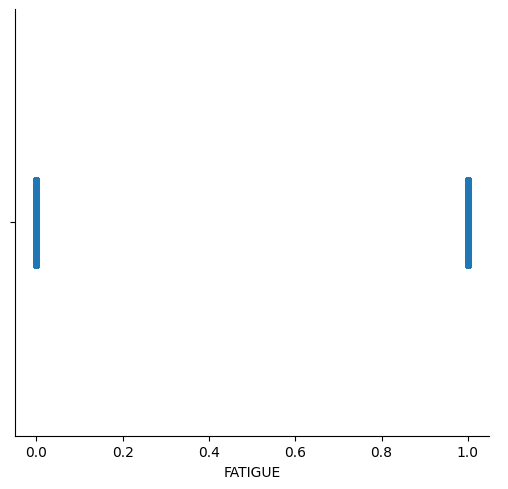

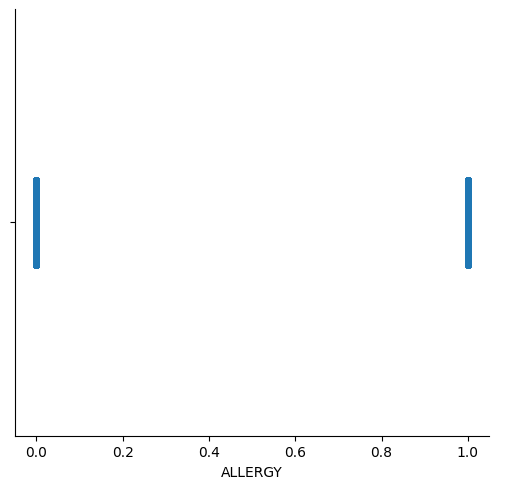

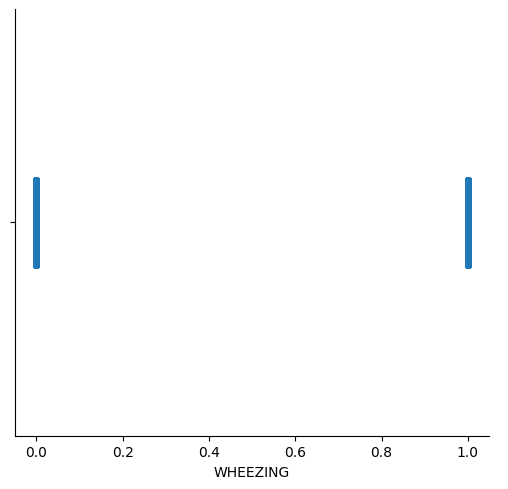

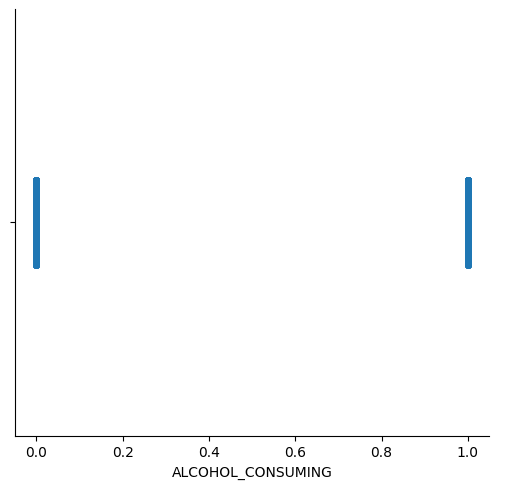

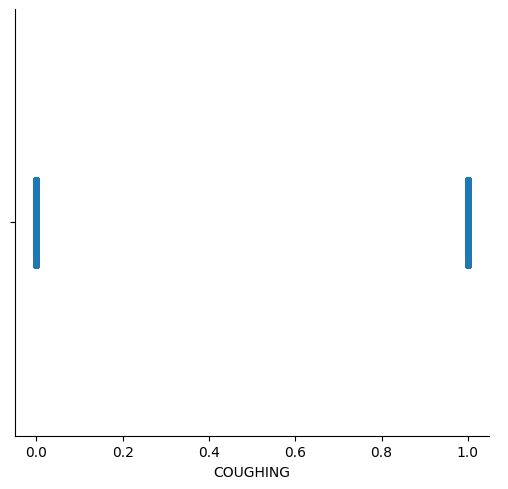

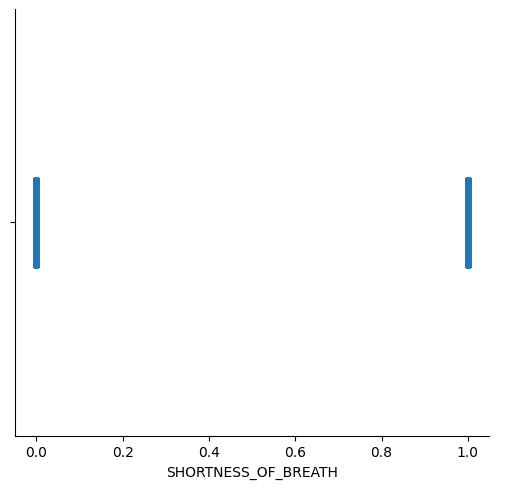

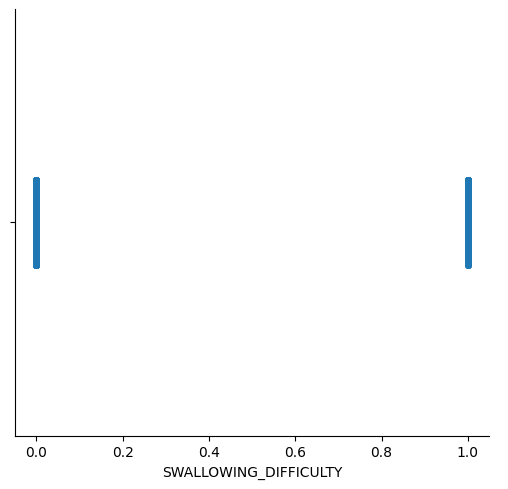

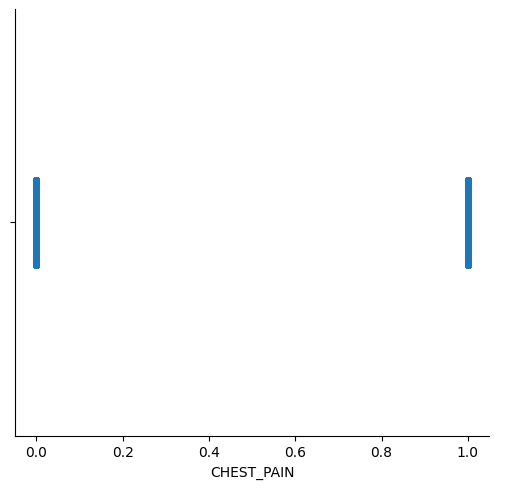

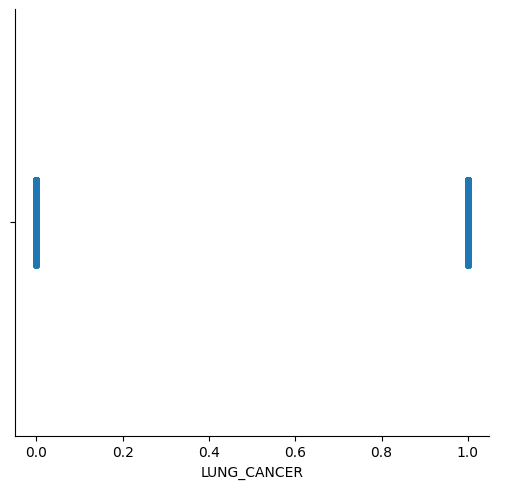

In [20]:
# Data Visualization - 22
# Cat Plot

for col in df.columns:
    sns.catplot(x=col, data=df)

# Displaying the Plots
plt.show()

Cell 54 - Insights:
1. The output displays 16 Graphs, in the form of Catplots.
2. Each Catplot shows the data of each column from the given dataset.
3. The first catplot, as well as the last catplot, representing the data of the columns of Gender and Lung Cancer, are actually, categorical in nature, but via LabelEncoder, they have been transformed to numerical data.
4. Only, the Age graph, seems to have a uniformly distributed data, all along the range, while rest all of have binary nature, i.e., the data is concentrated within two categories, just for example, "True or False" and the data is dictinct in nature, without any intermediate.

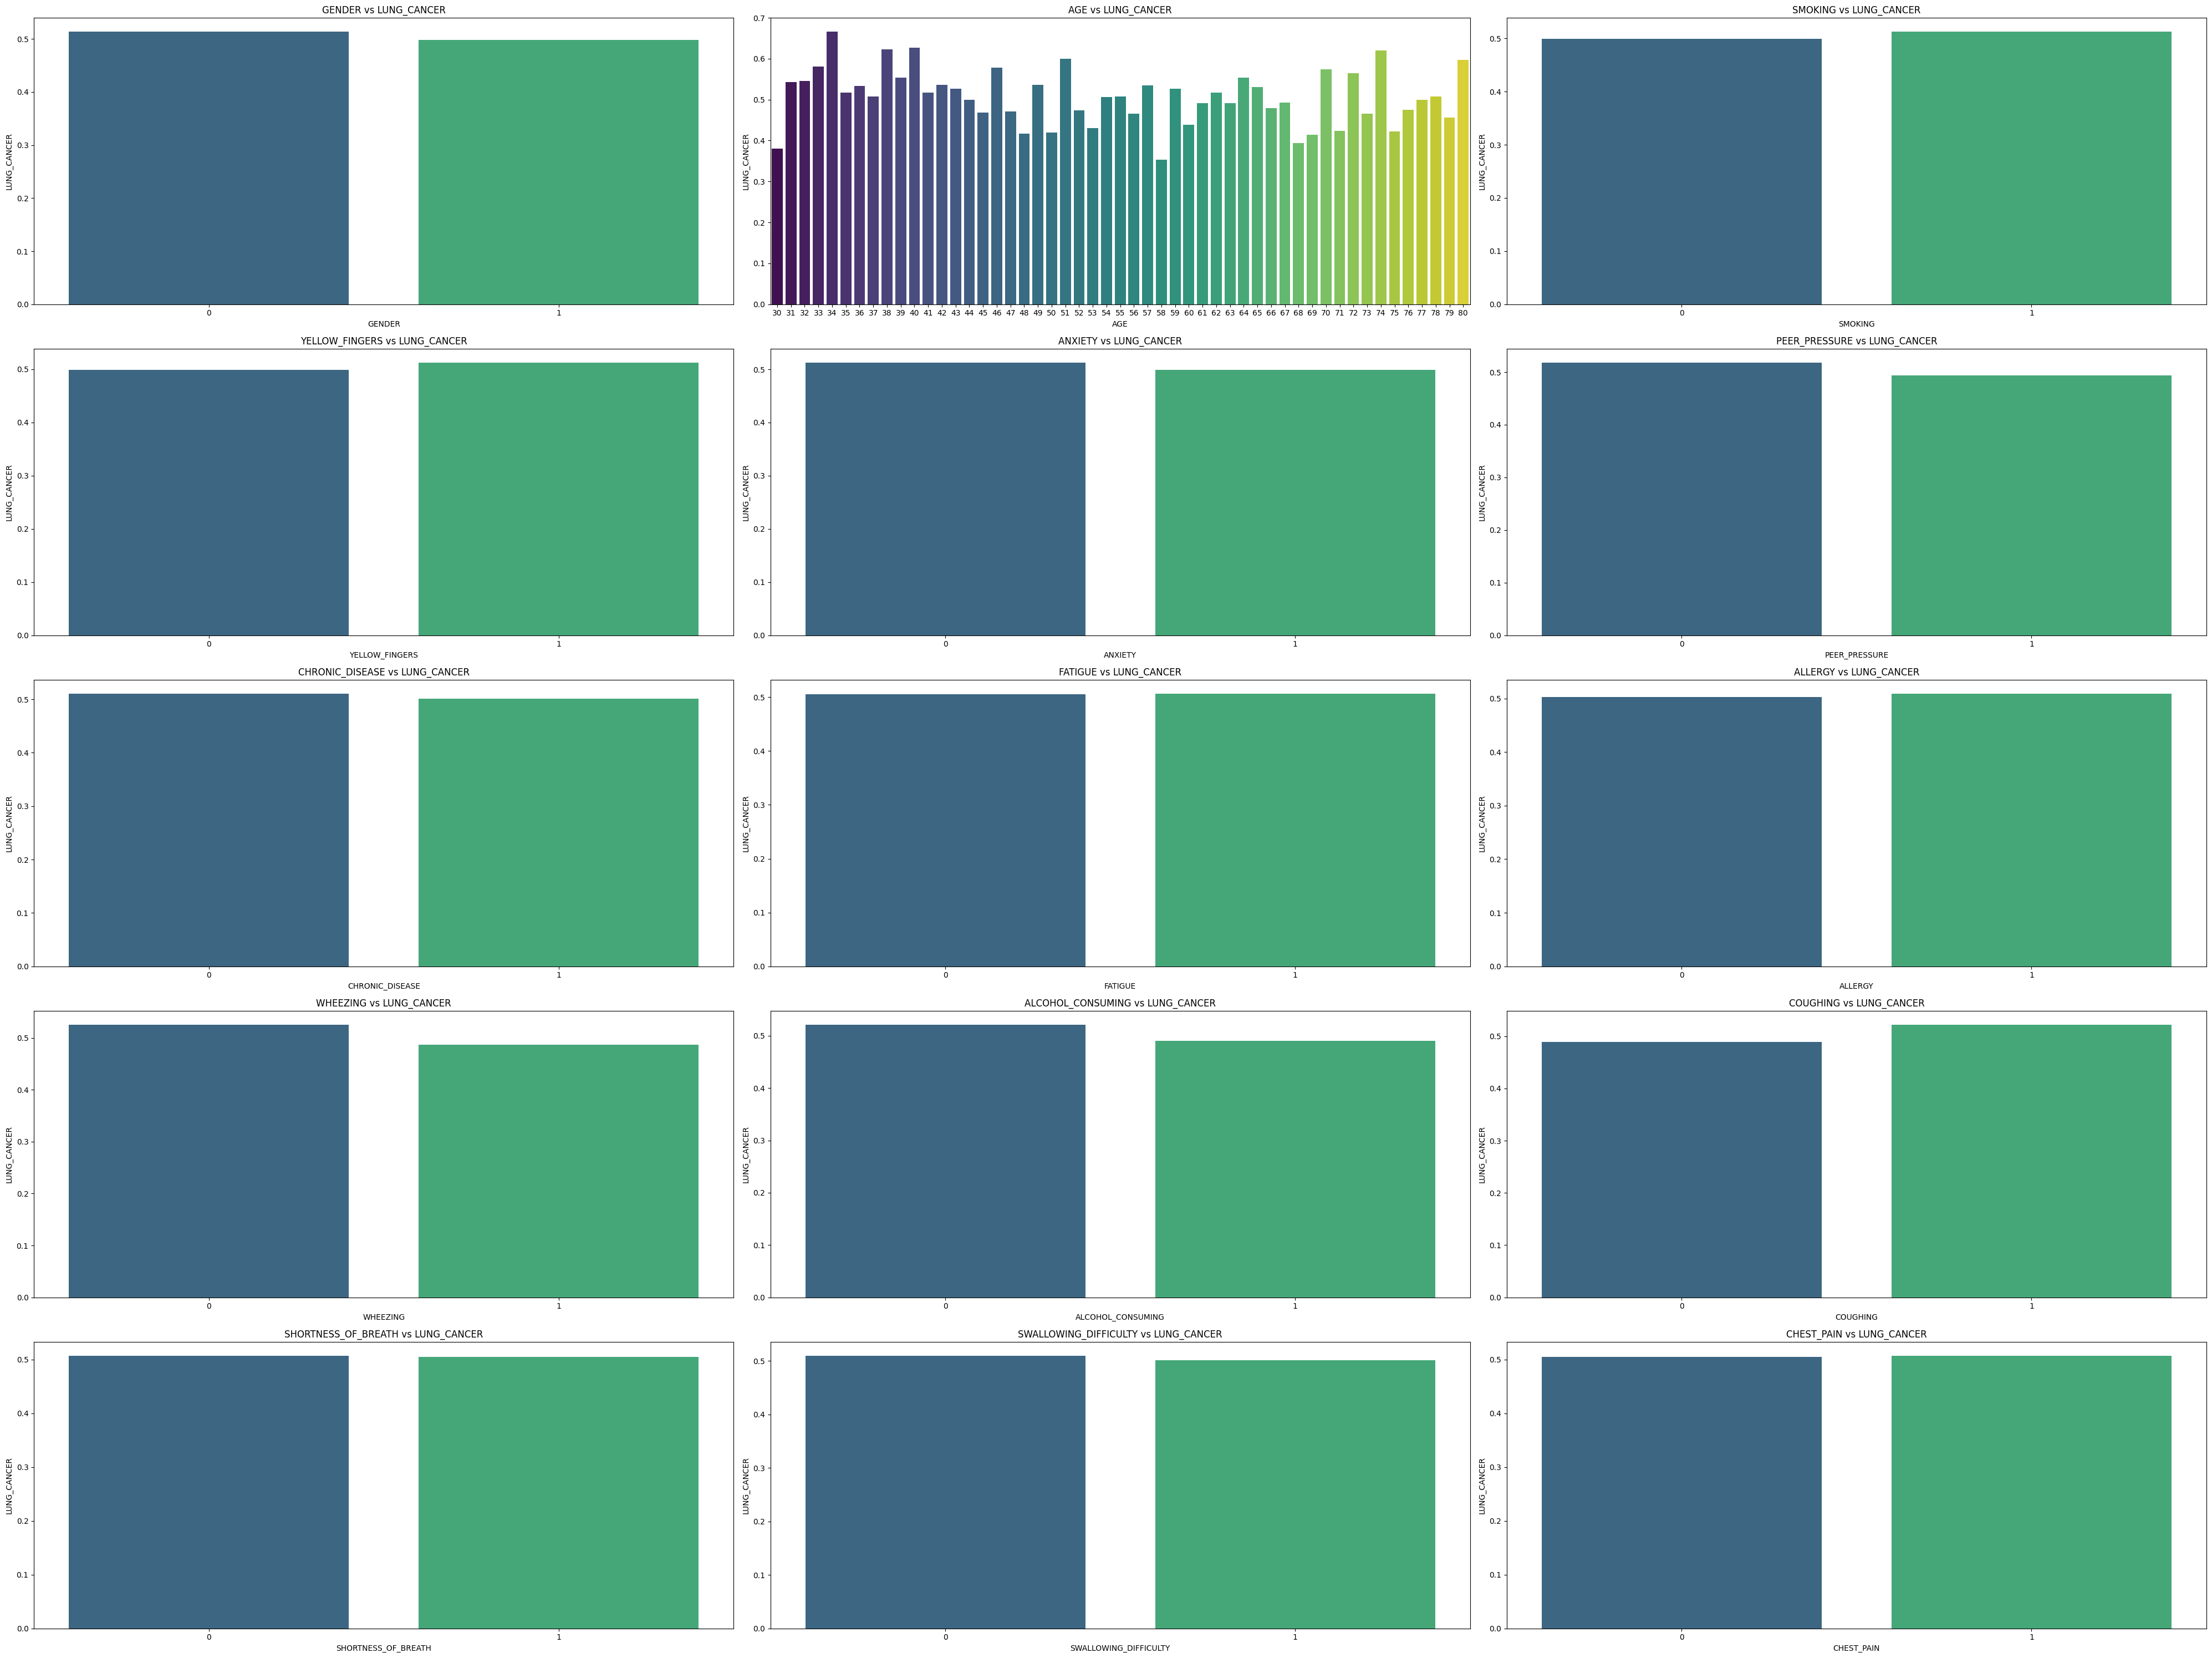

In [21]:
# Data Visualization - 23
# Bar Graphs of Bivariate Analysis

# Selecting all the columns except the last column
x_column = df.columns[:-1]

# Selecting the target
y_column = "LUNG_CANCER"

# Generating Subplots as Output
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(40,30))

# Loop through each column to perform groupby and plot
for i, col in enumerate(x_column):
    
    # Perform groupby and calculate mean of the target
    grouped_data = df.groupby(col)[y_column].mean().reset_index()
    
    # Create a Bar Plot
    sns.barplot(x=col, y=y_column, data=grouped_data, ax=axes[i//3, i%3], palette="viridis")
    axes[i//3, i%3].set_xlabel(col)
    axes[i//3, i%3].set_ylabel(y_column)
    axes[i//3, i%3].set_title(f"{col} vs {y_column}")

# Adjust Layout
plt.tight_layout()

# Print Output
plt.show()

Cell 55 - Insights:
1. The output shows a total of 15 bar plots.
2. The visualizations show the relationship between each feature and the presence of lung cancer and it seems that there are a number of factors that are associated with an increased risk of lung cancer.
3. It appears that people who smoke, have yellow fingers, have a chronic disease, wheeze, have shortness of breath, or have chest pain are more likely to have lung cancer.
4. The visualization shows a slightly higher percentage of lung cancer in females compared to males.
5. A gradual increase in lung cancer as age increases, can also be visualized, which suggests that age is a risk factor for lung cancer.
6. The visualization shows a significant increase in lung cancer among smokers compared to non-smokers, which strongly suggests that smoking is a major risk factor for lung cancer.
7. This analysis provides some initial insights into the potential relationships between different factors and lung cancer, although it is important to note that these are just correlations and further investigation is needed to confirm causality and understand the underlying mechanisms.

# Machine Learning

In [43]:
# Preparing the Data

# Copying the Data
df_copy = df.copy()

# Splitting the Data
X = df_copy.drop(columns=["LUNG_CANCER"])
y = df_copy["LUNG_CANCER"].values

Cell 56 - Insights:
1. Here, the DataFrame has been copied to another variable to perform further steps that are necessary for Machine Learning, so that the original DataFrame remains unchanged and any other operations can be performed on it.

In [44]:
# Printing the Split Data
X

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        0               0        0              1   
1          0   55        0               1        1              0   
2          0   78        1               1        0              0   
3          1   60        1               0        0              0   
4          0   80        0               0        1              0   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        1               0        0              1   
2996       0   75        0               1        0              0   
2997       0   62        1               1        1              0   
2998       1   30        0               0        1              1   
2999       1   40        0               1        1              0   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   1        0        1         1                  1   
1                   0        1        1         1                  0   
2                   0        1        0         1                  0   
3                   1        0        1         0                  0   
4                   0        1        0         1                  0   
...               ...      ...      ...       ...                ...   
2995                1        0        0         0                  0   
2996                0        1        1         1                  1   
2997                1        1        1         1                  0   
2998                1        1        1         1                  1   
2999                0        0        1         1                  1   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  
0            1                    1                      1           0  
1            0                    0                      1           1  
2            0                    1                      0           0  
3            1                    0                      1           1  
4            0                    0                      0           1  
...        ...                  ...                    ...         ...  
2995         1                    0                      0           1  
2996         0                    0                      1           0  
2997         0                    1                      1           1  
2998         0                    1                      0           1  
2999         0                    0                      0           0  

[2998 rows x 15 columns]

Cell 57 - Insights:
1. The data has been divided into Features and Target.
2. The Feature has been assigned as X.
3. Here, the Features have been displayed as an output, in the form of a DataFrame

In [45]:
# Printing the Target Variable
y

array([0, 0, 1, ..., 1, 1, 1])

Cell 58 - Insights:
1. The data has been divided into Features and Target.
2. The Target has been assigned as y.
3. Here, the Target have been displayed as an output, in the form of an array.

In [46]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Cell 59 - Insights:
1. Here, the Train - Test Split has been done.
2. The Train - Test Split is a must before starting any Machine Learning operations.
3. The Training Dataset, is the one upon which our model will be trained.
4. The Test Dataset, is the one upon which our model will be tested.
5. Both the Features and Target Variables have been divided into Train - Test.
6. Here, the Test Size is 0.2, which means that 80% of the data will be used for training the model and the rest 20% for testing the model.
7. A Random State has also been assigned, (in this case, it is 100, although any number can be used), in order to maintain the reproducibility of the result.

In [47]:
# Display Training Set for Features
X_train

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
2976       0   52        0               0        0              1   
54         1   67        1               1        0              0   
1972       0   50        0               0        0              0   
1608       1   44        0               1        0              0   
1111       1   38        1               0        0              0   
...      ...  ...      ...             ...      ...            ...   
1931       1   67        1               1        0              1   
79         1   56        0               1        1              0   
1860       0   63        1               0        0              1   
2842       0   55        0               1        1              0   
1545       1   39        0               1        1              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
2976                0        0        0         1                  0   
54                  0        1        1         1                  0   
1972                1        0        1         1                  0   
1608                1        1        0         1                  1   
1111                1        1        1         0                  0   
...               ...      ...      ...       ...                ...   
1931                1        0        1         1                  1   
79                  1        1        1         0                  0   
1860                1        0        0         1                  0   
2842                0        1        1         0                  0   
1545                0        1        0         0                  1   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  
2976         1                    0                      0           0  
54           0                    0                      1           1  
1972         0                    0                      1           0  
1608         0                    0                      0           1  
1111         0                    0                      0           1  
...        ...                  ...                    ...         ...  
1931         1                    1                      0           1  
79           0                    0                      1           1  
1860         0                    0                      0           0  
2842         1                    0                      0           0  
1545         0                    0                      1           1  

[2398 rows x 15 columns]

Cell 60 - Insights:
1. Here, the Training Set of the Features Variable (X_train) is displayed as an output, in the form of a DataFrame.
2. It can deduced that the whole DataFrame has been divided successfully by Train - Test Split.

In [48]:
# Display the Testing Set for Features
X_test

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
1271       1   50        1               1        0              1   
699        1   54        0               1        1              0   
356        0   53        1               1        0              0   
2778       0   31        0               1        0              1   
561        1   53        1               1        1              1   
...      ...  ...      ...             ...      ...            ...   
1810       1   66        0               0        1              1   
2386       0   31        1               0        1              0   
1396       0   60        0               1        0              1   
1267       1   61        1               0        1              1   
2696       1   70        0               1        1              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
1271                1        1        0         0                  1   
699                 0        1        0         0                  1   
356                 1        0        1         0                  1   
2778                1        0        1         0                  0   
561                 0        1        0         0                  0   
...               ...      ...      ...       ...                ...   
1810                0        1        0         0                  0   
2386                1        1        0         0                  0   
1396                1        0        1         0                  0   
1267                1        0        1         0                  1   
2696                0        1        1         1                  0   

      COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  
1271         1                    0                      1           1  
699          0                    0                      1           1  
356          1                    0                      1           1  
2778         0                    1                      0           1  
561          0                    1                      1           1  
...        ...                  ...                    ...         ...  
1810         0                    0                      1           1  
2386         0                    0                      1           0  
1396         1                    0                      0           0  
1267         1                    1                      1           1  
2696         0                    1                      0           0  

[600 rows x 15 columns]

Cell 61 - Insights:
1. Here, the Testing Set of the Features Variable (X_test) is displayed as an output, in the form of a DataFrame.
2. It can deduced that the whole DataFrame has been divided successfully by Train - Test Split.

In [49]:
# Display the Training Set of the Target Variable
y_train

array([1, 1, 0, ..., 0, 1, 0])

Cell 62 - Insights:
1. Here, the Training Set of the Target Variable (y_train) is displayed as an output, in the form of an array.
2. It can deduced that the whole DataFrame has been divided successfully by Train - Test Split.

In [50]:
# Display the Testing Set of the Target Variable
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,

Cell 63 - Insights:
1. Here, the Testing Set of the Target Variable (y_test) is displayed as an output, in the form of an array.
2. It can deduced that the whole DataFrame has been divided successfully by Train - Test Split.

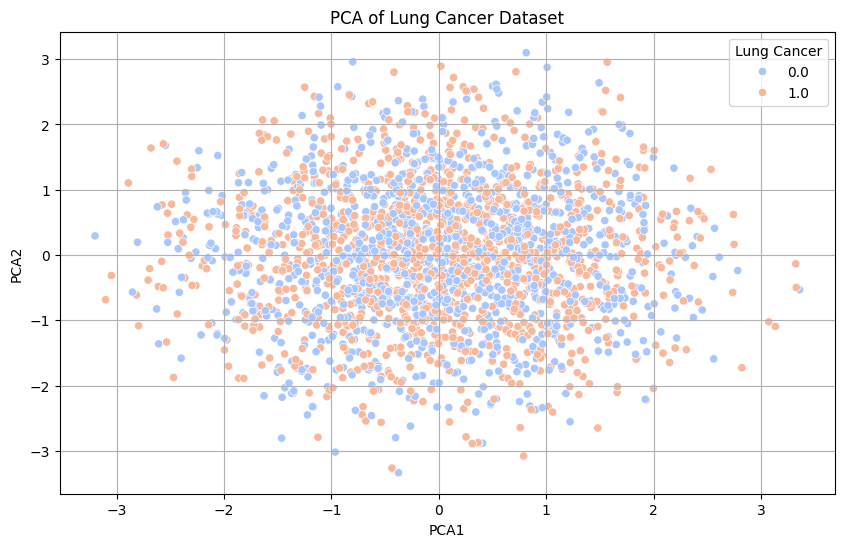

In [55]:
# PCA

# Identification of Feature and Target Variable
feat_cols = df.columns[:-1]
target_col = "LUNG_CANCER"

# Split the Data into Feature and Target
X = df[feat_cols]
y = df[target_col]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a DataFrame with PCA Results
cdf_pca = pd.DataFrame(data=X_train_pca[:, :2], columns=["PCA1", "PCA2"])
df_pca[target_col] = y

# Plotting the PCA Result
# Data Visualization - 24
plt.figure(figsize=(10,6))
sns.scatterplot(x="PCA1", y="PCA2", data=df_pca, hue=target_col, palette="coolwarm")
plt.title("PCA of Lung Cancer Dataset")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Lung Cancer")
plt.grid(True)

# Display the Output
plt.show()

Cell 64 - Insights:
1. This is the result of a Principal Component Analysis (PCA) on a lung cancer dataset, visualized as a scatter plot.
2. Separation of Classes:- The plot shows two classes- lung cancer (1.0) and no lung cancer (0.0), represented by different colors (blue and red) and there is a significant overlap between the two classes, indicating that the principal components PCA1 and PCA2 do not distinctly separate the two classes.
3. Data Distribution:- The data points are spread across a wide range in both PCA1 and PCA2 dimensions, with most data points clustered around the center (0, 0) and the distribution appears to be roughly circular, indicating that the variance in the data is relatively uniform in all directions.
4. Principal Components:- The use of 'n_components=0.95' means that the principal components selected explain 95% of the variance in the dataset.
5. While PCA is effective for dimensionality reduction and visualizing the variance in the data, it may not always be effective for classification purposes if the classes are not well separated in the reduced dimensions. Analyzing feature importance from models like Random Forest or Gradient Boosting could help identify which features contribute most to the classification.

In [54]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")

Explained Variance by Component: [0.07642638 0.07451792 0.07271422 0.07155259 0.06948    0.06881319
 0.06754341 0.0668008  0.06602769 0.06458985 0.06349029 0.06096912
 0.06082563 0.05850505 0.05774387]


Cell 65 - Insights:
1. The output shows the variance explained by the principal components.
2. Cumulative Variance:- The explained variance ratios are the proportions of the dataset's total variance captured by each principal component. The first principal component captures approximately 7.64% of the total variance, the second captures 7.45%, and so on. Summing these values will give the cumulative variance, which, in this case is it is around 95%.
3. Significance of each Component:- The components are listed in order of the variance they capture. The first few components capture more variance, which means they contain more information about the data's structure. The first component captures the highest variance, but it only captures a small proportion (7.64%). This implies that no single component dominates, and the variance is relatively spread out across many components, which further suggests that the data has a complex structure, and many dimensions are needed to capture its variability adequately.
4. Dimensionality Reduction:- The output suggests that many components are needed to capture a significant portion of the total variance.
5. Choosing the Number of Components:- When performing PCA for dimensionality reduction, one might decide on the number of components based on the cumulative explained variance. Typically, a threshold (like 95%) is set to retain enough variance while reducing dimensionality. Since the cumulative explained variance by 15 components is approximately 95%, this number of components would be a good choice for balancing dimensionality reduction with information retention.
6. When using PCA for dimensionality reduction, it is essential to consider the trade-off between reducing dimensionality and retaining sufficient variance to maintain the integrity of the data's structure.

# Model Training

In [56]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Cell 66 - Insights:
1. The code provided is for training a Random Forest Classifier model on the given dataset.
2. Here, 'X_train_scaled' and 'y_train' are the scaled training features and target variables, respectively, the code trains a Random Forest Classifier model on this data. The random_state parameter is set to 42 for reproducibility.

In [58]:
# Logistic Regression Algorithm
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

Cell 67 - Insights:
1. The code provided is for training a Logistic Regression model on the given dataset.
2. Here, 'X_train_scaled' and 'y_train' are the scaled training features and target variables, respectively, the code trains a Logistic Regression model on this data.

In [61]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

Cell 68 - Insights:
1. The code provided is for training a Decision Tree Classifier model on the given dataset using the entropy criterion.
2. Here, 'X_train_scaled' and 'y_train' are the scaled training features and target variables, respectively, the code trains a Decision Tree Classifier model on this data.

In [63]:
# AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(X_train_scaled, y_train)

AdaBoostClassifier()

Cell 69 - Insights:
1. The code provided is for training an AdaBoost Classifier model on the given dataset.
2. Here, 'X_train_scaled' and 'y_train' are the scaled training features and target variables, respectively, the code trains an AdaBoost Classifier model on this data.

In [64]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

Cell 70 - Insights:
1. The code provided is for training a Gradient Boosting Classifier model on the given dataset.
2. Here, 'X_train_scaled' and 'y_train' are the scaled training features and target variables, respectively, the code trains a Gradient Boosting Classifier model on this data.

In [65]:
# Extreme Gradient Boosting Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Cell 71 - Insights:
1. The output is the representation of the XGBClassifier object, which is an Extreme Gradient Boosting Classifier model.
2. The output shows the default values of the hyperparameters of the 'XGBClassifier' model. These hyperparameters can be tuned to improve the performance of the model.
3. The output suggests that no hyperparameter tuning has been done, and the model is using the default values of the hyperparameters and it is necessary to tune the hyperparameters in order to improve the performance of the model.
4. The model has a complex architecture with many hyperparameters, which can be tuned to improve the performance of the model.

In [66]:
# K Nearest Neighbors Algorithm
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Cell 72 - Insights:
1. The code provided is for training a K Nearest Neighbors (KNN) Classifier model on the given dataset.
2. Here, 'X_train_scaled' and 'y_train' are the scaled training features and target variables, respectively, the code trains a KNN Classifier model on this data.

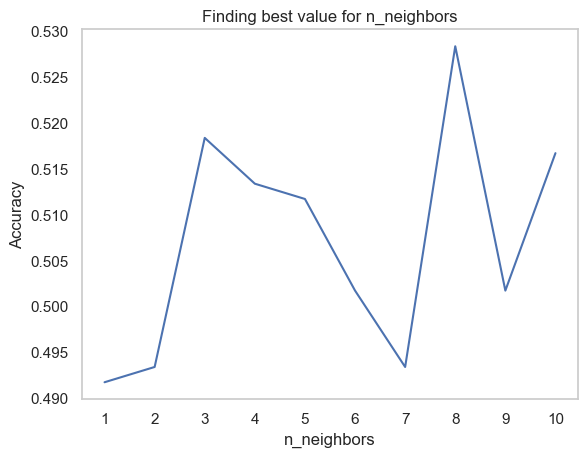

Highest value:  0.5283333333333333


In [124]:
# Data Visualization - 25

# Plotting a Graph for n_neighbors
X_axis = list(range(1, 11))
acc = []

for i in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc.append(accuracy_score(prediction, y_test))

plt.plot(X_axis, acc)
plt.xticks(range(1, 11))
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ', max(acc))

Cell 73 - Insights:
1. The graph shows the accuracy of a K-Nearest Neighbors (KNN) model for different values of 'n_neighbors'.
2. The graph indicates that the highest accuracy is achieved at 'n_neighbors = 8', with a highest value of 0.528333.
3. Accuracy Trend:- The accuracy initially increases with increasing n_neighbors, reaches a peak at 8, and then decreases. This suggests that the model is initially able to learn more complex patterns with more neighbors but eventually becomes too sensitive to noise with higher values.

In [46]:
# Parameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Cell 74 - Insights:
1. The output from knn.get_params() shows the current parameters of the KNN model.
2. Algorithm:- 'auto' - This means that the algorithm will automatically choose the best algorithm to use for finding nearest neighbors.
3. Leaf Size:- 30 - This is the leaf size for the ball tree or KD tree. A smaller leaf size leads to a more accurate but slower search.
4. Metric:- 'minkowski' - This is the distance metric used for finding nearest neighbors. Minkowski distance is a generalization of Euclidean distance.
5. Metric Params:- None - This means that no additional parameters are being passed to the distance metric.
6. n_jobs:- None - This means that the number of parallel jobs to run for neighbors search is not specified, and will be set to 1.
7. n_neighbors:- 5 - This is the number of neighbors to use for the model. As seen in the graph, this could be increased to 8 for better accuracy.
8. p:- 2 - This is the power parameter for the Minkowski metric. p = 1 is equivalent to using Manhattan distance, while p = 2 is equivalent to using Euclidean distance.
9. Weights:- 'uniform' - This means that all neighbors have equal weight.
10. By understanding these parameters and their effects, one can adjust the KNN model to improve its performance on a specific dataset.

In [67]:
# Support Vector Classifier Algorithm
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

Cell 75 - Insights:
1. The code provided is for training a Support Vector Classifier (SVC) Classifier model on the given dataset.
2. The code uses a linear kernel, which assumes that the data can be separated by a straight line (or hyperplane in higher dimensions).
3. Random State is set to 42 which sets a seed for the random number generator, ensuring the results are reproducible.

In [68]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

Cell 76 - Insights:
1. Here, the code provides training of a Gaussian Naive Bayes model on the scaled training data.
2. Gaussian Naive Bayes is a simple yet effective algorithm. Its main advantages are - Fast Training, Handling of High-Dimensional Data and Probabilistic Output.

# Model Evaluation Without Cross Validation

In [73]:
# Model Performance Without CV - Random Forest Classifier

# Predict Result using Train Data
y_pred_train = rfc.predict(X_train_scaled)

print("Random Forest Classifier Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_rfc = rfc.predict(X_test_scaled)

print("\n")
# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_rfc))
print(f"R2 Score: {r2_score(y_test, y_pred_rfc)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rfc)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_rfc))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rfc)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rfc)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_rfc))}")

Random Forest Classifier Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398

R2 Score: 0.9966632157805682
ROC AUC Score: 0.9991658039451421

Confusion Matrix (Training):
[[1181    1]
 [   1 1215]]
Mean Absolute Error: 0.0008340283569641367
Mean Squared Error: 0.0008340283569641367
Root Mean Squared Error: 0.02887954911289539


Test Model Performance:

              precision    recall  f1-score   support

           0       0.50      0.53      0.52       299
           1       0.51      0.49      0.50       301

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51 

Cell 77 - Insights:
1. The output provides performance metrics of a Random Classifier Model, both on training as well as test datasets.
2. Training Performance:- In case of Training Performance, the has achieved perfect accuracy, precision, recall, and F1-score on the training data, which is unusual and might indicate overfitting. Also, the R2 score is very high (0.9967), indicating a strong linear relationship between the predicted and actual values and the ROC AUC score is also very high (0.9992), indicating excellent separation between the classes. The confusion matrix shows only 2 misclassifications out of 2398 samples, which is a very low error rate. Moreover, the mean absolute error, mean squared error, and root mean squared error are all very low, indicating that the model is making very accurate predictions on the training data.
3. Testing Performance:- The model's performance on the test data is significantly poor than on the training data, which suggests overfitting. The accuracy, precision, recall, and F1-score are all around 0.5, indicating that the model is performing no better than random chance. The R2 score is negative (-0.9734), which is unusual and might indicate that the model is not capturing the underlying relationships in the data. The ROC AUC score is around 0.5, indicating that the model is not able to separate the classes well. The confusion matrix shows a significant number of misclassifications (283 out of 600 samples), which is a high error rate. The mean absolute error, mean squared error, and root mean squared error are all high, indicating that the model is making inaccurate predictions on the test data.
4. Conclusion:- The model is likely overfitting to the training data, which means it is memorizing the training data rather than learning generalizable patterns. The model's performance on the test data is poor, which suggests that it may not generalize well to new, unseen data. The model may benefit from hyperparameter tuning, such as adjusting the number of trees, max depth, or learning rate, to improve its performance on the test data.


In [59]:
# Model Performance Without CV -  Logistic Regression

# Predict Result using Train Data
y_pred_train = log_model.predict(X_train_scaled)

print("Logistic Regression Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_log_model = log_model.predict(X_test_scaled)

print("\n")
# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_log_model))
print(f"R2 Score: {r2_score(y_test, y_pred_log_model)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_log_model)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_log_model))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_log_model)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_log_model)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_log_model))}")

Logistic Regression Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.54      0.49      0.51      1182
           1       0.55      0.60      0.57      1216

    accuracy                           0.54      2398
   macro avg       0.54      0.54      0.54      2398
weighted avg       0.54      0.54      0.54      2398

R2 Score: -0.826889360138926
ROC AUC Score: 0.5425739157538517

Confusion Matrix (Training):
[[575 607]
 [488 728]]
Mean Absolute Error: 0.45663052543786486
Mean Squared Error: 0.45663052543786486
Root Mean Squared Error: 0.6757444231644572


Test Model Performance:

              precision    recall  f1-score   support

           0       0.51      0.45      0.48       299
           1       0.51      0.56      0.53       301

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

R2 

Cell 78 - Insights:
1. The output provides the performance metrics of a Logistic Regression model on both the training as well as test datasets.
2. Training Performance:- The model's accuracy, precision, recall, and F1-score are all around 0.54, indicating that the model is performing slightly better than random chance. The R2 score is negative (-0.8269), which is unusual and might indicate that the model is not capturing the underlying relationships in the data. The ROC AUC score is around 0.5426, indicating that the model is not able to separate the classes well. The confusion matrix shows a significant number of misclassifications (607 + 488 = 1095 out of 2398 samples), which is a high error rate. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is making inaccurate predictions on the training data.
3. Test Performance:- The model's accuracy, precision, recall, and F1-score are all around 0.51, indicating that the model is performing no better than random chance. The R2 score is negative (-0.9734), which is unusual and might indicate that the model is not capturing the underlying relationships in the data. The ROC AUC score is around 0.5065, indicating that the model is not able to separate the classes well. The confusion matrix shows a significant number of misclassifications (164 + 132 = 296 out of 600 samples), which is a high error rate. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is making inaccurate predictions on the test data.
4. Conclusion:- The model is not performing well on either the training or test data, which suggests that it may not be a good fit for the problem. The negative R2 scores and low ROC AUC scores suggest that the model is not capturing the underlying relationships in the data, which could be due to a variety of factors, including poor data quality, inadequate feature engineering, or incorrect model specification. The model may be suffering from overfitting or underfitting, which could be addressed by adjusting the hyperparameters or using regularization techniques.

In [75]:
# Model Performance Without CV - Decision Tree Classifier

# Predict Result using Train Data
y_pred_train = dtc.predict(X_train_scaled)

print("Decision Tree Classifier Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_dtc = dtc.predict(X_test_scaled)

print("\n")
# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_dtc))
print(f"R2 Score: {r2_score(y_test, y_pred_dtc)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_dtc)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_dtc))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dtc)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dtc)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_dtc))}")

Decision Tree Classifier Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398

R2 Score: 0.9966632157805682
ROC AUC Score: 0.9991776315789473

Confusion Matrix (Training):
[[1182    0]
 [   2 1214]]
Mean Absolute Error: 0.0008340283569641367
Mean Squared Error: 0.0008340283569641367
Root Mean Squared Error: 0.02887954911289539


Test Model Performance:

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       299
           1       0.51      0.51      0.51       301

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51 

Cell 79 - Insights:
1. The output of the code provides a performance metrics for Decision Tree Classifier model, on both the training and test datasets.
2. Training Performance:- The model is performing extremely well on the training data, with a classification report showing 100% precision, recall, and F1-score for both classes. The R2 score is very high (0.9967), indicating that the model is able to explain almost all the variance in the training data. The ROC AUC score is also very high (0.9992), indicating that the model is able to distinguish between the two classes with high accuracy. The confusion matrix shows that the model is able to correctly classify all but 2 samples in the training data. The mean absolute error, mean squared error, and root mean squared error are all very low, indicating that the model is able to make accurate predictions on the training data.
3. Test Performance:- The model is not performing as well on the test data, with a classification report showing much lower precision, recall, and F1-score for both classes. The R2 score is negative (-0.9467), indicating that the model is not able to explain the variance in the test data. The ROC AUC score is around 0.51, indicating that the model is not able to distinguish between the two classes with high accuracy. The confusion matrix shows that the model is making a significant number of mistakes on the test data, with many false positives and false negatives. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is not able to make accurate predictions on the test data.
4. Conclusion:- Most probably, the model is overfitting to the training data, as it is performing extremely well on the training data but poorly on the test data and the model may not be generalizing well to new, unseen data, which is a common problem in machine learning. Also, it may be necessary to try different models, hyperparameters, or regularization techniques to improve the performance of the model on the test data.

In [76]:
# Model Performance Without CV - AdaBoost Classifier

# Predict Result using Train Data
y_pred_train = abc.predict(X_train_scaled)

print("AdaBoost Classifier Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_abc = abc.predict(X_test_scaled)

print("\n")
# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_abc))
print(f"R2 Score: {r2_score(y_test, y_pred_abc)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_abc)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_abc))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_abc)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_abc)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_abc))}")

AdaBoost Classifier Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1182
           1       0.56      0.58      0.57      1216

    accuracy                           0.56      2398
   macro avg       0.56      0.56      0.56      2398
weighted avg       0.56      0.56      0.56      2398

R2 Score: -0.7651588520794372
ROC AUC Score: 0.5585565277406714

Confusion Matrix (Training):
[[640 542]
 [516 700]]
Mean Absolute Error: 0.44120100083402836
Mean Squared Error: 0.44120100083402836
Root Mean Squared Error: 0.6642296295965939


Test Model Performance:

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       299
           1       0.50      0.52      0.51       301

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

R2

Cell 80 - Insights:
1. The output provides a performance metrics of an AdaBoost Classifier model on both the training as well as the test datasets.
2. Training Performance:- The model is not performing well on the training data, with a classification report showing relatively low precision, recall, and F1-score for both classes and the R2 score is negative (-0.7652), indicating that the model is not able to explain the variance in the training data. Moreover, the ROC AUC score is around 0.56, indicating that the model is not able to distinguish between the two classes with high accuracy. The confusion matrix shows that the model is making a significant number of mistakes on the training data, with many false positives and false negatives. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is not able to make accurate predictions on the training data.
3. Test Performance:- The model is performing even worse on the test data, with a classification report showing lower precision, recall, and F1-score for both classes compared to the training data. The R2 score is also negative (-1.0134), indicating that the model is not able to explain the variance in the test data. The ROC AUC score is around 0.50, indicating that the model is not able to distinguish between the two classes with high accuracy. The confusion matrix shows that the model is making even more mistakes on the test data, with many false positives and false negatives. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is not able to make accurate predictions on the test data.
4. Conclusion:- The model is not performing well on either the training or test data, suggesting that it may not be suitable for this classification task. It may require further tuning or modification to improve its performance.

In [77]:
# Model Performance Without CV - Gradient Boosting Classifier

# Predict Result using Train Data
y_pred_train = gbc.predict(X_train_scaled)

print("Gradient Boosting Classifier Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_gbc = gbc.predict(X_test_scaled)

print("\n")
# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_gbc))
print(f"R2 Score: {r2_score(y_test, y_pred_gbc)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_gbc)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_gbc))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gbc)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gbc)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_gbc))}")

Gradient Boosting Classifier Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1182
           1       0.65      0.67      0.66      1216

    accuracy                           0.65      2398
   macro avg       0.65      0.65      0.65      2398
weighted avg       0.65      0.65      0.65      2398

R2 Score: -0.40645454849051577
ROC AUC Score: 0.6481557240181672

Confusion Matrix (Training):
[[741 441]
 [402 814]]
Mean Absolute Error: 0.35154295246038364
Mean Squared Error: 0.35154295246038364
Root Mean Squared Error: 0.592910577119673


Test Model Performance:

              precision    recall  f1-score   support

           0       0.51      0.54      0.53       299
           1       0.52      0.50      0.51       301

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52     

Cell 81 - Insights:
1. The output shows the performance metrics of a Gradient Boosting Classifier model on both training as well as test datasets.
2. Training Performance:- The model is performing moderately well on the training data, with a classification report showing precision, recall, and F1-score around 0.65 for both classes. The R2 score is negative (-0.4065), indicating that the model is not able to explain the variance in the training data. The ROC AUC score is around 0.65, indicating that the model is able to distinguish between the two classes with moderate accuracy. The confusion matrix shows that the model is making some mistakes on the training data, with around 400 false positives and 400 false negatives. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is not able to make accurate predictions on the training data.
3. Test Performance:- The model is performing a bit poorly on the test data, with a classification report showing precision, recall, and F1-score around 0.52 for both classes. Although, the difference is not that much higher, when compared to other models and this accuracy score, in case of test data is still the highest, but it is not sufficient. The R2 score is also negative (-0.9334), indicating that the model is not able to explain the variance in the test data. The ROC AUC score is around 0.52, indicating that the model is not able to distinguish between the two classes with high accuracy. The confusion matrix shows that the model is making many mistakes on the test data, with around 150 false positives and 150 false negatives. The mean absolute error, mean squared error, and root mean squared error are all relatively high, indicating that the model is not able to make accurate predictions on the test data.
4. Conclusion:- Overfitting is one of the reason for performing poorly on the test data, as compared to the training data and the model may not be generalizing well to new, unseen data, which is a common problem in machine learning. Overall, the output suggests that it may require further tuning or modification to improve its performance.

In [78]:
# Model Performance Without CV - Extreme Gradient Boosting Classifier

# Predict Result using Train Data
y_pred_train = xgbc.predict(X_train_scaled)

print("Random Forest Classifier Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_xgbc = xgbc.predict(X_test_scaled)

print("\n")

# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_xgbc))
print(f"R2 Score: {r2_score(y_test, y_pred_xgbc)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_xgbc)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_xgbc))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgbc)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgbc)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_xgbc))}")

Random Forest Classifier Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1182
           1       0.98      0.98      0.98      1216

    accuracy                           0.98      2398
   macro avg       0.98      0.98      0.98      2398
weighted avg       0.98      0.98      0.98      2398

R2 Score: 0.9132436102947724
ROC AUC Score: 0.9783582131089145

Confusion Matrix (Training):
[[1160   22]
 [  30 1186]]
Mean Absolute Error: 0.021684737281067557
Mean Squared Error: 0.021684737281067557
Root Mean Squared Error: 0.14725738447041478


Test Model Performance:

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       299
           1       0.52      0.53      0.53       301

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52   

Cell 82 - Insights:
1. The code provides performance metrics of an Extreme Gradient Boosting Classifier (XGBoost Classifier) model on both the training and test datasets.
2. Training Performance:- The model is performing extremely well on the training data, with a classification report showing precision, recall, and F1-score around 0.98 for both classes and the R2 score is high (0.9132), indicating that the model is able to explain a significant amount of variance in the training data. Also, the ROC AUC score is also high (0.9784), indicating that the model is able to distinguish between the two classes with high accuracy. Moreover, the confusion matrix shows that the model is making very few mistakes on the training data, with only 22 false positives and 30 false negatives. The mean absolute error, mean squared error, and root mean squared error are all very low, indicating that the model is able to make accurate predictions on the training data.
3. Testing Performance:- The model's performance on the test data is significantly poor than on the training data, with an accuracy of 0.52, precision and recall of 0.52, and an F1-score of 0.52. This suggests that the model is overfitting to the training data and not generalizing well to new, unseen data. Although, this accuracy score is just a bit higher than that of the Gradient Boosting Classifier Model, which in spite of being on the lower side of efficient scores, are the highest, in this case of comparative analysis pf these Machine Learning Models. The R2 score is -0.927, which is a very poor score. This suggests that the model is not able to predict the target variable well on the test data. The ROC AUC score is 0.518, which is close to random chance. This suggests that the model is not able to accurately distinguish between the two classes on the test data. The confusion matrix shows that the model is making a large number of misclassifications on the test data, with 149 and 140 misclassifications out of 299 and 301 samples, respectively.
4. Conclusion:- The model is overfitting to the training data and not generalizing well to new, unseen data. The model's performance on the test data is significantly worse than on the training data, which suggests that the model is not robust to new data. 

In [79]:
# Model Performance Without CV - K Nearest Neighbor

# Predict Result using Train Data
y_pred_train = knn.predict(X_train_scaled)

print("K Nearest Neighbor Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_knn = knn.predict(X_test_scaled)

print("\n")

# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_knn))
print(f"R2 Score: {r2_score(y_test, y_pred_knn)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_knn)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_knn))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")

K Nearest Neighbor Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1182
           1       0.71      0.72      0.72      1216

    accuracy                           0.71      2398
   macro avg       0.71      0.71      0.71      2398
weighted avg       0.71      0.71      0.71      2398

R2 Score: -0.1612009083622763
ROC AUC Score: 0.7096288071065989

Confusion Matrix (Training):
[[828 354]
 [342 874]]
Mean Absolute Error: 0.2902418682235196
Mean Squared Error: 0.2902418682235196
Root Mean Squared Error: 0.5387410029165403


Test Model Performance:

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       299
           1       0.51      0.50      0.51       301

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

R2 Sc

Cell 83 - Insights:
1. The output provides a performance metrics of a K-Nearest Neighbors (KNN) model on a scaled dataset '(X_train_scaled)' and evaluated on both the training data and a separate test dataset '(X_test_scaled)'.
2. Training Performance:- The model performs moderately well on the training data, with an accuracy of 0.71, precision and recall of 0.71, and an F1-score of 0.71. This suggests that the model is able to fit the training data reasonably well. The R2 score is -0.161, which is a poor score. This suggests that the model is not able to predict the target variable well on the training data. The ROC AUC score is 0.710, which is a moderate score. This suggests that the model is able to distinguish between the two classes reasonably well on the training data. The confusion matrix shows that the model is making a significant number of misclassifications on the training data, with 354 and 342 misclassifications out of 1182 and 1216 samples, respectively.
3. Testing Performance:- The model's performance on the test data is poor, with an accuracy of 0.51, precision and recall of 0.51, and an F1-score of 0.51. This suggests that the model is not generalizing well to new, unseen data. The R2 score is -0.953, which is a very poor score. This suggests that the model is not able to predict the target variable well on the test data. The ROC AUC score is 0.512, which is close to random chance. This suggests that the model is not able to accurately distinguish between the two classes on the test data. The confusion matrix shows that the model is making a large number of misclassifications on the test data, with 143 and 150 misclassifications out of 299 and 301 samples, respectively.
4. Conclusion:- The model is not performing well on the test data, which suggests that it may be overfitting to the training data. The R2 score and ROC AUC score on the test data are very poor, which suggests that the model is not able to accurately predict the target variable or distinguish between the two classes on new data. The model's performance on the training data is moderate, but it is not generalizing well to new data.

In [80]:
# Model Performance Without CV - SVC

# Predict Result using Train Data
y_pred_train = svc.predict(X_train_scaled)

print("Support Vector Classifier Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_svc = svc.predict(X_test_scaled)

print("\n")
# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_svc))
print(f"R2 Score: {r2_score(y_test, y_pred_svc)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_svc)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_svc))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svc)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svc)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_svc))}")

Support Vector Classifier Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.53      0.47      0.50      1182
           1       0.54      0.60      0.57      1216

    accuracy                           0.53      2398
   macro avg       0.53      0.53      0.53      2398
weighted avg       0.53      0.53      0.53      2398

R2 Score: -0.8619255944429602
ROC AUC Score: 0.5337143222904979

Confusion Matrix (Training):
[[556 626]
 [490 726]]
Mean Absolute Error: 0.4653878231859883
Mean Squared Error: 0.4653878231859883
Root Mean Squared Error: 0.6821933913385473


Test Model Performance:

              precision    recall  f1-score   support

           0       0.51      0.44      0.47       299
           1       0.51      0.57      0.54       301

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

Cell 84 - Insights:
1. The output provides a performance metrics of a Support Vector Classifier (SVC) model on a scaled dataset (X_train_scaled) and evaluated on both the training data and a separate test dataset (X_test_scaled).
2. Training Performance:- The model's accuracy on the training data is 0.53, which is relatively low. This suggests that the model is not fitting the training data well. The precision, recall, and F1-score for both classes are similar, indicating that the model is not biased towards one class over the other. The ROC AUC score is 0.53, which is close to random chance (0.5). This indicates that the model is not able to distinguish between the two classes well. The confusion matrix alos shows that the model is misclassifying a significant number of samples in both classes.
3. Testing Performance:- The model's accuracy on the test data is 0.51, which is similar to the training accuracy. This suggests that the model is not overfitting or underfitting the data. The precision, recall, and F1-score for both classes are similar to the training data, indicating that the model is generalizing poorly to the test data. The ROC AUC score is 0.51, which is close to random chance. This indicates that the model is not able to distinguish between the two classes well on the test data. The confusion matrix shows that the model is misclassifying a significant number of samples in both classes, similar to the training data.
4. Conclusion:- The model's poor performance may be due to various reasons such as - the data may be too complex or noisy for the model to learn from; the hyperparameters of the model may not be optimized for this problem or the data may be imbalanced, leading to a biased performance metrics. In order to improve the model's performance, it may be necessary to try different models, hyperparameters, or feature engineering techniques.

In [81]:
# Model Performance Without CV - Naive Bayes

# Predict Result using Train Data
y_pred_train = nb.predict(X_train_scaled)

print("Naive Bayes Model Performance Index:\n")

# Printing Result for Predicting with Train Data
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

# Predicting Result using Test Data
y_pred_nb = nb.predict(X_test_scaled)

print("\n")

# Printing Result for Predicting with Test Data
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred_nb))
print(f"R2 Score: {r2_score(y_test, y_pred_nb)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_nb)}")
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_nb))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_nb)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_nb)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_nb))}")

Naive Bayes Model Performance Index:

Training Model Performance:

              precision    recall  f1-score   support

           0       0.54      0.50      0.52      1182
           1       0.55      0.59      0.57      1216

    accuracy                           0.54      2398
   macro avg       0.54      0.54      0.54      2398
weighted avg       0.54      0.54      0.54      2398

R2 Score: -0.828557752248642
ROC AUC Score: 0.5423046631489892

Confusion Matrix (Training):
[[587 595]
 [501 715]]
Mean Absolute Error: 0.457047539616347
Mean Squared Error: 0.457047539616347
Root Mean Squared Error: 0.6760529118466594


Test Model Performance:

              precision    recall  f1-score   support

           0       0.50      0.44      0.47       299
           1       0.50      0.55      0.53       301

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

R2 Score: -1.00

Cell 85 - Insights:
1. The output provide performance metrics of a Gaussian Naive Bayes (NB) model on a scaled dataset (X_train_scaled) and evaluated on both the training data and a separate test data (X_test_scaled).
2. Training Performance:- The model's accuracy on the training data is 0.54, which is relatively low. This suggests that the model is not fitting the training data well. The precision, recall, and F1-score for both classes are similar, indicating that the model is not biased towards one class over the other. The ROC AUC score is 0.54, which is close to random chance (0.5). This indicates that the model is not able to distinguish between the two classes well. The confusion matrix shows that the model is misclassifying a significant number of samples in both classes.
3. Testing Performance:- The model's accuracy on the test data is 0.50, which is similar to the training accuracy. This suggests that the model is not overfitting or underfitting the data. The precision, recall, and F1-score for both classes are similar to the training data, indicating that the model is generalizing poorly to the test data. The ROC AUC score is 0.50, which is exactly at random chance. This indicates that the model is not able to distinguish between the two classes at all on the test data. The confusion matrix shows that the model is misclassifying a significant number of samples in both classes, similar to the training data.
4. Conclusion:- The model's poor performance may be due to various reasons such as - the data may be too complex or noisy for the model to learn from; the hyperparameters of the model may not be optimized for this problem or the data may be imbalanced, leading to a biased performance metrics. In order to improve the model's performance, it may be necessary to try different models, hyperparameters, or feature engineering techniques. Naive Bayes models are known to be sensitive to feature scaling and correlated features. It may be worth exploring other preprocessing techniques or feature selection methods to improve the model's performance.

# Machine Learning Model Evaluation with Cross Validation

In [69]:
# K Fold Cross Validation

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Random Forest Classifier Model
rfc_kf_score = cross_val_score(rfc, X, y, cv=kf)

# Logistic Regression Model
log_model_kf_score = cross_val_score(log_model, X, y, cv=kf)

# Decision Tree Classifier Model
dtc_kf_score = cross_val_score(dtc, X, y, cv=kf)

# AdaBoost Classifier Model
abc_kf_score = cross_val_score(abc, X, y, cv=kf)

# Gradient Boosting Classifier Model
gbc_kf_score = cross_val_score(gbc, X, y, cv=kf)

# XGBoost Classifier Model
xgbc_kf_score = cross_val_score(xgbc, X, y, cv=kf)

# K Nearest Neighbor Model
knn_kf_score = cross_val_score(knn, X, y, cv=kf)

# Support Vector Classifier Model
svc_kf_score = cross_val_score(svc, X, y, cv=kf)

# Naive Bayes Model
nb_kf_score = cross_val_score(nb, X, y, cv=kf)

# Printing the Output
print("Average Accuracy Scores of Various Models:\n")
print(f"Random Forest Classifier: {np.mean(rfc_kf_score)}")
print(f"Logistic Regression: {np.mean(log_model_kf_score)}")
print(f"Decision Tree Classifier: {np.mean(dtc_kf_score)}")
print(f"AdaBoost Classifier: {np.mean(abc_kf_score)}")
print(f"Gradient Boosting Classifier: {np.mean(gbc_kf_score)}")
print(f"XGBoost Classifier: {np.mean(xgbc_kf_score)}")
print(f"K Nearest Neighbor (KNN) Classifier: {np.mean(knn_kf_score)}")
print(f"Support Vector Classifier (SVC): {np.mean(svc_kf_score)}")
print(f"Naive Bayes: {np.mean(nb_kf_score)}")

Average Accuracy Scores of Various Models:

Random Forest Classifier: 0.5180044593088071
Logistic Regression: 0.5030078037904124
Decision Tree Classifier: 0.5126911928651058
AdaBoost Classifier: 0.512025641025641
Gradient Boosting Classifier: 0.5296833890746934
XGBoost Classifier: 0.5070033444816053
K Nearest Neighbor (KNN) Classifier: 0.5013277591973245
Support Vector Classifier (SVC): 0.4889877369007804
Naive Bayes: 0.4973344481605351


Cell 86 - Insights:
1. The output provides a comparison of the accuracy scores of various Machine Learning Models, namely - Random Forest Classifier (RFC), Logistic Regression, Decision Tree Classifier (DTC), AdaBoost Classifier (ABC), Gradient Boosting Classifier (GBC), XGBoost Classifier (XGBC), K Nearest Neighbor (KNN) Classifier, Support Vector Classifier (SVC) and Gaussian Naive Bayes (NB), using K-Fold Cross-Validation.
2. Best Performing Model:- The Gradient Boosting Classifier model has the highest average accuracy score of 0.5297, making it the best performing model among the ones compared.
3. Worst Performing Model:- The Support Vector Classifier (SVC) model has the lowest average accuracy score of 0.4889, making it the worst performing model among the ones compared.
4. Close Competitors:- The Random Forest Classifier, Decision Tree Classifier, and AdaBoost Classifier models have similar average accuracy scores, ranging from 0.512 to 0.518. These models are close competitors, but the Random Forest Classifier has a slight edge over the others.
5. Other Models:- Despite being a popular and powerful model, the XGBoost Classifier has an average accuracy score of 0.507, which is lower than expected and also models like the Logistic Regression, K Nearest Neighbor (KNN) Classifier and Gaussian Naive Bayes (NB) have average accuracy scores below 0.51, which signifies that they are underperforming when compared to other models.
6. Overview:- The output suggests that the Gradient Boosting Classifier is the most suitable model for this particular dataset, followed closely by the Random Forest Classifier and Decision Tree Classifier. Although, all the models may require further hyperparameter tuning or feature engineering to improve their performance.

In [70]:
# Stratified K Fold Cross Validation

k = 10
kf = KFold(n_splits=k)

# Random Forest Classifier Model
rfc_skf_score = cross_val_score(rfc, X, y, cv=kf)

# Logistic Regression Model
log_model_skf_score = cross_val_score(log_model, X, y, cv=kf)

# Decision Tree Classifier Model
dtc_skf_score = cross_val_score(dtc, X, y, cv=kf)

# AdaBoost Classifier Model
abc_skf_score = cross_val_score(abc, X, y, cv=kf)

# Gradient Boosting Classifier Model
gbc_skf_score = cross_val_score(gbc, X, y, cv=kf)

# XGBoost Classifier Model
xgbc_skf_score = cross_val_score(xgbc, X, y, cv=kf)

# K Nearest Neighbor Model
knn_skf_score = cross_val_score(knn, X, y, cv=kf)

# Support Vector Classifier Model
svc_skf_score = cross_val_score(svc, X, y, cv=kf)

# Naive Bayes Model
nb_skf_score = cross_val_score(nb, X, y, cv=kf)

# Printing the Output
print("Average Accuracy Scores of Various Models:\n")
print(f"Random Forest Classifier: {np.mean(rfc_skf_score)}")
print(f"Logistic Regression: {np.mean(log_model_skf_score)}")
print(f"Decision Tree Classifier: {np.mean(dtc_skf_score)}")
print(f"AdaBoost Classifier: {np.mean(abc_skf_score)}")
print(f"Gradient Boosting Classifier: {np.mean(gbc_skf_score)}")
print(f"XGBoost Classifier: {np.mean(xgbc_skf_score)}")
print(f"K Nearest Neighbor (KNN) Classifier: {np.mean(knn_skf_score)}")
print(f"Support Vector Classifier (SVC): {np.mean(svc_skf_score)}")
print(f"Naive Bayes: {np.mean(nb_skf_score)}")

Average Accuracy Scores of Various Models:

Random Forest Classifier: 0.5197045707915273
Logistic Regression: 0.49800668896321065
Decision Tree Classifier: 0.4993467112597547
AdaBoost Classifier: 0.49934559643255305
Gradient Boosting Classifier: 0.5116911928651059
XGBoost Classifier: 0.510345596432553
K Nearest Neighbor (KNN) Classifier: 0.5053389074693422
Support Vector Classifier (SVC): 0.48466889632107024
Naive Bayes: 0.5043478260869565


Cell 87 - Insights:
1. The output provides a comparative analysis of the accuracy scores of various Machine Learning Models, namely - Random Forest Classifier (RFC), Logistic Regression, Decision tree Classifier (DTC), AdaBoost Classifier (ABC), Gradient Boosting Classifier (GBC), XGBoost Classifier (XGBC), K Nearest Neighbor (KNN) Classifier, Support Vector Classifier (SVC) and Gaussian Naive Bayes (NB), using Stratified K-Fold Cross-Validation.
2. Best Performing Model:- The Gradient Boosting Classifier model has the highest average accuracy score of 0.5117, making it the best performing model among the ones compared.
3. Worst Performing Model:- The Support Vector Classifier (SVC) model has the lowest average accuracy score of 0.4846, making it the worst performing model among the ones compared.
4. Close Competitors:- The Random Forest Classifier and XGBoost Classifier models have similar average accuracy scores, ranging from 0.510 to 0.519. These models are close competitors, but the Gradient Boosting Classifier has a slight edge over the others. Also, the KNN Classifier has an average accuracy score of 0.505, which is relatively close to the top-performing models and the Naive Bayes model has an average accuracy score of 0.504, which is similar to the KNN Classifier. This suggests that both the KNN Classifier and the Naive Bayes are viable options for this particular dataset.
5. Other Models:- The Logistic Regression, Decision Tree Classifier, AdaBoost Classifier, and Support Vector Classifier (SVC) models have average accuracy scores below 0.50, indicating that they are underperforming compared to the other models.
6. Overview:- The output suggests that the Gradient Boosting Classifier is the most suitable model for this particular dataset, followed closely by the Random Forest Classifier and XGBoost Classifier. Although, the model may require further tuning or feature engineering to improve their performance.

# Hyperparameter Tuning

In [71]:
# Hyperparameter Tuning

# Define Models
ml_models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(solver="lbfgs"),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l1", "l2"]
        }
    },
    "Decision Tree Classifier": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "AdaBoost Classifier": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1, 10]
        }
    },
    "Gradient Boosting Classifier": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1, 10],
            "max_depth": [None, 10, 20, 30]
        }
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.1],
            "max_depth": [3, 5, 10]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 11, 19],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "poly", "rbf", "sigmoid"]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {
            # GaussianNB does not have hyperparameters to tune in this context
        }
    }
}

# Perform Grid Search and Evaluate Each Model
results = {}

for name, model_info in ml_models.items():
    model = model_info["model"]
    params = model_info["params"]

    if params:
        grid_search = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        results[name] = {
            "best_params": grid_search.best_params_,
            "accuracy": accuracy_score(y_test, best_model.predict(X_test_scaled))
        }
    else:
        model.fit(X_train_scaled, y_train)
        results[name] = {
            "best_params": "N/A",
            "accuracy": accuracy_score(y_test, model.predict(X_test_scaled))
        }

# Print the Results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']}\n")

Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.5066666666666667

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.5066666666666667

Model: Decision Tree Classifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.49

Model: AdaBoost Classifier
Best Parameters: {'learning_rate': 10, 'n_estimators': 200}
Accuracy: 0.475

Model: Gradient Boosting Classifier
Best Parameters: {'learning_rate': 1, 'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.53

Model: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.505

Model: KNN
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Accuracy: 0.5116666666666667

Model: SVC
Best Parameters: {'C': 1, 'kernel': 'sigmoid'}
Accuracy: 0.5116666666666667

Model: Naive Bayes
Best Parameters: N/A
Accuracy: 0.5



Cell 88 - Insights:
1. The output provides a hyperparameter tuning exercise for various Machine Learning Models, namely - Random Forest Classifier (RFC), Logistic Regression, Decision tree Classifier (DTC), AdaBoost Classifier (ABC), Gradient Boosting Classifier (GBC), XGBoost Classifier (XGBC), K Nearest Neighbor (KNN) Classifier, Support Vector Classifier (SVC) and Gaussian Naive Bayes (NB), using GridSearchCV from scikit-learn. The output shows the best parameters and accuracy for each model.
2. Gradient Boosting Classifier has the highest accuracy (0.53) with hyperparameters (learning_rate=1, max_depth=10, n_estimators=200). This suggests that Gradient Boosting is a strong contender for this dataset.
3. KNN and SVC have similar accuracy (0.5117), with KNN having hyperparameters (metric='euclidean', n_neighbors=19, weights='uniform') and SVC having hyperparameters (C=1, kernel='sigmoid').
4. Random Forest and Logistic Regression have similar accuracy (0.5067), with Random Forest having more complex hyperparameters (max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100) and Logistic Regression having simpler hyperparameters (C=0.1, penalty='l2').
5. XGBoost has an accuracy (0.505) with hyperparameters (learning_rate=0.01, max_depth=3, n_estimators=50).
6. Naive Bayes has an accuracy (0.5) and no hyperparameters to tune.
7. Decision Tree Classifier has a relatively low accuracy (0.49) with hyperparameters (max_depth=10, min_samples_leaf=1, min_samples_split=5).
8. AdaBoost Classifier has the lowest accuracy (0.475) with hyperparameters (learning_rate=10, n_estimators=200).
9. It can be concluded that Gradient Boosting Classifier, KNN, and SVC are the top-performing models for this dataset, while AdaBoost Classifier, Decision Tree Classifier, and Naive Bayes are the worst-performing models.

# Comparative Analysis of Accuracy Scores of Various Machine Learning Models - Without Cross-Validation, With K-Fold Cross-Validation, With Stratified K-Fold Cross Validation and Hyperparameter Tuning

In [85]:
# Creation of DataFrame for Comparative Analysis of Accuracy Scores

# Creating List of Models used
models = ["Random Forest Classifier", "Logistic Regression", "Decision Tree Classifier", "AdaBoost Classifier", "Gradient Boosting Classifier", "XGBoost Classifier", "K Nearest Neighbor", "SVC", "Naive Bayes"]

# Creating Lists with Accuracy Scores of ML Models without CV
without_cv_acc_score = [accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_log_model), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_abc), accuracy_score(y_test, y_pred_gbc), accuracy_score(y_test, y_pred_xgbc), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_nb)]

# Creating Lists with Accuracy Scores of ML Models with CV (K Fold)
with_cv_kf_score = [np.mean(rfc_kf_score), np.mean(log_model_kf_score), np.mean(dtc_kf_score), np.mean(abc_kf_score), np.mean(gbc_kf_score), np.mean(xgbc_kf_score), np.mean(knn_kf_score), np.mean(svc_kf_score), np.mean(nb_kf_score)]

# Creating Lists with Accuracy Scores of ML Models with CV (Stratified K Fold)
with_cv_skf_score = [np.mean(rfc_skf_score), np.mean(log_model_skf_score), np.mean(dtc_skf_score), np.mean(abc_skf_score), np.mean(gbc_skf_score), np.mean(xgbc_skf_score), np.mean(knn_skf_score), np.mean(svc_skf_score), np.mean(nb_skf_score)]

# Create a Dictionary to Store the Accuracy Scores of Models after Hyperparameter Tuning
hyperparameter_tuned_score = [result["accuracy"] for result in results.values()]

# Create a Disctionary to Store the Data
data_dict = {"Model": models, "Accuracy Score": without_cv_acc_score, "K Fold Score": with_cv_kf_score, "Stratified K Fold Score": with_cv_skf_score, "Tuned Model Score": hyperparameter_tuned_score}

# Create a Pandas DataFrame
df_list = pd.DataFrame(data_dict)

# Printing the newly created DataFrame
df_list

Model  Accuracy Score  K Fold Score  \
0      Random Forest Classifier        0.506667      0.518004   
1           Logistic Regression        0.506667      0.503008   
2      Decision Tree Classifier        0.511667      0.512691   
3           AdaBoost Classifier        0.496667      0.512026   
4  Gradient Boosting Classifier        0.516667      0.529683   
5            XGBoost Classifier        0.518333      0.507003   
6            K Nearest Neighbor        0.511667      0.501328   
7                           SVC        0.510000      0.488988   
8                   Naive Bayes        0.500000      0.497334   

   Stratified K Fold Score  Tuned Model Score  
0                 0.519705           0.506667  
1                 0.498007           0.506667  
2                 0.499347           0.490000  
3                 0.499346           0.475000  
4                 0.511691           0.530000  
5                 0.510346           0.505000  
6                 0.505339           0.511667  
7                 0.484669           0.511667  
8                 0.504348           0.500000

Cell 89 - Insights:
1. The output is in the form of a DataFrame.
2. The DataFrame shows the Model Accuracy Scores of all the Models trained here, with respect to Without Cross-Validation, With K-Fold Cross Validation, With Stratified K-Fold Cross-Validation and Hyperparameter Tuning.
3. In case of Model Evaluation without cross-validation, XGBoost Classifier is the best performing model, while AdaBoost Classifier is the worst performing model.
4. In case of Model Evaluation with K-Fold cross-validation, Gradient Boosting Classifier is the best performing model, while SVC is the worst performer.
5. In case of Model Evaluation with Stratified K-Fold cross-validation, Gradient Boosting Classifier is the best performing model, while SVC is the worst performer.
6. In case of Hyperparameter Tuning, Gradient Boosting Classifier is the best performing model, while AdaBoost Classifier is the worst performer.

In [86]:
# Multiplying each Numeric Value with 100, in order to get the Percentage Accuracy Scores
df_list_numeric = df_list.select_dtypes(include=[np.number])
df_list[df_list_numeric.columns] = df_list_numeric.mul(100)

# Printing the modified DataFrame
df_list

Model  Accuracy Score  K Fold Score  \
0      Random Forest Classifier       50.666667     51.800446   
1           Logistic Regression       50.666667     50.300780   
2      Decision Tree Classifier       51.166667     51.269119   
3           AdaBoost Classifier       49.666667     51.202564   
4  Gradient Boosting Classifier       51.666667     52.968339   
5            XGBoost Classifier       51.833333     50.700334   
6            K Nearest Neighbor       51.166667     50.132776   
7                           SVC       51.000000     48.898774   
8                   Naive Bayes       50.000000     49.733445   

   Stratified K Fold Score  Tuned Model Score  
0                51.970457          50.666667  
1                49.800669          50.666667  
2                49.934671          49.000000  
3                49.934560          47.500000  
4                51.169119          53.000000  
5                51.034560          50.500000  
6                50.533891          51.166667  
7                48.466890          51.166667  
8                50.434783          50.000000

Cell 90 - Insights:
1. This output is similar to that of the Cell 89.
2. Here, the Accuracy Scores have been presented in the form of Percentage Scores.
3. The Best and the Worst Performers of the Models remain the same.

In [87]:
# Resetting Index
df_list.set_index(pd.RangeIndex(start=1, stop=len(df_list) + 1), inplace=True)

# Printing the Generated DataFrame
df_list

Model  Accuracy Score  K Fold Score  \
1      Random Forest Classifier       50.666667     51.800446   
2           Logistic Regression       50.666667     50.300780   
3      Decision Tree Classifier       51.166667     51.269119   
4           AdaBoost Classifier       49.666667     51.202564   
5  Gradient Boosting Classifier       51.666667     52.968339   
6            XGBoost Classifier       51.833333     50.700334   
7            K Nearest Neighbor       51.166667     50.132776   
8                           SVC       51.000000     48.898774   
9                   Naive Bayes       50.000000     49.733445   

   Stratified K Fold Score  Tuned Model Score  
1                51.970457          50.666667  
2                49.800669          50.666667  
3                49.934671          49.000000  
4                49.934560          47.500000  
5                51.169119          53.000000  
6                51.034560          50.500000  
7                50.533891          51.166667  
8                48.466890          51.166667  
9                50.434783          50.000000

Cell 91 - Insights:
1. The output is similar to the outputs of Cell 89 and Cell 90.
2. The only difference with the previous cell's output is that, here the index has been reset.
3. The Best and the Worst Performers of the Models remain the same.

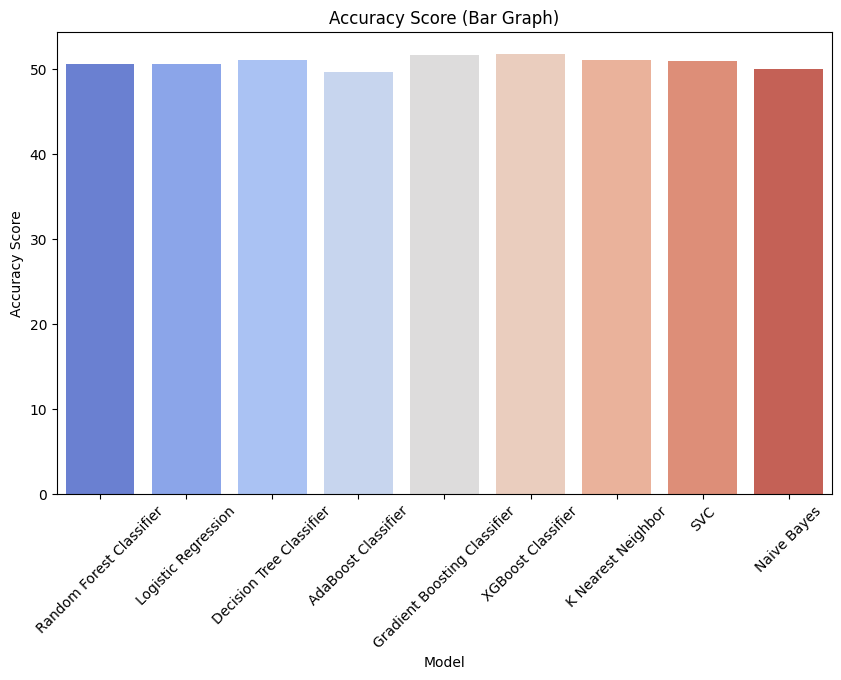

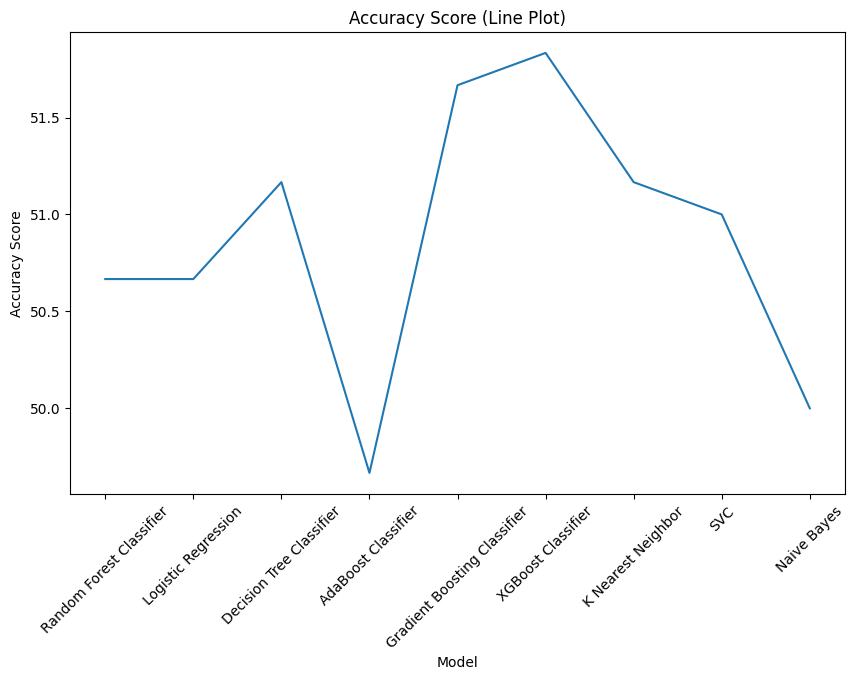

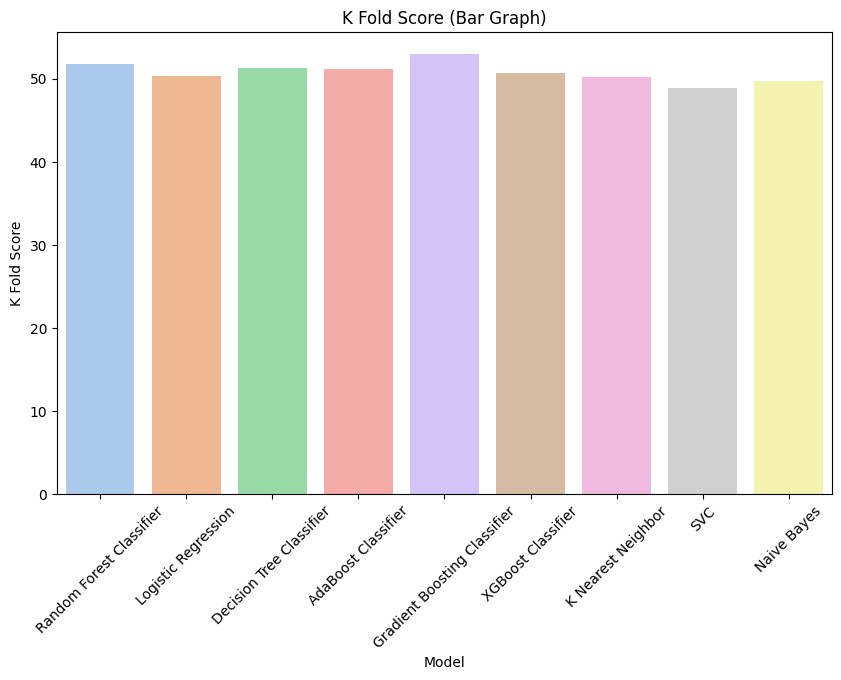

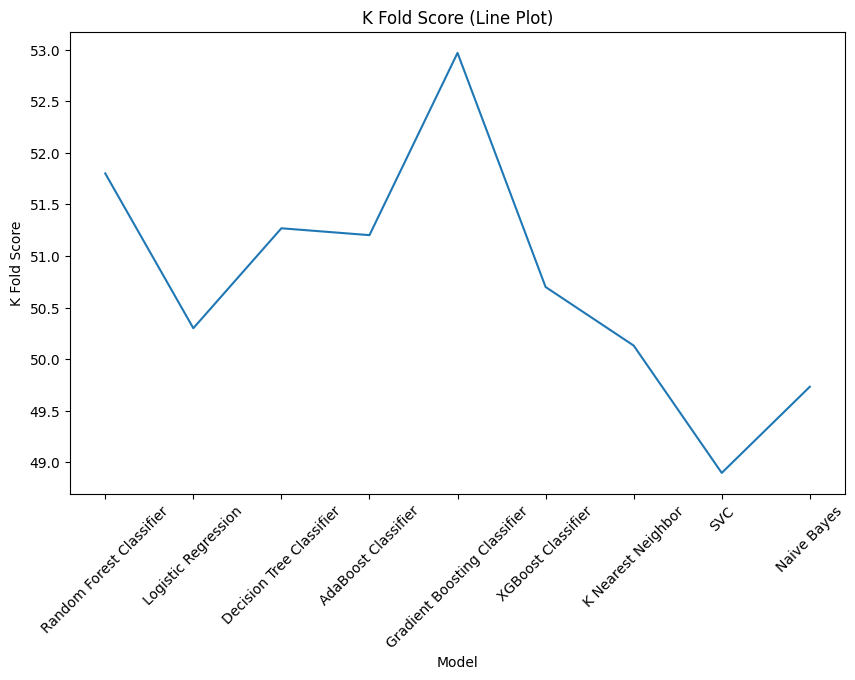

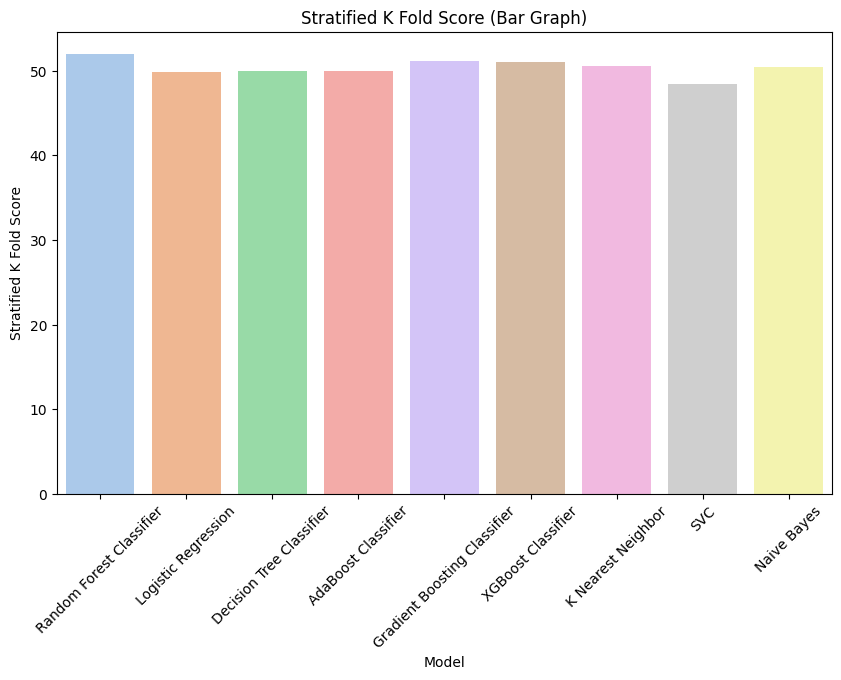

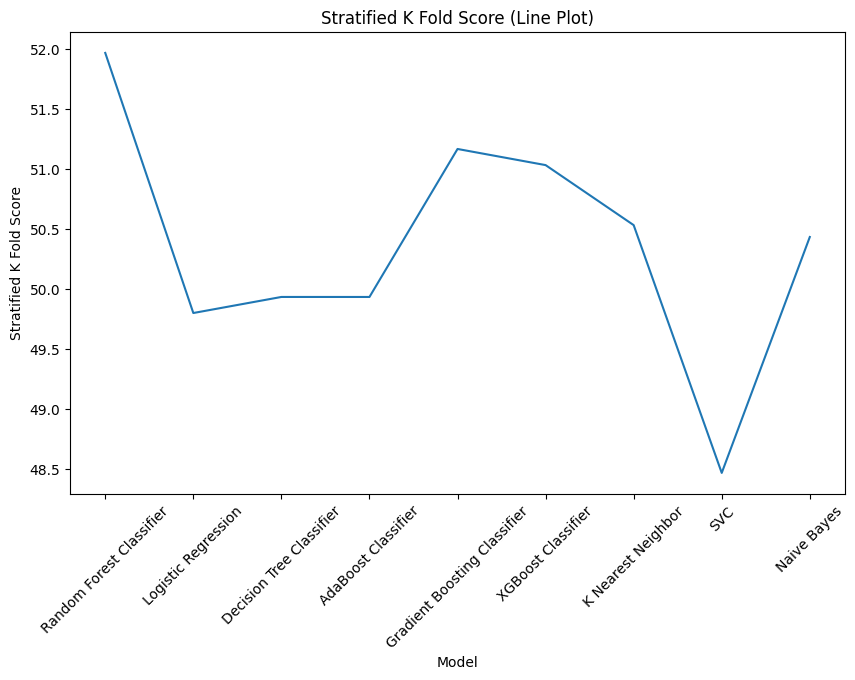

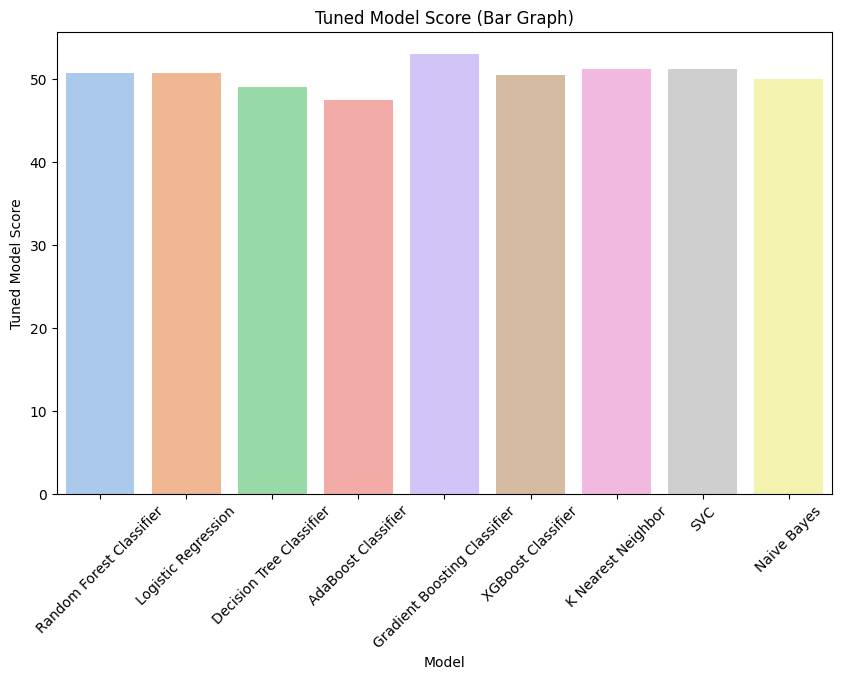

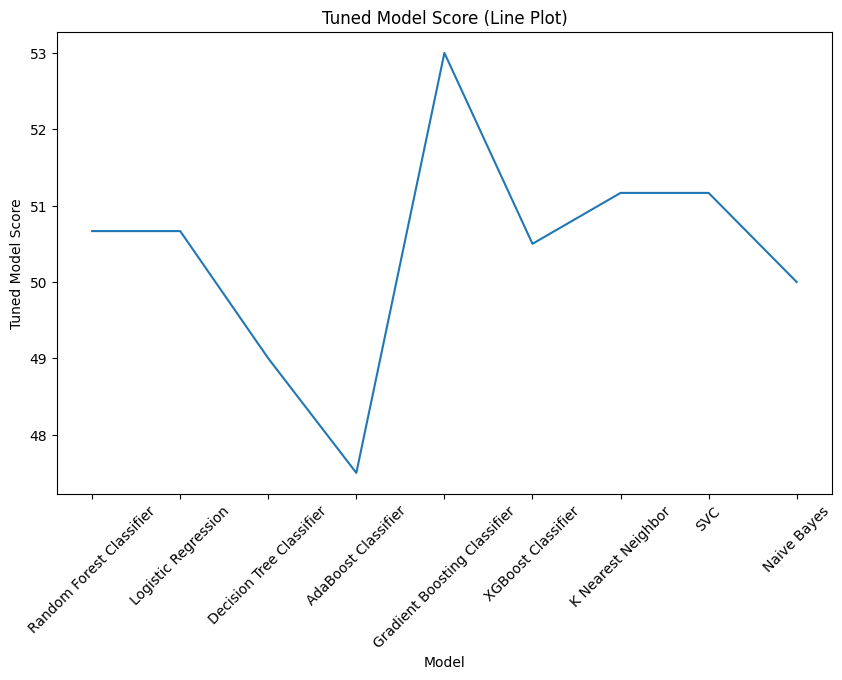

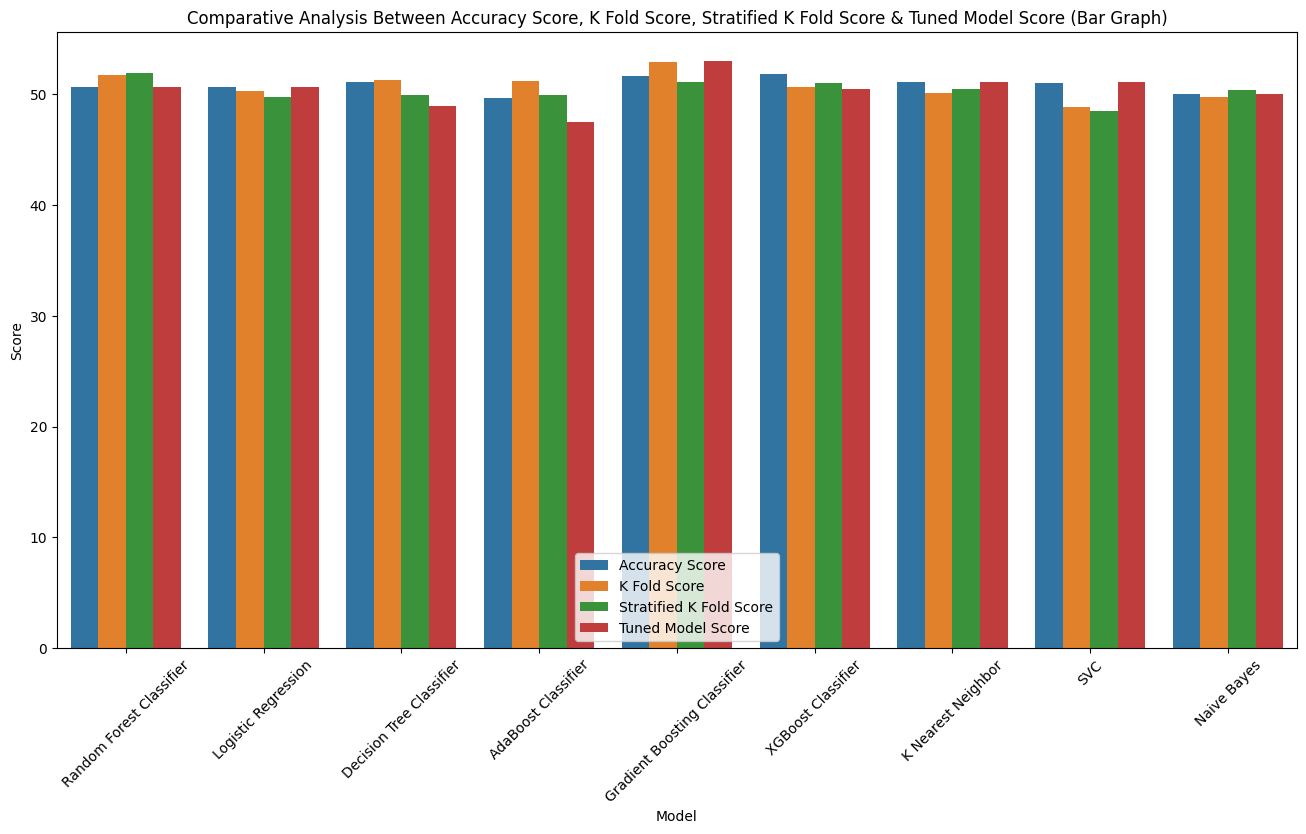

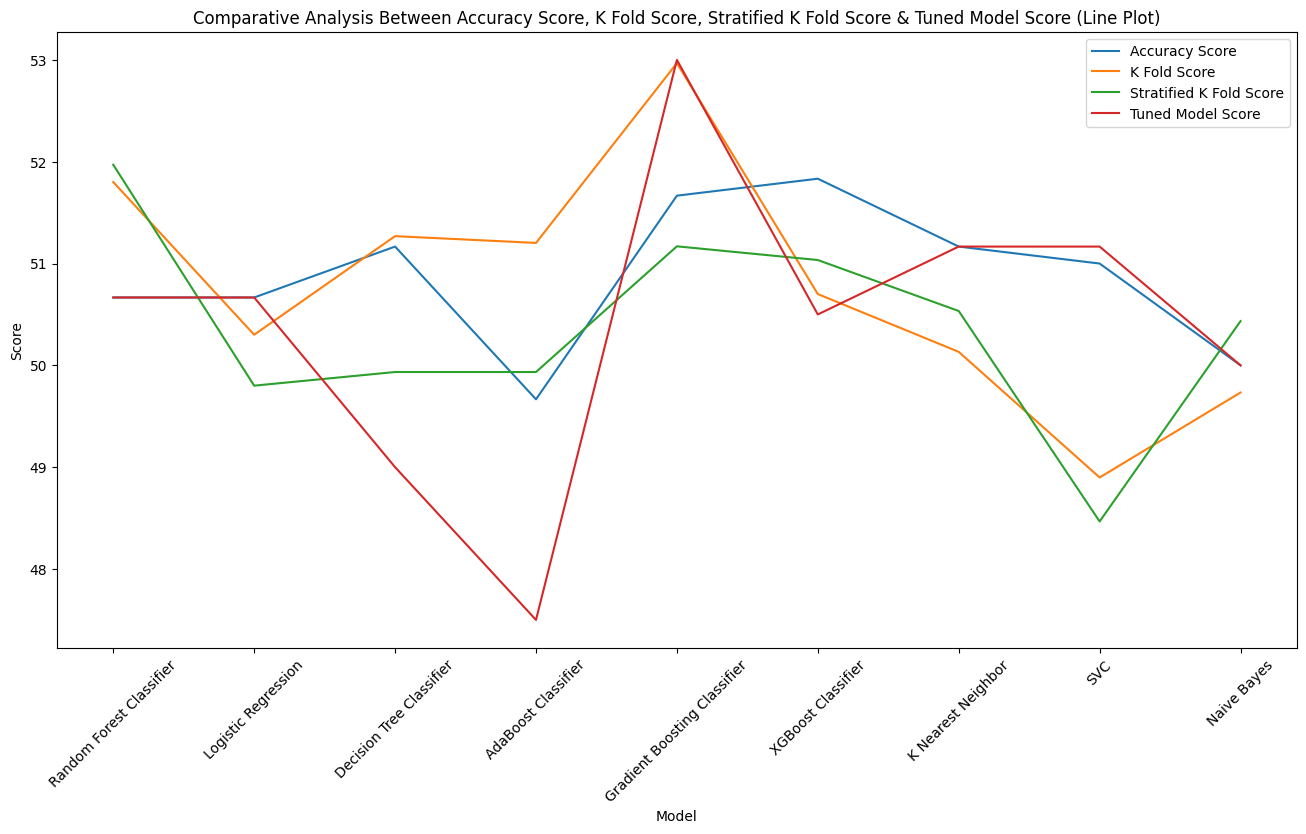

In [88]:
# Data Visualization 26

# Analysis of Accuracy Scores

# Assuming df_list as the DataFrame

plots = [
    {"x": "Model", "y": "Accuracy Score", "title": "Accuracy Score (Bar Graph)", "palette": "coolwarm", "plot_type": "bar"},
    {"x": "Model", "y": "Accuracy Score", "title": "Accuracy Score (Line Plot)", "palette": "coolwarm", "plot_type": "line"},
    {"x": "Model", "y": "K Fold Score", "title": "K Fold Score (Bar Graph)", "palette": "pastel", "plot_type": "bar"},
    {"x": "Model", "y": "K Fold Score", "title": "K Fold Score (Line Plot)", "palette": "pastel", "plot_type": "line"},
    {"x": "Model", "y": "Stratified K Fold Score", "title": "Stratified K Fold Score (Bar Graph)", "palette": "pastel", "plot_type": "bar"},
    {"x": "Model", "y": "Stratified K Fold Score", "title": "Stratified K Fold Score (Line Plot)", "palette": "coolwarm", "plot_type": "line"},
    {"x": "Model", "y": "Tuned Model Score", "title": "Tuned Model Score (Bar Graph)", "palette": "pastel", "plot_type": "bar"},
    {"x": "Model", "y": "Tuned Model Score", "title": "Tuned Model Score (Line Plot)", "palette": "pastel", "plot_type": "line"},
]

for plot in plots:
    plt.figure(figsize=(10, 6))
    if plot["plot_type"] == "bar":
        sns.barplot(x=plot["x"], y=plot["y"], data=df_list, palette=plot["palette"])
    else:
        sns.lineplot(x=plot["x"], y=plot["y"], data=df_list, palette=plot["palette"], markers="*")
    plt.title(plot["title"])
    plt.xticks(rotation=45)
    plt.show()

melted_plots = [
    {"x": "Model", "y": "Score", "data": pd.melt(df_list, id_vars=['Model'], value_vars=['Accuracy Score', 'K Fold Score', 'Stratified K Fold Score', 'Tuned Model Score'], var_name='Metric', value_name='Score'), "title": "Comparative Analysis Between Accuracy Score, K Fold Score, Stratified K Fold Score & Tuned Model Score (Bar Graph)", "hue": "Metric"},
    {"x": "Model", "y": "Score", "data": pd.melt(df_list, id_vars=['Model'], value_vars=['Accuracy Score', 'K Fold Score', 'Stratified K Fold Score', 'Tuned Model Score'], var_name='Metric', value_name='Score'), "title": "Comparative Analysis Between Accuracy Score, K Fold Score, Stratified K Fold Score & Tuned Model Score (Line Plot)", "hue": "Metric"},
]

for plot in melted_plots:
    plt.figure(figsize=(16,8))
    if plot["title"].endswith("(Bar Graph)"):
        sns.barplot(x=plot["x"], y=plot["y"], data=plot["data"], hue=plot["hue"])
    else:
        sns.lineplot(x=plot["x"], y=plot["y"], data=plot["data"], hue=plot["hue"], markers=".")
    plt.title(plot["title"])
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

Cell 92 - Insights:
1. The output displays a total of 10 graphs.
2. The first 8 graphs shows the graphical representation (Bar graph and Line chart, alternatively, showing the same data) of the accuracy scores of various ML models, on the basis of Without Cross-Validation, With K-Fold Cross-Validation, With Stratified K-Fold Cross-Validation and Hyperparameter Tuning, respectively.
3. The last 2 graphs, shows the cumulative graphical representation, both in the form of a Bar Chart and in the form of a Line Chart.
4. In case of Model Evaluation without cross-validation, XGBoost Classifier is the best performing model, while AdaBoost Classifier is the worst performing model.
5. In case of Model Evaluation with K-Fold cross-validation, Gradient Boosting Classifier is the best performing model, while SVC is the worst performer.
6. In case of Model Evaluation with Stratified K-Fold cross-validation, Gradient Boosting Classifier is the best performing model, while SVC is the worst performer.
7. In case of Hyperparameter Tuning, Gradient Boosting Classifier is the best performing model, while AdaBoost Classifier is the worst performer.

In [89]:
# Calculate the mean for each row
df_list["Mean Score"] = df_list[["Accuracy Score", "K Fold Score", "Stratified K Fold Score", "Tuned Model Score"]].mean(axis=1)

# Printing the modified DataFrame
df_list

Model  Accuracy Score  K Fold Score  \
1      Random Forest Classifier       50.666667     51.800446   
2           Logistic Regression       50.666667     50.300780   
3      Decision Tree Classifier       51.166667     51.269119   
4           AdaBoost Classifier       49.666667     51.202564   
5  Gradient Boosting Classifier       51.666667     52.968339   
6            XGBoost Classifier       51.833333     50.700334   
7            K Nearest Neighbor       51.166667     50.132776   
8                           SVC       51.000000     48.898774   
9                   Naive Bayes       50.000000     49.733445   

   Stratified K Fold Score  Tuned Model Score  Mean Score  
1                51.970457          50.666667   51.276059  
2                49.800669          50.666667   50.358696  
3                49.934671          49.000000   50.342614  
4                49.934560          47.500000   49.575948  
5                51.169119          53.000000   52.201031  
6                51.034560          50.500000   51.017057  
7                50.533891          51.166667   50.750000  
8                48.466890          51.166667   49.883082  
9                50.434783          50.000000   50.042057

Cell 93 - Insights:
1. The output is in the form of a DataFrame, which is similar to the output of cell 89 and 90, with an addition of a column of Mean Score.
2. The scores are presented in the form of Percentage.
3. From the column of the Mean Score, it can be deduced that Gradient Boosting Classifier is the best performer (52.2%), closely followed by Random Forest Classifier (51.27%) and XGBoost Classifier (51.01%). Other models like Logistic Regression, Decision Tree Classifier, K Nearest Neighbor and Gaussian Naive Bayes are underperforming models, as they have accuracy scores less than 51%. On the other hand, AdaBoost Classifier is the worst performing model with an accuracy mean score of 49.57%, followed by SVC with an accuaracy mean score of 49.88%.

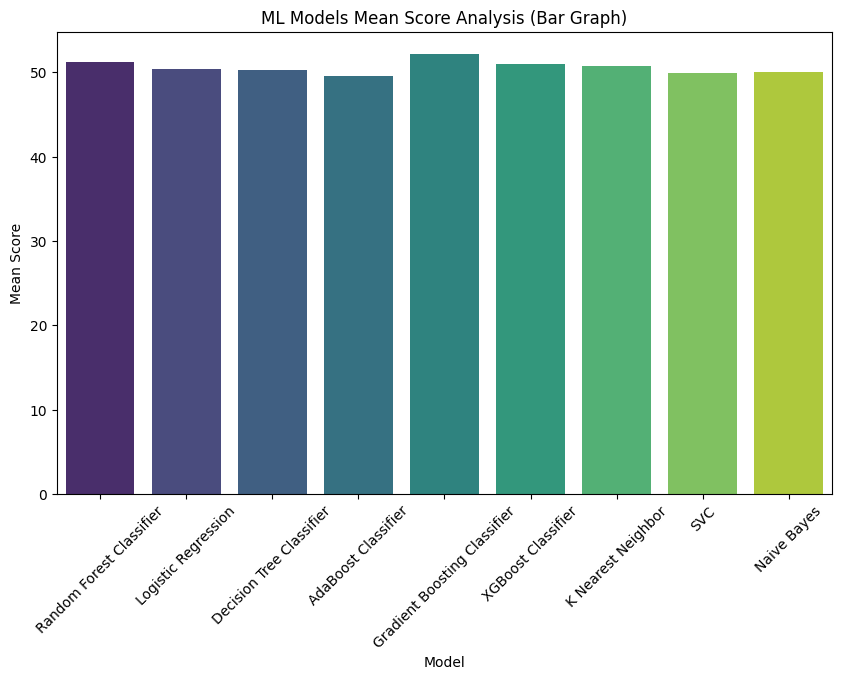

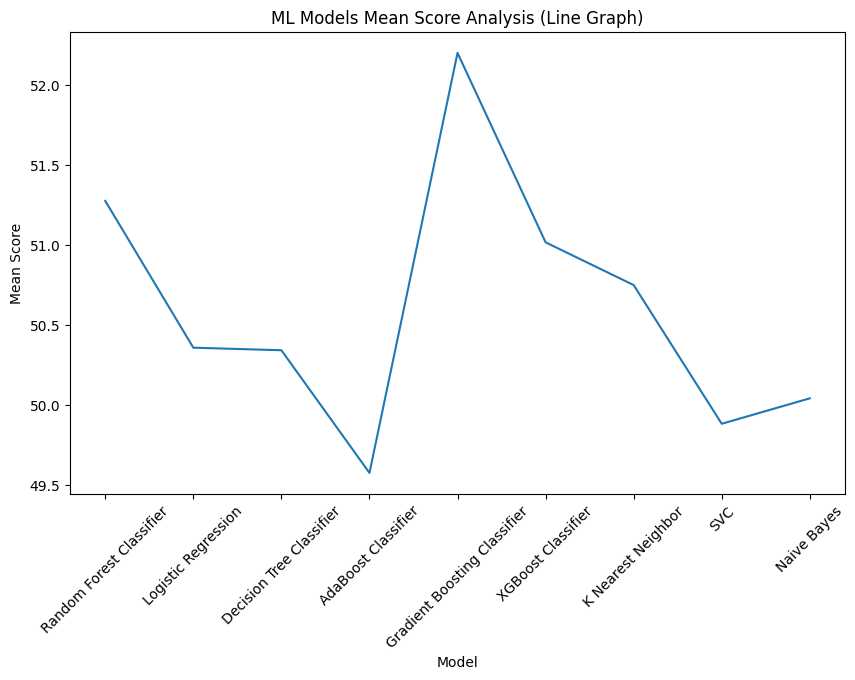

In [90]:
# Data Visualization 27

# Visual Analysis of Mean Scores of Different Machine Learning Models

plots = [
    {"x": "Model", "y": "Mean Score", "title": "ML Models Mean Score Analysis (Bar Graph)", "palette": "viridis", "plot_type": "bar"},
    {"x": "Model", "y": "Mean Score", "title": "ML Models Mean Score Analysis (Line Graph)", "palette": "pastel", "plot_type": "line"}
]

for plot in plots:
    plt.figure(figsize=(10, 6))
    if plot["plot_type"] == "bar":
        sns.barplot(x=plot["x"], y=plot["y"], data=df_list, palette=plot["palette"])
    else:
        sns.lineplot(x=plot["x"], y=plot["y"], data=df_list, palette=plot["palette"], markers="*")
    plt.title(plot["title"])
    plt.xticks(rotation=45)
    plt.show()

Cell 94 - Insights:
1. The output shows 2 Graphs showcasing the Mean Accuracy of various ML Models - 1 Bar Graph and 1 Line Chart.
2. The result interpretation remains the same, as that of the previous cell's output.

# Ensemble

In [76]:
# Ensemble
# Ensemble of Models without Cross Validation

# Creation of Empty Lists
accuracy_hard_voting = []
accuracy_soft_voting = []
estimator = []

# Define Individual Classifier & Append to the List of estimator

# For Random Forest Classifier
estimator.append(("RFC", RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=100)))

# For Logistic Regression
estimator.append(("LR", LogisticRegression(solver="lbfgs", multi_class ='multinomial',max_iter = 200, penalty="l2", C=0.1)))

# For Decision Tree Classifier
estimator.append(('DTC', DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5)))

# For AdaBoost Classifier
estimator.append(('ABC', AdaBoostClassifier(n_estimators=200, learning_rate=10)))

# For Gradient Boosting Classifier
estimator.append(('GBC', GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=10)))

# For XGBoost Classifier
estimator.append(('XGB', xgb.XGBClassifier(objective='binary:logistic', max_depth=3, n_estimators=50, learning_rate=0.01)))

# For K Nearest Neighbor
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=19, weights='uniform', metric="euclidean")))

# For Support Vector Classifier
estimator.append(('SVC', SVC(gamma ='auto', probability = True, C=1, kernel="sigmoid"))) 

# For Naive Bayes
estimator.append(('NB', GaussianNB()))

# Voting Classifier

# For Hard Voting
hard_voting = VotingClassifier(estimators = estimator, voting ="hard")
hard_voting.fit(X_train, y_train)
y_pred = hard_voting.predict(X_test)

# Printing the Output
hard_voting_score = accuracy_score(y_test, y_pred)
print(f"Hard Voting Score: {hard_voting_score}")

# For Soft Voting
soft_voting = VotingClassifier(estimators = estimator, voting ="soft")
soft_voting.fit(X_train, y_train)
y_pred = soft_voting.predict(X_test)

# Printing the Output
soft_voting_score = accuracy_score(y_test, y_pred)
print(f"Soft Voting Score: {soft_voting_score}")

Hard Voting Score: 0.5
Soft Voting Score: 0.52


Cell 95 - Insights:
1. The output implements an ensemble learning approach, using both hard and soft voting classifiers and shows the accuracy scores for both the voting classifiers.
2. Ensemble Approach:- The ensemble approach using hard and soft voting classifiers is not significantly improving the performance, which could indicate that the individual classifiers are not diverse enough or are not capturing different aspects of the data. 
3. Hard Voting Classifier:- The hard voting classifier predicts the class label based on the majority vote from the individual classifiers. In this case, the accuracy score is 0.5, which means the model is performing no better than a random classifier. This suggests that the individual classifiers are not performing well, or the majority vote is not effective in making accurate predictions.
4. Soft Voting Classifier:- The soft voting classifier predicts the class label based on the weighted average of the probabilities predicted by the individual classifiers. In this case, the accuracy score is 0.52, which is slightly better than the hard voting classifier. This suggests that the soft voting approach is able to capture some nuances in the predictions made by the individual classifiers, leading to a slightly improved performance.
5. Hyperparameter Tuning: The hyperparameters used for the individual classifiers may not be optimal, which could be affecting the performance of the ensemble model.

In [77]:
# Ensemble of Models with Cross Validation

# Create an Empty List
estimator=[]

# Define Individual Classifier & Append to the List of estimator

# For Random Forest Classifier
estimator.append(("RFC", RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=100)))

# For Logistic Regression
estimator.append(("LR", LogisticRegression(solver="lbfgs", multi_class ='multinomial',max_iter = 200, penalty="l2", C=0.1)))

# For Decision Tree Classifier
estimator.append(('DTC', DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5)))

# For AdaBoost Classifier
estimator.append(('ABC', AdaBoostClassifier(n_estimators=200, learning_rate=10)))

# For Gradient Boosting Classifier
estimator.append(('GBC', GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=10)))

# For XGBoost Classifier
estimator.append(('XGB', xgb.XGBClassifier(objective='binary:logistic', max_depth=3, n_estimators=50, learning_rate=0.01)))

# For K Nearest Neighbor
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=19, weights='uniform', metric="euclidean")))

# For Support Vector Classifier
estimator.append(('SVC', SVC(gamma ='auto', probability = True, C=1, kernel="sigmoid"))) 

# For Naive Bayes
estimator.append(('NB', GaussianNB()))

# Create a Voting Classifier

# For Hard Voting
hard_voting = VotingClassifier(estimators=estimator, voting='hard')

# Define Stratified K Fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross Val Scores for Stratified K Fold Validation
scores_hv = cross_val_score(hard_voting, X, y, cv=stratified_kfold, scoring="accuracy")
hard_voting_mean_score = scores_hv.mean()

# Print the Output
print("Hard Voting")
print(f"Mean Accuracy: {hard_voting_mean_score}\n")

# For Soft Voting
soft_voting = VotingClassifier(estimators=estimator, voting='soft')

# Define Stratified K Fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Stratified K Fold
scores_sv = cross_val_score(soft_voting, X, y, cv=stratified_kfold, scoring="accuracy")
soft_voting_mean_score = scores_sv.mean()

# Print the Output
print("Soft Voting")
print(f"Mean Accuracy: {soft_voting_mean_score}")

Hard Voting
Mean Accuracy: 0.5080033388981635

Soft Voting
Mean Accuracy: 0.5246900389538119


Cell 96 - Insights:
1. The output implements an ensemble learning approach, using both hard and soft voting classifiers and shows the accuracy scores for both the voting classifiers.
2. Ensemble Approach: The ensemble approach using hard and soft voting classifiers is able to improve the performance compared to individual classifiers, which suggests that the individual classifiers are diverse and capture different aspects of the data.
3. Hard Voting Classifier: The hard voting classifier predicts the class label based on the majority vote from the individual classifiers. In this case, the mean accuracy score is 0.508, which suggests that the model is performing slightly better than a random classifier.
4. Soft Voting Classifier: The soft voting classifier predicts the class label based on the weighted average of the probabilities predicted by the individual classifiers. In this case, the mean accuracy score is 0.525, which is slightly better than the hard voting classifier.
5. Soft Voting Advantage: The soft voting classifier performs slightly better than the hard voting classifier, which suggests that the weighted average of probabilities is able to capture more nuances in the data.
6. Model Performance: The mean accuracy scores are still relatively low, which suggests that the models may not be capturing the underlying patterns in the data effectively.

# Comparative Analysis of Ensemble Learning Approach with respect to Hard Voting Classifier and Soft Voting Classifier with Cross-Validation and without Cross-Validation

In [80]:
# Creation of Ensemble Scores DataFrame

# Creation of List for Criteria
criteria = ["Without CV", "With CV"]

# Creation of Lists of Hard Voting as well as Soft Voting Scores

# For Hard Voting
hv = [hard_voting_score, hard_voting_mean_score]

# For Soft Voting
sv = [soft_voting_score, soft_voting_mean_score]

# Create a Dictionary to Store the Data
df_dict = {"Criteria": criteria, "Hard Voting Score": hv, "Soft Voting Score": sv}

# Create a Pandas DataFrame
df_ensemble = pd.DataFrame(df_dict)

# Multiplying each Numeric Value with 100, in order to get the Percentage Scores
df_ensemble_numeric = df_ensemble.select_dtypes(include=[np.number])
df_ensemble[df_ensemble_numeric.columns] = df_ensemble_numeric.mul(100)

# Resetting Index
df_ensemble.set_index(pd.RangeIndex(start=1, stop=len(df_ensemble) + 1), inplace=True)

# Printing the Generated DataFrame
df_ensemble

Criteria  Hard Voting Score  Soft Voting Score
1  Without CV          50.000000          52.000000
2     With CV          50.800334          52.469004

Cell 97 - Insights:
1. The output is in the form of a DataFrame.
2. On the basis of Voting Classifier, Soft Voting Approach gives a higher score as compared to the Hard Voting Approach.

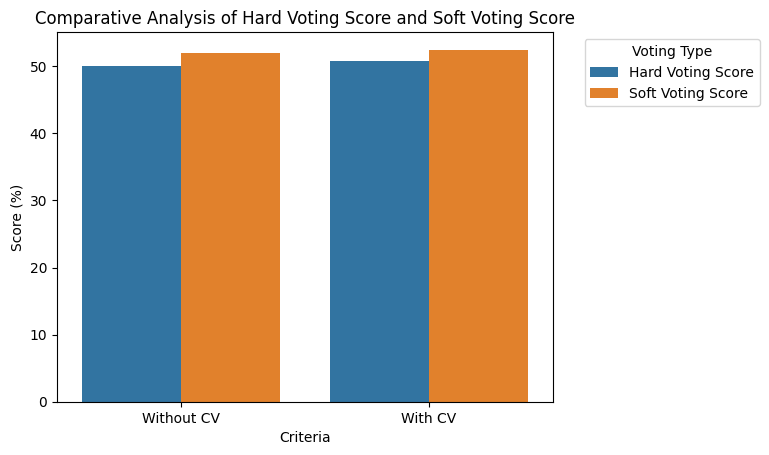

In [81]:
# Data Visualization 28

# Comparative Analysis of Ensemble Model Scores

# Melt the DataFrame to create a long-form DataFrame
df_ensemble_melted = pd.melt(df_ensemble, id_vars=['Criteria'], value_vars=['Hard Voting Score', 'Soft Voting Score'], var_name='Voting Type', value_name='Score (%)')

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the melted DataFrame
sns.barplot(x='Criteria', hue='Voting Type', data=df_ensemble_melted, y='Score (%)', ax=ax)

# Set title and labels
ax.set_title('Comparative Analysis of Hard Voting Score and Soft Voting Score')
ax.set_xlabel('Criteria')
ax.set_ylabel('Score (%)')

# Add legend
plt.legend(title='Voting Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Cell 98 - Insights:
1. The output shows a Bar Graph, comparing the Hard Voting Score as well as Soft Voting Score, in case of both With Cross-Validation and Without Cross-Validation.
2. Soft voting has a higher score in case of both With Cross-Validation and Without Cross-Validation, as compared to the Hard Voting.

# Final Model Training

In [116]:
# Final Model Training
final_model = GradientBoostingClassifier(learning_rate=1, max_depth=10, n_estimators=200)
final_model.fit(X_train_scaled, y_train)

print("\nFinal Model Performance:\n")
print("Gradient Boosting Classifier Model Performance Index:\n")

# Predict on the training dataset
y_pred_train = final_model.predict(X_train_scaled)
print("Training Model Performance:\n")
print(classification_report(y_train, y_pred_train))
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_pred_train))

# Predict on the test dataset
y_pred = final_model.predict(X_test)
print("Test Model Performance:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred))

Training Model Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398


Confusion Matrix (Training):
[[1180    2]
 [   0 1216]]

Final Model Performance:

Gradient Boosting Classifier Model Performance Index:

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       299
           1       0.50      0.59      0.54       301

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.49       600
weighted avg       0.50      0.50      0.49       600


Confusion Matrix (Test):
[[120 179]
 [123 178]]


Cell 99 - Insights:
1. The output shows the Final Model Training for training a Gradient Boosting Classifier model on a dataset and evaluating its performance on both the training and test datasets.
2. Training Performance:- The model has achieved perfect accuracy on the training dataset, with a precision, recall, and F1-score of 1.00 for both classes and the confusion matrix shows that only 2 samples from class 0 and 0 samples from class 1 are misclassified.
3. Test Performance:- The model's performance on the test dataset is not as good as on the training dataset. The accuracy is 0.50, which means the model is only correct half of the time. The precision, recall, and F1-score for class 0 are 0.49, 0.40, and 0.44, respectively, indicating that the model is not very good at predicting class 0. The precision, recall, and F1-score for class 1 are 0.50, 0.59, and 0.54, respectively, indicating that the model is slightly better at predicting class 1. The confusion matrix shows that the model is misclassifying a significant number of samples from both classes.
4. Conclusion:- The model is likely overfitting to the training data, as it has perfect accuracy on the training dataset but performs poorly on the test dataset. The model may not be generalizing well to new, unseen data. The class distribution in the test dataset may be different from the training dataset, which could be contributing to the poor performance. The model's hyperparameters may need to be tuned to improve its performance on the test dataset.

In [145]:
# Ensemble Model Training

# Define the models with specified parameters
models = {
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=1, max_depth=10, n_estimators=200),
    'XGBoost': xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50),
    'Random Forest': RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100),
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2'),
    'K Nearest Neighbor': KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='uniform')
}

# Create a VotingClassifier with soft voting
ensemble = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')

# Train the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

# Evaluate the model on training data
print("Training Data:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_train_pred))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error:", mean_squared_error(y_train, y_train_pred, squared=False))

# Evaluate the model on testing data
print("\nTesting Data:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_test_pred, squared=False))

Training Data:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398

R2 Score: 0.9966632157805682
ROC AUC Score: 0.9991539763113367
Mean Absolute Error: 0.0008340283569641367
Mean Squared Error: 0.0008340283569641367
Root Mean Squared Error: 0.02887954911289539

Testing Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       299
           1       0.50      0.49      0.49       301

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

R2 Score: -1.013355703952266
ROC AUC Score: 0.4967055189502106
Mean Absolute 

Cell 100 - Insights:
1. The output highlights a significant difference in performance between the training and testing phases of your ensemble model.
2. Training Data Metrics:- The classification report shows perfect precision, recall, and F1-scores for both classes (0 and 1), with an accuracy of 1.00. This indicates that the model is performing exceptionally well on the training data. The R2 score of approximately 0.997 is very high, suggesting that the model explains almost all the variance in the training data. The ROC AUC score of approximately 0.999 indicates an excellent ability of the model to distinguish between the classes on the training data. The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are very low, showing minimal prediction error on the training data.
3. Testing Data Metrics:- The classification report for the testing data shows a precision, recall, and F1-score of around 0.50 for both classes, with an accuracy of 0.50. This indicates that the model is not performing better than random guessing on the testing data. The R2 score of approximately -1.01 is negative, indicating that the model performs worse than a simple mean-based model. This suggests poor performance and overfitting. The ROC AUC score of approximately 0.497 is close to 0.5, which is the score for random guessing. This indicates that the model's ability to distinguish between classes on the testing data is very poor. The MAE, MSE, and RMSE are significantly higher on the testing data, reflecting larger prediction errors compared to the training data.
4. Conclusion:- The model shows excellent performance on the training data but fails to generalize to the testing data, indicating overfitting. 

# Feature Importance

In [166]:
# Feature Importance of Final Model (Gradient Boosting Classifier)

columns = X.columns
reshaped_columns = np.array(X.columns).reshape(-1, 1)

feature_importance = final_model.feature_importances_
feature_importance

array([0.04814818, 0.33519915, 0.04325216, 0.04663612, 0.04415207,
       0.05961358, 0.04971708, 0.04522164, 0.05579704, 0.04446945,
       0.04733963, 0.03730185, 0.04807894, 0.05088929, 0.04418381])

Cell 101 - Insights:
1. The output of the code represents the feature importance of the Final Trained Model, which is a Gradient Boosting Classifier Model.
2. The output is in the form of an array, which gives feature importance score for each column of the dataset.
3. These values are normalized, meaning they sum up to 1.0 across all features.
4. Features with higher importance contribute more to the model’s predictions.
5. This result can be interpreted to select the most important features.

In [167]:
# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importance})

# Sort the DataFrame in decreasing order of feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Resetting Index
feature_importance_df.set_index(pd.RangeIndex(start=1, stop=len(feature_importance_df) + 1), inplace=True)

# Printing the Generated DataFrame
feature_importance_df

Feature  Importance
1                     AGE    0.335199
2           PEER_PRESSURE    0.059614
3                 ALLERGY    0.055797
4   SWALLOWING_DIFFICULTY    0.050889
5         CHRONIC_DISEASE    0.049717
6                  GENDER    0.048148
7     SHORTNESS_OF_BREATH    0.048079
8       ALCOHOL_CONSUMING    0.047340
9          YELLOW_FINGERS    0.046636
10                FATIGUE    0.045222
11               WHEEZING    0.044469
12             CHEST_PAIN    0.044184
13                ANXIETY    0.044152
14                SMOKING    0.043252
15               COUGHING    0.037302

Cell 102 - Insights:
1. The output is the Feature Importance Score with their corresponding Features, in the form of a DataFrame.
2. The most important feature is "AGE" with a normalized score of 0.335 and the least important feature is "COUGHING" with a normalized score of 0.037.
3. The scores of each feature indicates that neither of the feature dominates the outcome, rather more than one feature influences the outcome, thereby making the dataset complex.
4. Here, in this DataFrame, the scores of feature importance has been arranged in a descending order.

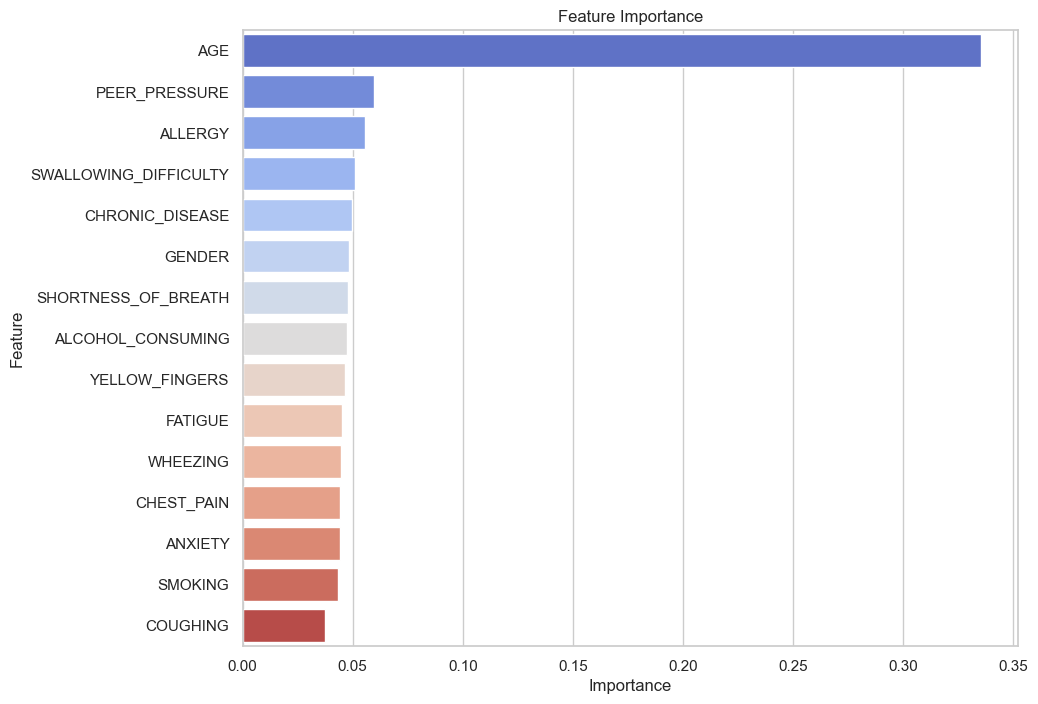

In [168]:
# Data Visualization 29
# Horizontal Bar Graph

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm")

# Add title and labels
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Show the plot
plt.show()

Cell 103 - Insights:
1. The output is a graphical representation of the feature importance scores for the Final Gradient Boosting Classifier Model.
2. The graph is a Horizontal Bar Plot.
3. The features have been sorted in a Descending order.
4. It can be inferred that "AGE" is the most important feature and "COUGHING" is the least important feature.

In [181]:
# Feature Importance of the Ensemble Model

# The following models have been used for Ensemble Model
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbor': KNeighborsClassifier()
}

# Get feature importances from each model
feature_importances = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    if name in ['Gradient Boosting', 'XGBoost', 'Random Forest']:
        importance = model.feature_importances_
        feature_importances[name] = importance
        print(f"Feature Importance for {name}:")
        print(importance)
        print()
    else:
        print(f"{name} does not support feature importance.")
        print()

# Calculate combined feature importance
combined_importance = {}
features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

for i, feature in enumerate(features):
    feature_importance = 0
    for name, importance in feature_importances.items():
        if i < len(importance):  # Check if i is within bounds
            feature_importance += importance[i]
    combined_importance[feature] = feature_importance / 3  # Divide by 3 to get average importance

print("Combined Feature Importance:")
print(combined_importance)

Feature Importance for Gradient Boosting:
[0.05387855 0.31115557 0.02066569 0.04121021 0.0312531  0.03105502
 0.04759568 0.02953005 0.02439046 0.04014933 0.05092346 0.10795408
 0.0511492  0.08574715 0.07334244]

Feature Importance for XGBoost:
[0.06710485 0.06334142 0.07219806 0.06135486 0.07609962 0.07231045
 0.06563651 0.06244092 0.0656415  0.06729341 0.06134312 0.06693424
 0.0602819  0.06839653 0.06962263]

Feature Importance for Random Forest:
[0.05062647 0.29950565 0.05124751 0.0514354  0.048492   0.0490268
 0.05214842 0.05057792 0.0524794  0.04782177 0.04590921 0.04661749
 0.04927421 0.05239627 0.05244149]

Logistic Regression does not support feature importance.

K Nearest Neighbor does not support feature importance.

Combined Feature Importance:
{'GENDER': 0.057203288863117784, 'AGE': 0.22466754401745773, 'SMOKING': 0.04803708557572661, 'YELLOW_FINGERS': 0.051333491384950025, 'ANXIETY': 0.05194824143558657, 'PEER_PRESSURE': 0.0507974218748809, 'CHRONIC_DISEASE': 0.055126867887

Cell 103 - Insights:
1. The output shows the scores of feature importance, individually for Gradient Boosting Classifier, XGBoost Classifier and the Random Forest Classifier.
2. The scores of feature importance for each feature, in each model, shows that no single feature dominates the outcome, rather all the features contribute in a nominal manner to influence the outcome.
3. Also, a Combined Feature Importance has been displayed in the form of a Dictionary and in that case too, the feature importance scores are too low to dominate single-handedly, rather a combination of more than one feature is needed.

In [182]:
# Store in a Pandas DataFrame for visualization
important_features_df = pd.DataFrame(list(combined_importance.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance in descending order
important_features_df.sort_values(by='Importance', ascending=False, inplace=True)

# Resetting Index
important_features_df.set_index(pd.RangeIndex(start=1, stop=len(important_features_df) + 1), inplace=True)

# Printing the Generated DataFrame
important_features_df

Feature  Importance
1                     AGE    0.224668
2                COUGHING    0.073835
3   SWALLOWING_DIFFICULTY    0.068847
4              CHEST_PAIN    0.065136
5                  GENDER    0.057203
6         CHRONIC_DISEASE    0.055127
7     SHORTNESS_OF_BREATH    0.053568
8       ALCOHOL_CONSUMING    0.052725
9                 ANXIETY    0.051948
10               WHEEZING    0.051755
11         YELLOW_FINGERS    0.051333
12          PEER_PRESSURE    0.050797
13                SMOKING    0.048037
14                FATIGUE    0.047516
15                ALLERGY    0.047504
16            LUNG_CANCER    0.000000

Cell 104 - Insights:
1. The output shows the Feature Importance Scores in the form of a DataFrame.
2. The scores of Combined Feature Importance has been displayed.
3. The features have been arranged in a descending order.
4. The most important feature is "AGE" with a feature importance score of 0.224, while the least important feature is that of "ALLERGY" with a feature importance score of 0.047.

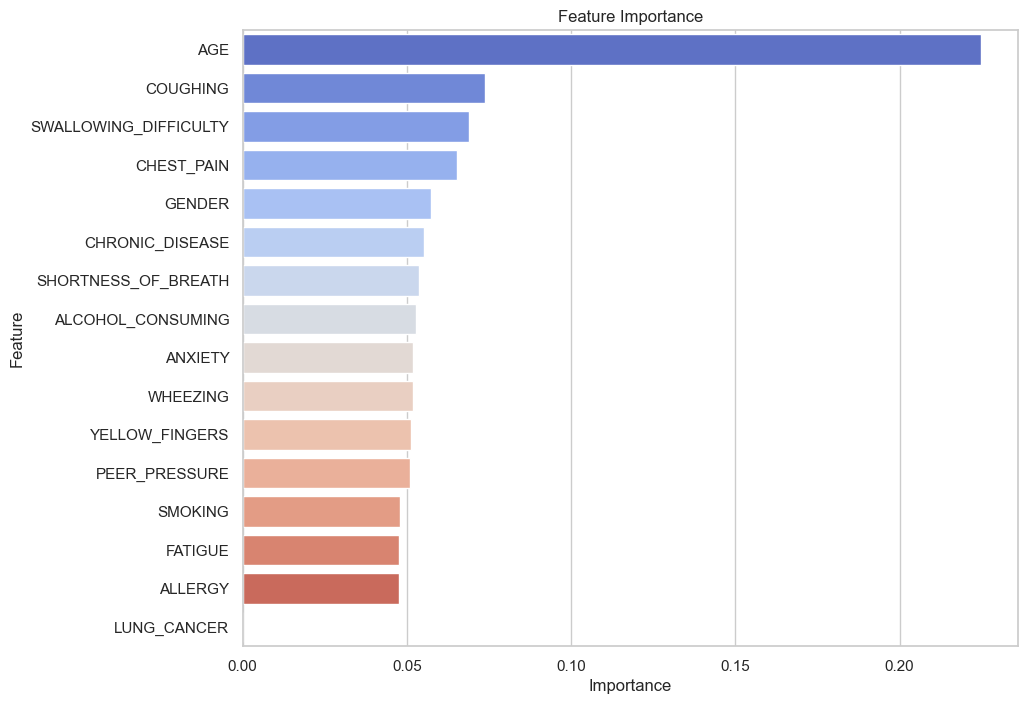

In [184]:
# Data Visualization 30
# Horizontal Bar Graph

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.barplot(x="Importance", y="Feature", data=important_features_df, palette="coolwarm")

# Add title and labels
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Show the plot
plt.show()

Cell 105 - Insights:
1. The output shows a graphical representation for the Combined Feature Importance for Ensemble Model Training.
2. The Features have been arranged in a descending order.
3. The most important feature is "AGE", same as that of the Gradient Boosting Classifier Model, while the least important feature is "ALLERGY", which is different from that of Gradient Boosting Classifier, where the least important feature is "COUGHING", interestingly, which is the 2nd most important feature, in case of Ensemble Model Training.
4. This shows that there exists a sort of ambiguity in the data.
5. The Feature Importance Scores of each Feature, in case of both Gradient Boosting Classifier Model as well as Ensemble Model, that no feature dominates the outcome single-handedly, rather a combination of more than one feature is required to influence the outcome, thereby increasing the complexity of the dataset.

# The End